<h1> Music genre prediction [M1_27DS+] </h1>  
<style>
h1 {
  border: dashed white;
  padding: 10px 12px;
  background-color: indigo;
  position: static;
}
</style>

## Table of contents
* [1. Описание проекта. Подготовка к работе.](#chapter1)
    * [1.1 Загрузка данных и библиотек](#section1_1)
    * [1.2 Настройка окружения](#section1_2)
    * [1.3 Инициализация и описание функций](#section1_3)
* [2. Предобработка данных](#chapter2)
    * [2.1 Дубликаты и пропуски](#section_2_1)
* [3. Исследовательский анализ данных](#chapter3)
    * [3.1 Столбец acousticness](#section3_1)
    * [3.2 Столбец duration_ms](#section3_2)
    * [3.3 Столбец energy](#section3_3)
    * [3.4 Столбец instrumentalness](#section3_4)
    * [3.5 Столбец liveness](#section3_5)
    * [3.6 Столбец loudness](#section3_6)
    * [3.7 Столбец speechiness](#section3_7)
    * [3.8 Столбец tempo](#section3_8)
    * [3.9 Столбец valence](#section3_9)
    * [3.10 Столбец popularity](#section3_10)
* [4. Построение моделей ](#chapter4)
* [5. Общий вывод](#chapter5)

## 1. Описание проекта. Подготовка к работе. <a class="anchor" id="chapter1"></a>
Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса "МиФаСоль". \
Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. \
Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. 
### Задача:
Разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

### План работы:
1. Загрузка данных, настройка среды и функций;
2. Предобработка;
3. Исследовательский анализ данных;
4. Разработка новых синтетических признаков;
5. Проверка на мультиколлинеарность;
6. Отбор финального набора обучающих признаков;
7. Выбор и обучение моделей;
8. Итоговая оценка качества предсказания лучшей модели;
9. Анализ важности ее признаков.

### Данные
* **train.csv** - информация (40000) музыкальных треках, которые будут использоваться в качестве обучающих данных.
* **test.csv** - информация (10000) музыкальных треках, которые будут использоваться в качестве тестовых данных. Ваша задача - предсказать значение 'music_genre' для каждого трека из этого датасета.
* **sample_submit.csv** - файл предсказаний в правильном формате.


#### Описание полей данных
* `instance_id` -Уникальный идентификатор трека
* `track_name` - Название трека
* `popularity` - Популярность трека
* `acousticness` - Мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 1,0 означает высокую степень уверенности в том, что трек является акустическим.
* `danceability` - Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность.
* `duration_ms` - Продолжительность трека в миллисекундах.
* `energy` - Энергия это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра
* `instrumentalness` - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала
* `key` - базовый ключ (нота) произведения
* `liveness` - Определяет присутствие аудитории в записи. Более высокие значения liveness означают увеличение вероятности того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек исполняется вживую
* `loudness` - Общая громкость трека в децибелах (дБ)
* `mode` - Указывает на модальность (мажорную или минорную) трека
* speechiness - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. Значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.
* `tempo` - Темп трека в ударах в минуту (BPM). В музыкальной терминологии темп представляет собой скорость или темп данного произведения и напрямую зависит от средней продолжительности тактов
* `obtained_date` - дата загрузки в сервис
* `valence` - Показатель от 0,0 до 1,0, характеризующий музыкальный позитив, передаваемый треком. Композиции с высокой валентностью звучат более позитивно (например, радостно, весело, эйфорично), а композиции с низкой валентностью - более негативно (например, грустно, депрессивно, сердито)
* `music_genre` - Музыкальный жанр трека. Целевой признак. Для каждого трека предскажите категориальное значение соответствующее музыкальному жанру трека.

### Загрузка библиотек <a class="anchor" id="section1_1"></a>

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from catboost import CatBoostClassifier

from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import shap

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import scipy.stats as stats
import scipy
import scipy.stats.stats
from scipy.stats import poisson
import scipy.stats
import phik

### Настройка окружения 

In [3]:
pd.set_option('display.min_rows', 20)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format

### Инициализация функций

In [4]:
# функция информации по таблице
def dataframe_summary(df, string):
    # Вывод общей информации
    print("Общая информация по таблице:", string)
    df.info()

    # Вывод статистического описания
    print("\n Статистическое описание:")
    display(df.describe().transpose())

    # Вывод случайных примеров
    print("\nСлучайные примеры:")
    display(df.sample(5))

    # Вывод количества строк и столбцов
    print("\nКоличество строк и столбцов:", df.shape)
    
    # Вывод количества явных дубликатов
    print("\nКоличество явных дубликатов:", df.duplicated().sum())
    print('')

In [5]:
# функция поиска пропусков
def analyze_missing_values(dataframes, names):
    for i, df in enumerate(dataframes):
        # Подсчет количества и процента пропущенных значений
        total = df.isnull().sum().sort_values(ascending=False)
        percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        missing_data = missing_data.query('Total > 0')

        # Вывод информации о пропусках
        print(f"Пропуски в датафрейме {names[i]}:\n{missing_data}\n")

        # Создание и отображение тепловой карты
        plt.figure(figsize=(12, 8))
        sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
        plt.title(f"Heatmap пропусков для {names[i]}")
        plt.show()

In [6]:
# функция описательной статистики числового признака
def descriptive_stats_and_plot(df, numeric_column):
    if numeric_column not in df.columns:
        print(f"Столбец '{numeric_column}' не найден в DataFrame.")
        return

    # Описательная статистика
    descriptive_stats = df.groupby('music_genre')[numeric_column].describe()
    display(f"Описательная статистика для {numeric_column}:", descriptive_stats)

    # Визуализация распределения
    plt.figure(figsize=(12, 15))
    sns.violinplot(x=numeric_column, y='music_genre',hue="music_genre" ,data=df, split=True, inner='quart')

    # Расчет общей медианы и среднего
    overall_median = df[numeric_column].median()
    overall_mean = df[numeric_column].mean()

    # Добавление линий медианы и среднего
    plt.axvline(overall_median, color='blue', linestyle='--', alpha=0.7, linewidth=2.5, label=f'Медиана: {overall_median:.2f}')
    plt.axvline(overall_mean, color='red', linestyle='--', alpha=0.7, linewidth=2.5, label=f'Среднее: {overall_mean:.2f}')

    plt.title(f'Распределение {numeric_column} по жанрам музыки')
    plt.legend()
    
    plt.figure(figsize=(12, 15))
    sns.boxplot(x=numeric_column, y='music_genre',hue="music_genre", data=df)

    # Расчет общей медианы и среднего
    overall_median = df[numeric_column].median()
    overall_mean = df[numeric_column].mean()

    # Добавление линий медианы и среднего
    plt.axvline(overall_median, color='blue', linestyle='--', alpha=0.7, linewidth=2.5, label=f'Медиана: {overall_median:.2f}')
    plt.axvline(overall_mean, color='red', linestyle='--', alpha=0.7, linewidth=2.5, label=f'Среднее: {overall_mean:.2f}')

    plt.title(f'Распределение {numeric_column} по жанрам музыки')
    plt.legend()
    plt.show()

In [7]:
#descriptive_stats_and_plot(train, 'popularity')

In [8]:
def fill_na_with_genre_median(df, numeric_column):
    # Вычисление медианы для каждого жанра
    median_per_genre = df.groupby('music_genre')[numeric_column].median()

    # Функция для заполнения пропусков
    def fill_na(row):
        if pd.isna(row[numeric_column]):
            return median_per_genre[row['music_genre']]
        else:
            return row[numeric_column]

    # Применение функции к каждой строке
    df[numeric_column] = df.apply(fill_na, axis=1)

In [9]:
def fill_na_with_quantile(df, numeric_column):
    # Вычисление 25-го и 75-го квартилей для указанной числовой переменной по каждому жанру
    quantile_table = df.groupby('music_genre')[numeric_column].quantile([0.25, 0.75]).unstack()

    # Переименование колонок
    quantile_table.columns = ['percentile_25', 'percentile_75']

    # Сброс индекса, чтобы 'music_genre' стал колонкой
    quantile_table.reset_index(inplace=True)

    # Объединение с исходным DataFrame
    merged = df.merge(quantile_table, on='music_genre', how='left')

    # Функция для заполнения пропусков
    def fill_na(row):
        if pd.isna(row[numeric_column]):
            return np.random.uniform(row['percentile_25'], row['percentile_75'])
        else:
            return row[numeric_column]

    # Применение функции к каждой строке
    df[numeric_column] = merged.apply(fill_na, axis=1)

In [10]:
# Функция для заполнения пропущенных значений key
def fill_missing_keys(row):
    if pd.isna(row['key']):
        return np.random.choice(top_keys_per_genre[row['music_genre']])
    else:
        return row['key']

In [11]:
def replace_question_marks_with_random(df, column):
    # Преобразование столбца в числовой тип, замена '?' на NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')

    # Вычисление Q1 и Q3 квартилей для указанной переменной по каждому жанру
    quantile_table = df.groupby('music_genre')[column].quantile([0.25, 0.75]).unstack()
    quantile_table.columns = ['Q1', 'Q3']

    # Функция для замены NaN на случайное значение между Q1 и Q3
    def replace_with_random(row):
        if pd.isna(row[column]):
            lower_bound = quantile_table.loc[row['music_genre'], 'Q1']
            upper_bound = quantile_table.loc[row['music_genre'], 'Q3']
            return np.random.uniform(lower_bound, upper_bound)
        else:
            return row[column]

    # Применение функции к каждой строке
    df[column] = df.apply(replace_with_random, axis=1)
    return df

In [12]:
def fill_na_most_frequent_per_genre(df, column, target_column='music_genre'):
    # Вычисление самого частого значения для каждого жанра
    mode_per_genre = df.groupby(target_column)[column].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

    # Функция для заполнения пропусков
    def fill_na(row):
        if pd.isna(row[column]):
            return mode_per_genre[row[target_column]]
        else:
            return row[column]

    # Применение функции к каждой строке
    df[column] = df.apply(fill_na, axis=1)

In [13]:
def categorical_analysis(df, category_column, target_column='music_genre'):
    # Статистическая информация
    stats = df.groupby(target_column)[category_column].value_counts(normalize=True).unstack().fillna(0)
    
    # Графическая информация
    plt.figure(figsize=(12, 6))
    sns.countplot(x=category_column, hue=target_column, data=df)
    plt.title(f'Distribution of {category_column} within {target_column}')
    plt.xticks(rotation=45)
    plt.show()
    
    return stats

### Загрузка данных 

In [14]:
file_names = {
    'train': 'train.csv',
    'test': 'test.csv',
    'train_ad': 'train.csv'
}

# Загрузка каждого файла в соответствующую переменную
for variable, file_name in file_names.items():
    globals()[variable] = pd.read_csv(file_name)

file_names = list(file_names.keys())

In [15]:
train = train
test = test
train_ad = train_ad
dataframes = [train , test]
# Размер до удаления данных в train
initial_size = train.shape[0]

In [16]:
for item in range(len(file_names)):
    print(f'Размер таблицы {file_names[item], globals()[file_names[item]].shape}')
    print(f'Пропусков {globals()[file_names[item]].isnull().any(axis=1).sum()}')

Размер таблицы ('train', (40000, 17))
Пропусков 20609
Размер таблицы ('test', (10000, 16))
Пропусков 5122
Размер таблицы ('train_ad', (40000, 17))
Пропусков 20609


In [17]:
dataframe_summary(train, 'train')
dataframe_summary(test, 'test')

Общая информация по таблице: train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       40000 non-null  int64  
 1   track_name        29262 non-null  object 
 2   popularity        36078 non-null  float64
 3   acousticness      40000 non-null  float64
 4   danceability      37963 non-null  float64
 5   duration_ms       40000 non-null  float64
 6   energy            40000 non-null  float64
 7   instrumentalness  40000 non-null  float64
 8   key               38577 non-null  object 
 9   liveness          40000 non-null  float64
 10  loudness          40000 non-null  float64
 11  mode              38147 non-null  object 
 12  speechiness       40000 non-null  float64
 13  tempo             40000 non-null  object 
 14  obtained_date     33781 non-null  object 
 15  valence           40000 non-null  float64
 16  music

count       mean        std      min        25%  \
instance_id      40,000.00  25,959.01  14,443.71 1,000.00  13,414.75   
popularity       36,078.00      44.18      15.55     0.00      34.00   
acousticness     40,000.00       0.31       0.34     0.00       0.02   
danceability     37,963.00       0.56       0.18     0.06       0.44   
duration_ms      40,000.00 221,322.07 129,736.74    -1.00 174,849.75   
energy           40,000.00       0.60       0.27     0.00       0.43   
instrumentalness 40,000.00       0.18       0.33     0.00       0.00   
liveness         40,000.00       0.19       0.16     0.01       0.10   
loudness         40,000.00     -11.68      14.43  -110.95     -11.62   
speechiness      40,000.00       0.13       0.21     0.02       0.04   
valence          40,000.00       0.46       0.25     0.00       0.26   

                        50%        75%          max  
instance_id       25,949.50  38,496.25    50,999.00  
popularity            45.00      56.00        99.00  
acousticness           0.14       0.55         1.00  
danceability           0.57       0.69         0.98  
duration_ms      219,320.00 268,667.00 4,830,606.00  
energy                 0.64       0.81         1.00  
instrumentalness       0.00       0.16         0.99  
liveness               0.13       0.24         1.00  
loudness              -7.48      -5.26         3.74  
speechiness            0.05       0.11         1.82  
valence                0.45       0.65         0.99


Случайные примеры:


instance_id                                 track_name  popularity  \
11550        44961                            Never On Sunday       34.00   
36117        19602                            Sunsets - Pt. 2       56.00   
20054        33856  When The Night Comes Falling From The Sky       38.00   
29226        32205                                        NaN       33.00   
14391        43045                                        NaN       29.00   

       acousticness  danceability  duration_ms  energy  instrumentalness key  \
11550          0.96          0.55   197,200.00    0.30              0.00  G#   
36117          0.01          0.71   216,497.00    0.58              0.05   G   
20054          0.00          0.55   293,036.00    0.79              0.00   F   
29226          0.86          0.64   256,827.00    0.02              0.02   D   
14391          0.97          0.26        -1.00    0.22              0.65   D   

       liveness  loudness   mode  speechiness               tempo  \
11550      0.09    -11.89  Major         0.04  122.86200000000001   
36117      0.21     -7.76  Major         0.17                   ?   
20054      0.11    -11.05  Major         1.07  127.56700000000001   
29226      0.11    -23.04  Major         0.06  112.68299999999999   
14391      0.16    -18.11  Major         0.04              141.29   

      obtained_date  valence  music_genre  
11550           NaN     0.56    Classical  
36117         4-Apr     0.36  Alternative  
20054         4-Apr     0.53        Blues  
29226         4-Apr     0.74        Blues  
14391         4-Apr     0.10    Classical


Количество строк и столбцов: (40000, 17)

Количество явных дубликатов: 0

Общая информация по таблице: test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       10000 non-null  int64  
 1   track_name        7388 non-null   object 
 2   popularity        8987 non-null   float64
 3   acousticness      10000 non-null  float64
 4   danceability      9477 non-null   float64
 5   duration_ms       10000 non-null  float64
 6   energy            10000 non-null  float64
 7   instrumentalness  10000 non-null  float64
 8   key               9673 non-null   object 
 9   liveness          10000 non-null  float64
 10  loudness          10000 non-null  float64
 11  mode              9518 non-null   object 
 12  speechiness       10000 non-null  float64
 13  tempo             10000 non-null  object 
 14  obtained_date     8419 non

count       mean        std      min        25%  \
instance_id      10,000.00  26,161.46  14,394.19 1,008.00  13,839.75   
popularity        8,987.00      44.39      15.53     0.00      34.00   
acousticness     10,000.00       0.30       0.34     0.00       0.02   
danceability      9,477.00       0.56       0.18     0.06       0.45   
duration_ms      10,000.00 220,974.73 124,327.61    -1.00 174,620.75   
energy           10,000.00       0.60       0.26     0.00       0.44   
instrumentalness 10,000.00       0.18       0.32     0.00       0.00   
liveness         10,000.00       0.20       0.16     0.02       0.10   
loudness         10,000.00     -11.54      14.42  -102.97     -11.28   
speechiness      10,000.00       0.13       0.21     0.02       0.04   
valence          10,000.00       0.46       0.25     0.02       0.26   

                        50%        75%          max  
instance_id       26,174.00  38,503.50    50,993.00  
popularity            45.00      56.00        90.00  
acousticness           0.14       0.54         1.00  
danceability           0.57       0.69         0.99  
duration_ms      219,213.00 268,294.50 2,764,934.00  
energy                 0.65       0.82         1.00  
instrumentalness       0.00       0.14         1.00  
liveness               0.13       0.25         0.99  
loudness              -7.37      -5.20         1.89  
speechiness            0.05       0.12         1.65  
valence                0.45       0.65         0.99


Случайные примеры:


instance_id                                         track_name  \
4287         1619                  Tipichnaja vecherinka s basseynom   
2370        33197                                       All Your Way   
5135        48297                                           Toast Up   
6040        25994                                                NaN   
3378         4977  Harder Better Faster Stronger - Jess and Crabb...   

      popularity  acousticness  danceability  duration_ms  energy  \
4287       36.00          0.00          0.57   273,808.00    0.52   
2370       35.00          0.44          0.62   184,000.00    0.61   
5135       60.00          0.23          0.69   229,977.00    0.42   
6040       60.00          0.01          0.49   224,480.00    0.94   
3378         NaN          0.00          0.85   361,000.00    0.80   

      instrumentalness key  liveness  loudness   mode  speechiness  \
4287              0.03   G      0.13     -9.54  Major         0.04   
2370              0.03   D      0.12    -10.71  Major         0.03   
5135              0.00   B      0.43    -12.02  Minor         0.57   
6040              0.00   E      0.28     -7.20  Minor         0.04   
3378              0.00   B      0.10     -5.89  Minor         0.06   

                   tempo obtained_date  valence  
4287             110.031         4-Apr     0.09  
2370              93.119         4-Apr     0.69  
5135              86.484         4-Apr     0.68  
6040  107.39399999999999           NaN     0.84  
3378             129.218         4-Apr     0.53


Количество строк и столбцов: (10000, 16)

Количество явных дубликатов: 0



* В обоих таблицах по 16 колонок с features-признаками;
* В таблице train также присутсвует 17ая колонка с target-признаком;
* В данных присутсвуют пропуски. В таблице train больше всего строчек с пропусками, подробнее обработаем пропуски далее;
* В данных присутсвуют аномалии, например, `duration_ms` может принимать значение *-1*, а в `tempo` *?*, запомним это;
* Не везде правильный тип данных, например, `obtained_date` относится к дате, но формат таковой не имеет, а `duration_ms` имеет тип **float** вместо **int**;
* Также из-за пропусков целочисленная переменная `popularity` имеет тип **float** вместо **int**;
* Возможно, присутвуют дубликаты в данных, необходимо проверить без колонок 	`instance_id` и	`track_name`.

## 2. Предобработка данных <a class="anchor" id="chapter2"></a>

### Пропуски

Пропуски в датафрейме train:
               Total  Percent
track_name     10738    26.85
obtained_date   6219    15.55
popularity      3922     9.80
danceability    2037     5.09
mode            1853     4.63
key             1423     3.56



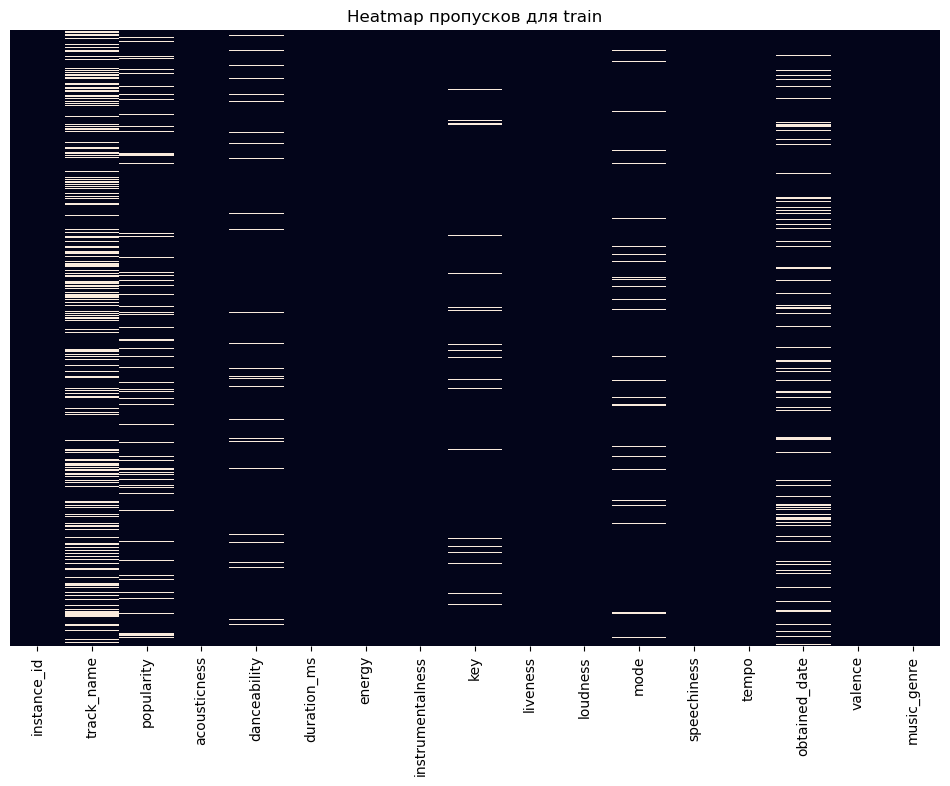

Пропуски в датафрейме test:
               Total  Percent
track_name      2612    26.12
obtained_date   1581    15.81
popularity      1013    10.13
danceability     523     5.23
mode             482     4.82
key              327     3.27



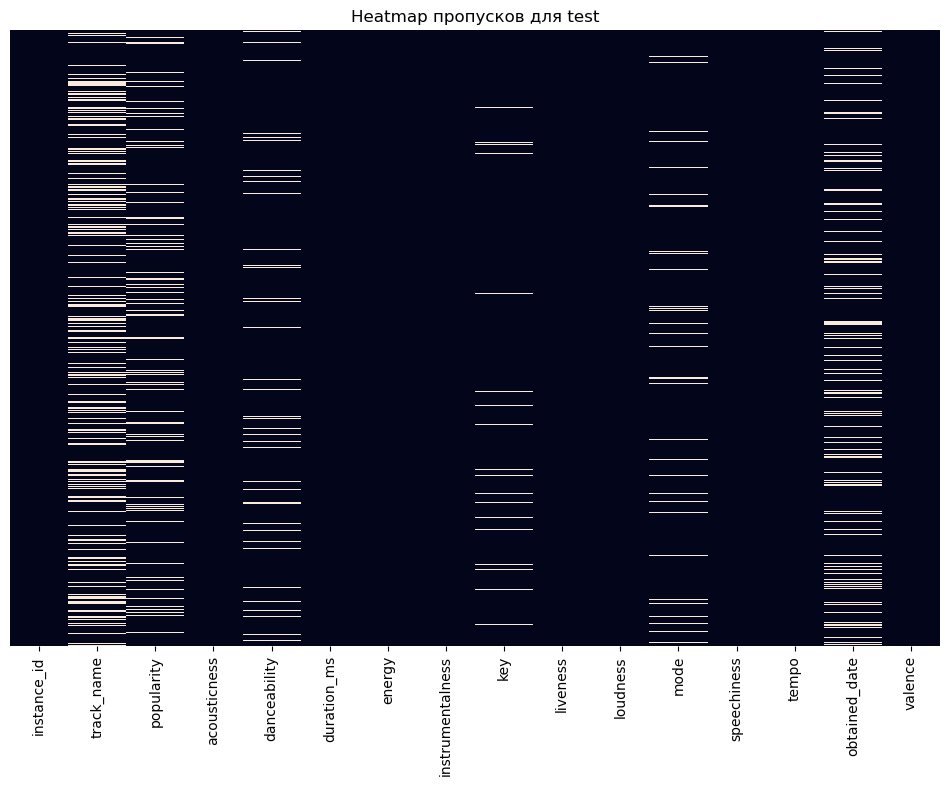

In [18]:
analyze_missing_values(dataframes, ['train', 'test'])

* Несмотря на большое наличие пропусков, данные отсутсвуют лишь в 6 столбцах: `track_name`, `obtained_date`, `popularity`, `danceability`, `mode`, `key`;
* Больше всего пропусков в столбцах `track_name` и `obtained_date` от 15% до 26% от общего кол-ва строк;
* У меня есть предположение, что пропуски могут быть связаны. Думаю, что треки имеющие пропуск в одной переменной, скорее всего имеют другие параметры не заполнеными;
* Построим матрицу корреляции пропусков.

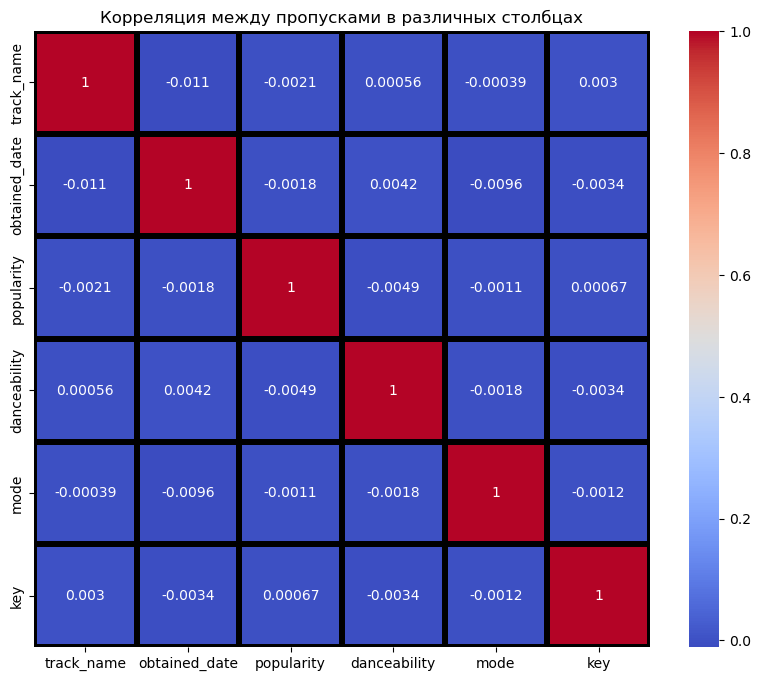

In [19]:
# Создание булевой матрицы пропусков
missing_bool = train_ad[['track_name', 'obtained_date', 'popularity', 'danceability', 'mode', 'key']].isnull()

# Вычисление корреляции между столбцами булевой матрицы
corr = missing_bool.corr(method='spearman')  # Или использовать другой метод корреляции

# Визуализация матрицы корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black', square=True)
plt.title('Корреляция между пропусками в различных столбцах')
plt.show()

* Корреляции между пропусками, к сожалению или к счастью, не наблюдается.
* Поэтапно обработаем пропуски.

#### Пропуски в `popularity`, `danceability`, `mode`, `key`

Столбец `popularity` имеет **9.80%** пропусков от общего числа данных. Это достаточно много, поэтому перед удалением, проверим, можно ли заполнить пропуски.

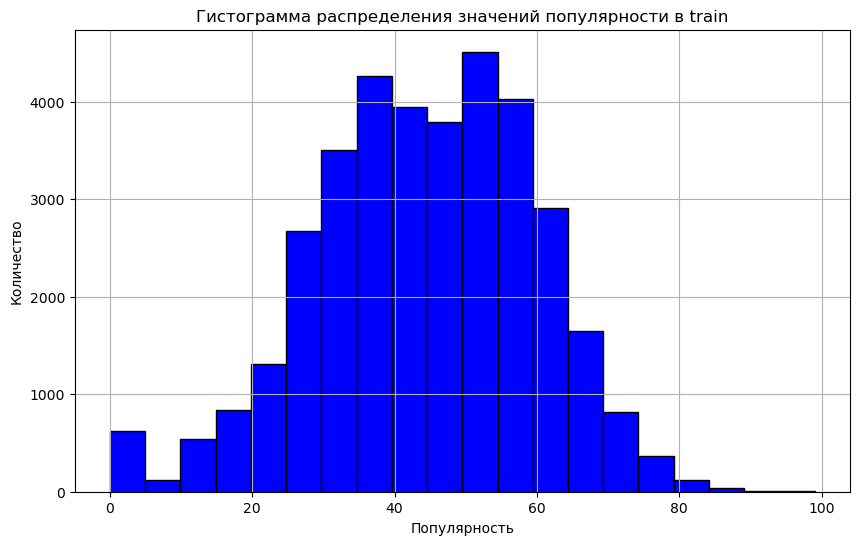

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(train['popularity'], bins=20, color='blue', edgecolor='black')
plt.title('Гистограмма распределения значений популярности в train')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

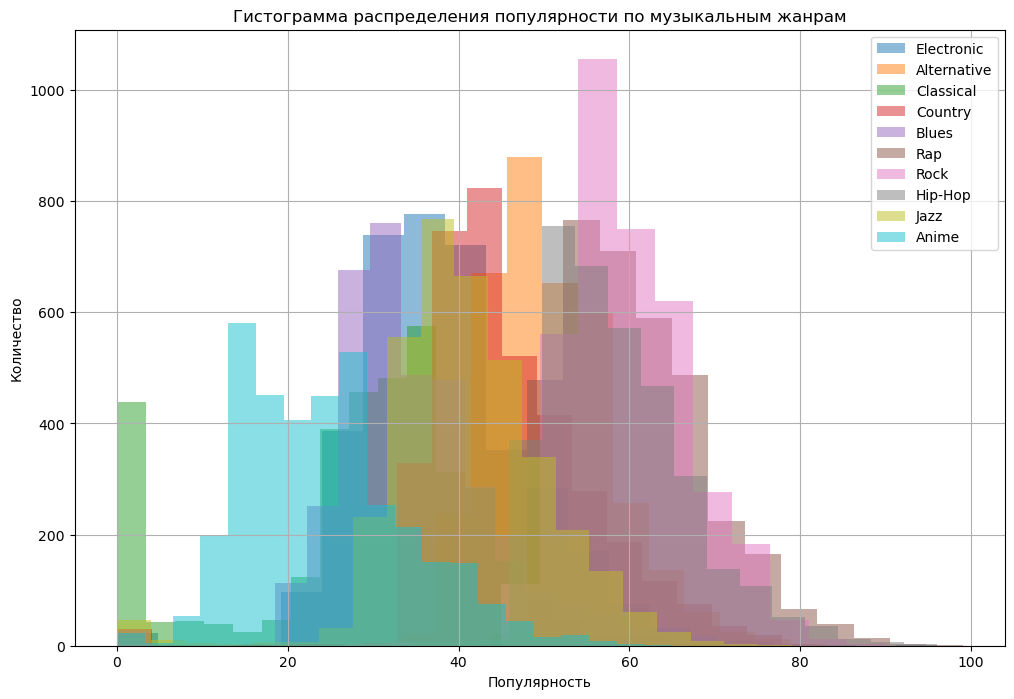

In [21]:
# Уникальные жанры
genres = train['music_genre'].unique()

# Гистограмма для каждого жанра
plt.figure(figsize=(12, 8))
for genre in genres:
    subset = train[train['music_genre'] == genre]
    plt.hist(subset['popularity'], bins=20, label=genre, alpha=0.5)

plt.title('Гистограмма распределения популярности по музыкальным жанрам')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.show()

* Наблюдается зависимость популярности от жанра музыки. Центр распределения каждой гистограммы смещен вправо или влево по шкале популярности. Таким образом, пропуски в столбце `popularity` можно заполнить на основе среднего значения популярности для каждого жанра.

In [22]:
# Используем функцию заполнения пропусков медианой
fill_na_with_genre_median(train, 'popularity')
# Проверка, что пропуски были заполнены
print(f'Пропусков в столбце popularity: {train["popularity"].isnull().sum()}')

Пропусков в столбце popularity: 0


Посмотрим на распределение популярности жанров после заполнения пропусков.

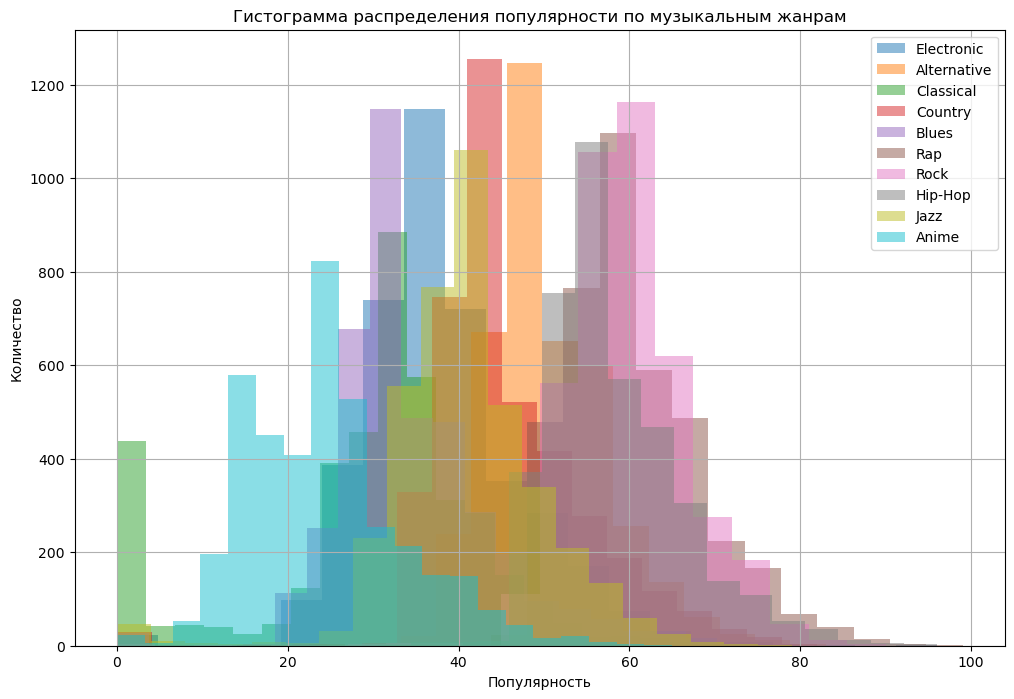

In [23]:
genres = train['music_genre'].unique()    
# Создание гистограмм для каждого жанра
plt.figure(figsize=(12, 8))
for genre in genres:
    subset = train[train['music_genre'] == genre]
    plt.hist(subset['popularity'], bins=20, label=genre, alpha=0.5)

plt.title('Гистограмма распределения популярности по музыкальным жанрам')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.show()

* Очевидно, что выросли пики связанные с медианным значением каждого жанра. В принципе, можно считать заполнение пропусков удачным в данном случае.


Проверим столбец `danceability`, там тоже моного пропусков.

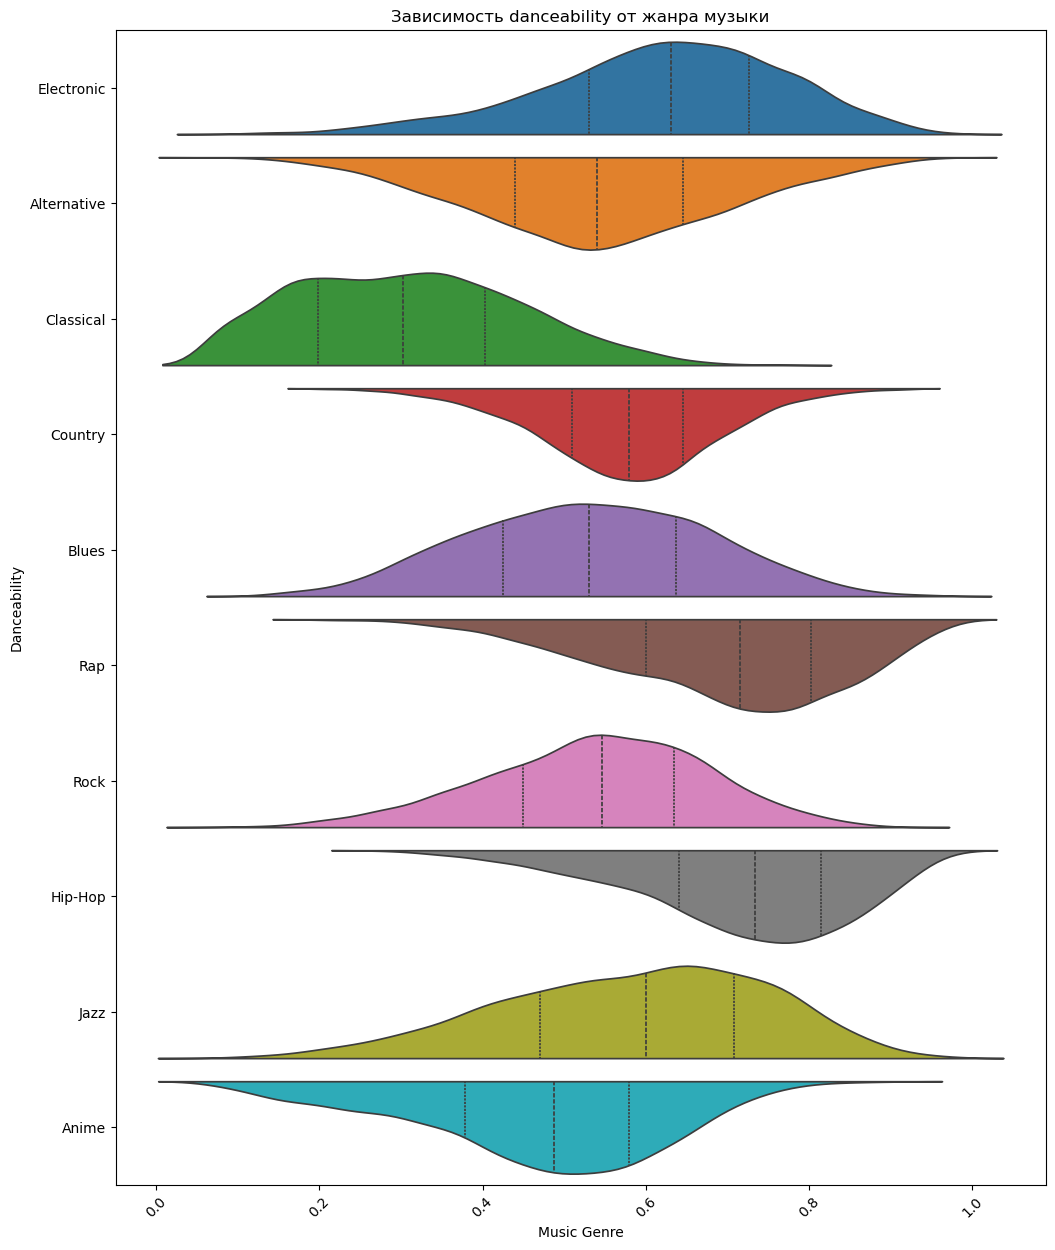

In [24]:
plt.figure(figsize=(12, 15))
sns.violinplot(x='danceability', y='music_genre', hue='music_genre' , data=train,split=True, inner='quart')
plt.xticks(rotation=45)
plt.title('Зависимость danceability от жанра музыки')
plt.xlabel('Music Genre')
plt.ylabel('Danceability')
plt.show()

Так как `danceability` - непрерывная велечина, предлагаю пропуски заменять на случайное число лежащее в пределах 50% распределения значений `danceability` для каждого жанра.\
Границы Q1 (25%) и Q3 (75%)

In [25]:
# Вычисление 25-го и 75-го квартилей для 'danceability' по каждому жанру
quantile_table = train.groupby('music_genre')['danceability'].quantile([0.25, 0.75]).unstack()

# Переименование колонок
quantile_table.columns = ['percentile_25', 'percentile_75']

# Сброс индекса, чтобы 'music_genre' стал колонкой
quantile_table.reset_index(inplace=True)

# Выводим результат
display(quantile_table)

music_genre  percentile_25  percentile_75
0  Alternative           0.44           0.65
1        Anime           0.38           0.58
2        Blues           0.42           0.64
3    Classical           0.20           0.40
4      Country           0.51           0.65
5   Electronic           0.53           0.73
6      Hip-Hop           0.64           0.81
7         Jazz           0.47           0.71
8          Rap           0.60           0.80
9         Rock           0.45           0.63

In [26]:
print(f'Пропусков в столбце danceability: {train["danceability"].isnull().sum()}')

Пропусков в столбце danceability: 2037


In [27]:
fill_na_with_quantile(train, 'danceability')

print(f'Пропусков в столбце danceability: {train["danceability"].isnull().sum()}')

Пропусков в столбце danceability: 0


Столбец `key` 

In [28]:
top_keys_per_genre = train.groupby('music_genre')['key'].apply(lambda x: x.value_counts().head(3).index.tolist())

train['key'] = train.apply(fill_missing_keys, axis=1)

Столбец `mode` 

In [29]:
fill_na_most_frequent_per_genre(train, 'mode')

Пропущенных данных в этих столбцах мало, менее 5%. Можно смело очистить строки с пропусками.

In [30]:
# Удаление строк
# train = train.dropna(subset=['key'])

# Размер после удаления
# final_size = train.shape[0]

# Расчет и вывод потерь в процентах
# loss_percent = ((initial_size - final_size) / initial_size) * 100

# print(f"Размер до: {initial_size}")
# print(f"Размер после: {final_size}")
# print(f"Потеряно данных: {loss_percent:.2f}%")

#### Пропуски в `track_name` и `obtained_date`

In [31]:
print(f'Кол-во уникальных названий треков в таблице train {len(train.track_name.unique())}')
print(f'Кол-во уникальных названий треков в таблице test {len(test.track_name.unique())}')

Кол-во уникальных названий треков в таблице train 26019
Кол-во уникальных названий треков в таблице test 7124


In [32]:
print(f'Уникальные даты загрузки треков в таблице train {train.obtained_date.unique()}')
print(f'Уникальные даты загрузки треков в таблице test {test.obtained_date.unique()}')

Уникальные даты загрузки треков в таблице train ['4-Apr' nan '5-Apr' '3-Apr' '1-Apr' '0/4']
Уникальные даты загрузки треков в таблице test ['4-Apr' '3-Apr' nan '5-Apr' '1-Apr']


* Оставим пропуски в этих переменных, тк они не пригодятся нам для анализа.
  * `track_name` уникальна, у нее отсутсвует обобщаемость (как и у `instance_id`), которая могла бы помочь в предсказании жанра;
  * `obtainde_date` может не иметь прямого влияния на жанр трека. Так, у нас присутсвуют данные только за арпель, поэтому если в новых данных будут другие даты, модель не сможет правильно экстраполировать полученный результат.

### Дубликаты

In [33]:
dub_df = train.drop(['instance_id', 'track_name', 'obtained_date'], axis=1)
print('Всего дубликатов строк: ',dub_df.duplicated().sum())

Всего дубликатов строк:  1


Бывает, посмотрим на эту парочку

In [34]:
# Найдем индексы дубликатов
duplicates = dub_df.duplicated(keep=False)
duplicate_indices = dub_df[duplicates].index
display(train.loc[duplicate_indices])

instance_id         track_name  popularity  acousticness  danceability  \
13576         2161  Sunspot (B-Sides)       23.00          0.28          0.70   
32962         3277                NaN       23.00          0.28          0.70   

       duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
13576   409,400.00    0.39              0.88   C      0.11    -13.73  Major   
32962   409,400.00    0.39              0.88   C      0.11    -13.73  Major   

       speechiness   tempo obtained_date  valence music_genre  
13576         0.04  87.694         4-Apr     0.59  Electronic  
32962         0.04  87.694         4-Apr     0.59  Electronic

Оставим как есть, пусть живет!

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       40000 non-null  int64  
 1   track_name        29262 non-null  object 
 2   popularity        40000 non-null  float64
 3   acousticness      40000 non-null  float64
 4   danceability      40000 non-null  float64
 5   duration_ms       40000 non-null  float64
 6   energy            40000 non-null  float64
 7   instrumentalness  40000 non-null  float64
 8   key               40000 non-null  object 
 9   liveness          40000 non-null  float64
 10  loudness          40000 non-null  float64
 11  mode              40000 non-null  object 
 12  speechiness       40000 non-null  float64
 13  tempo             40000 non-null  object 
 14  obtained_date     33781 non-null  object 
 15  valence           40000 non-null  float64
 16  music_genre       40000 non-null  object

### Вывод по итогам предобработки

* Избавились от всех пропусков потеряли всего 4.63%;
* В `popularity` заполнили пропуски медианным значением;
* В `danceability` заполнили пропуски случайным значением лежащим в пределах 50% выборки для каждого жанра.
* Пропуски в `mode` и `key` были удалены из-за их малого кол-ва.

## 3. Исследовательский анализ <a class="anchor" id="chapter3"></a>

В ходе исследовательнского анализа отдельно обработаем каждый столбец, выведем закономерности, посмотрим на взаимосвязи в данных.


### Столбец `popularity`

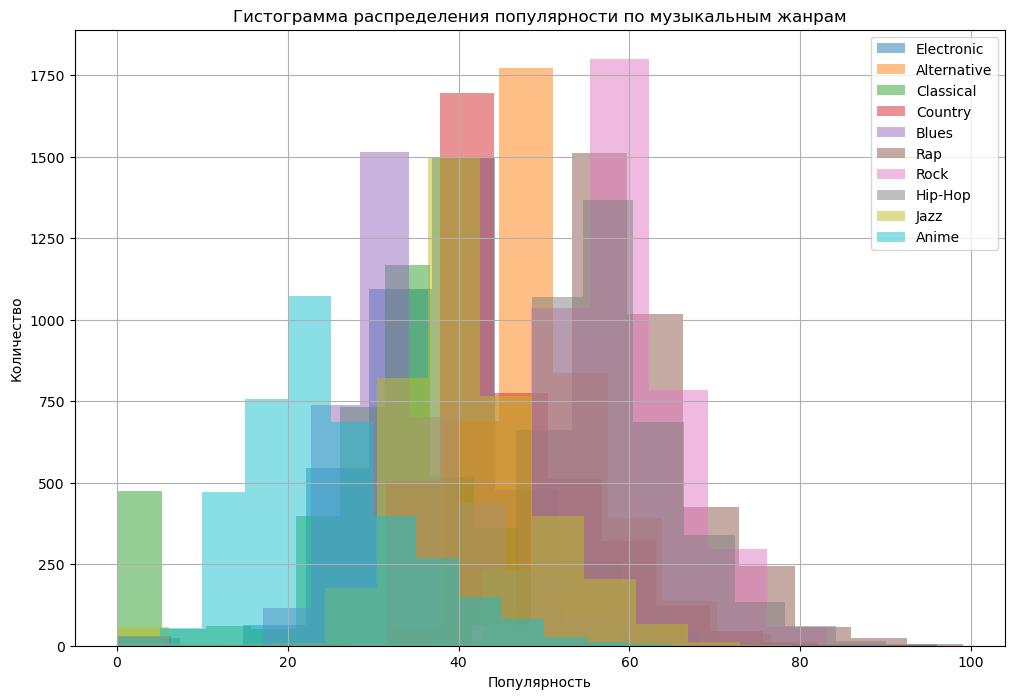

'Описательная статистика для popularity:'

count  mean   std   min   25%   50%   75%   max
music_genre                                                   
Alternative 3,939.00 50.25  7.19  0.00 46.00 49.00 54.00 83.00
Anime       4,003.00 24.08  9.18  0.00 17.00 23.00 29.00 65.00
Blues       3,987.00 34.66  9.18  0.00 29.00 33.00 38.00 74.00
Classical   4,019.00 29.66 13.40  0.00 26.00 32.00 37.00 68.00
Country     4,024.00 45.80  9.29  0.00 40.00 44.00 51.00 82.00
Electronic  4,051.00 38.01  9.27  0.00 32.00 37.00 43.00 96.00
Hip-Hop     3,935.00 58.23  7.90 19.00 53.00 57.00 62.00 96.00
Jazz        4,023.00 40.85  9.09  0.00 36.00 40.00 45.00 79.00
Rap         3,964.00 60.43  7.82 14.00 55.00 59.00 65.00 99.00
Rock        4,055.00 59.54  7.04  0.00 55.00 59.00 63.00 90.00

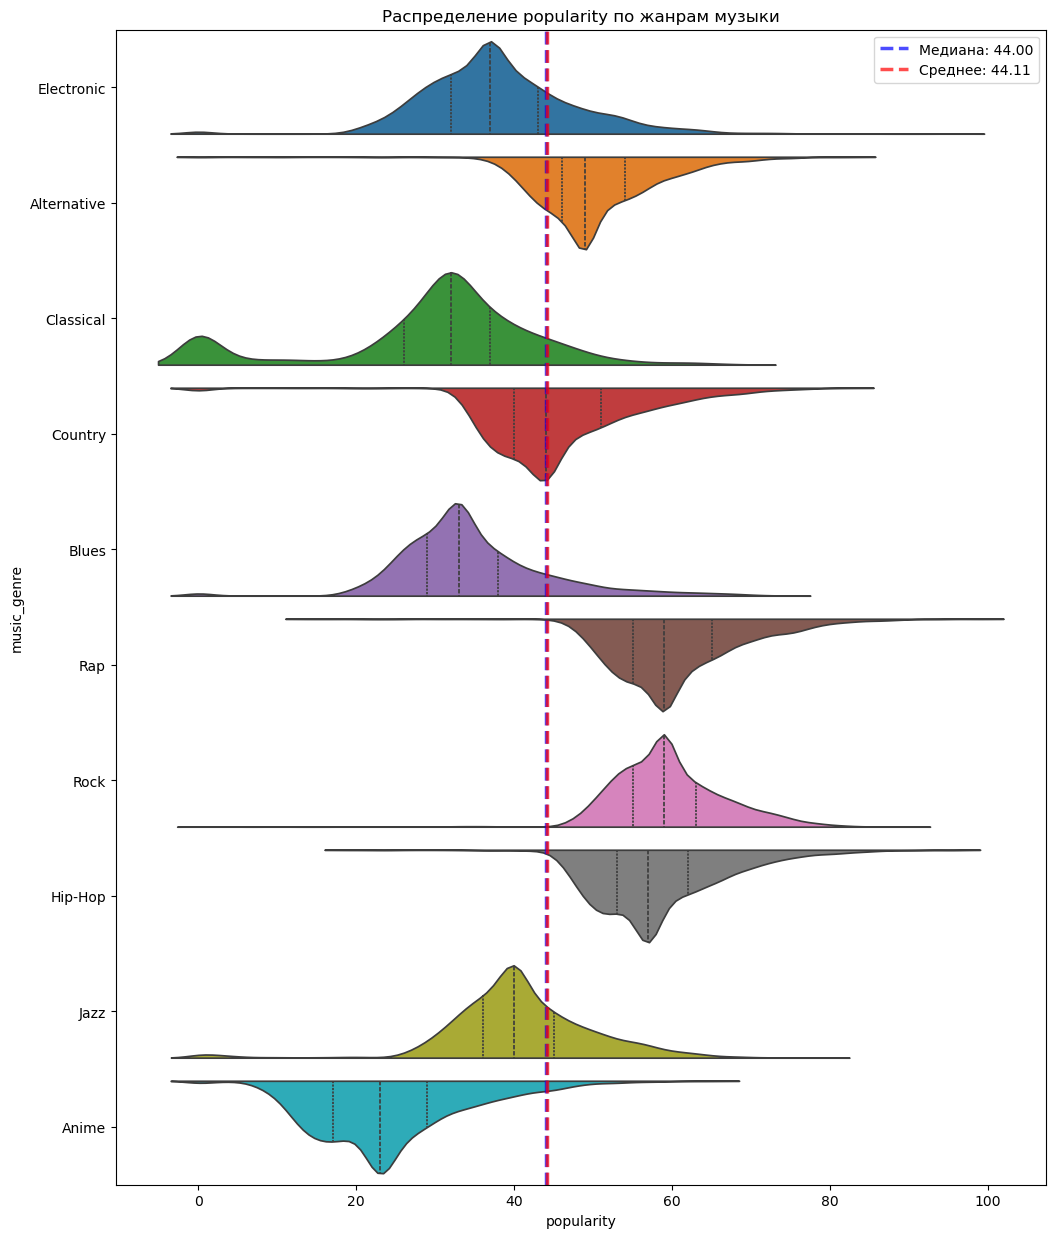

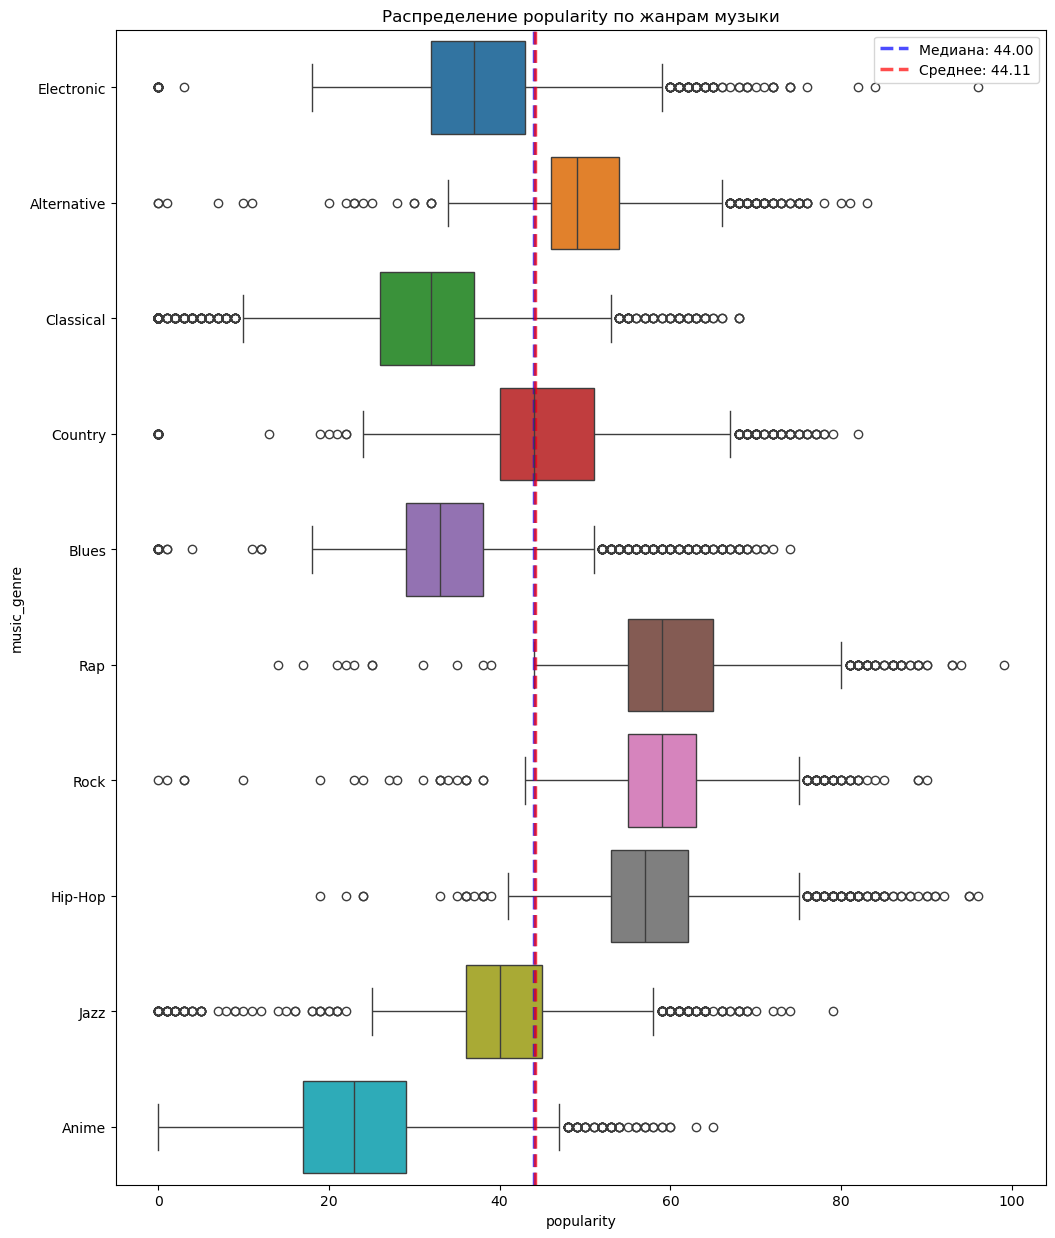

In [36]:
plt.figure(figsize=(12, 8))
for genre in genres:
    subset = train[train['music_genre'] == genre]
    plt.hist(subset['popularity'], bins=13, label=genre, alpha=0.5)
plt.title('Гистограмма распределения популярности по музыкальным жанрам')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.show()
descriptive_stats_and_plot(train, 'popularity')

* Видна зависимость популярности трека от его жанра;
* Нет критичных выбросов или ошибочных, пропущенных значений;
* Изменим тип столбца на *Int*.

In [37]:
train['popularity'] = train['popularity'].astype(int)

In [38]:
# проверим тип столбца
print(train['popularity'].dtypes)

int32


### Столбец `acousticness`

'Описательная статистика для acousticness:'

count  mean  std  min  25%  50%  75%  max
music_genre                                             
Alternative 3,939.00  0.16 0.24 0.00 0.00 0.03 0.24 0.98
Anime       4,003.00  0.29 0.37 0.00 0.01 0.07 0.61 1.00
Blues       3,987.00  0.32 0.31 0.00 0.04 0.22 0.56 0.99
Classical   4,019.00  0.87 0.26 0.00 0.91 0.97 0.99 1.00
Country     4,024.00  0.27 0.26 0.00 0.05 0.18 0.43 0.98
Electronic  4,051.00  0.12 0.20 0.00 0.00 0.03 0.14 0.98
Hip-Hop     3,935.00  0.18 0.19 0.00 0.03 0.11 0.27 0.98
Jazz        4,023.00  0.49 0.34 0.00 0.15 0.51 0.82 1.00
Rap         3,964.00  0.17 0.19 0.00 0.03 0.09 0.25 0.94
Rock        4,055.00  0.19 0.25 0.00 0.01 0.07 0.30 0.99

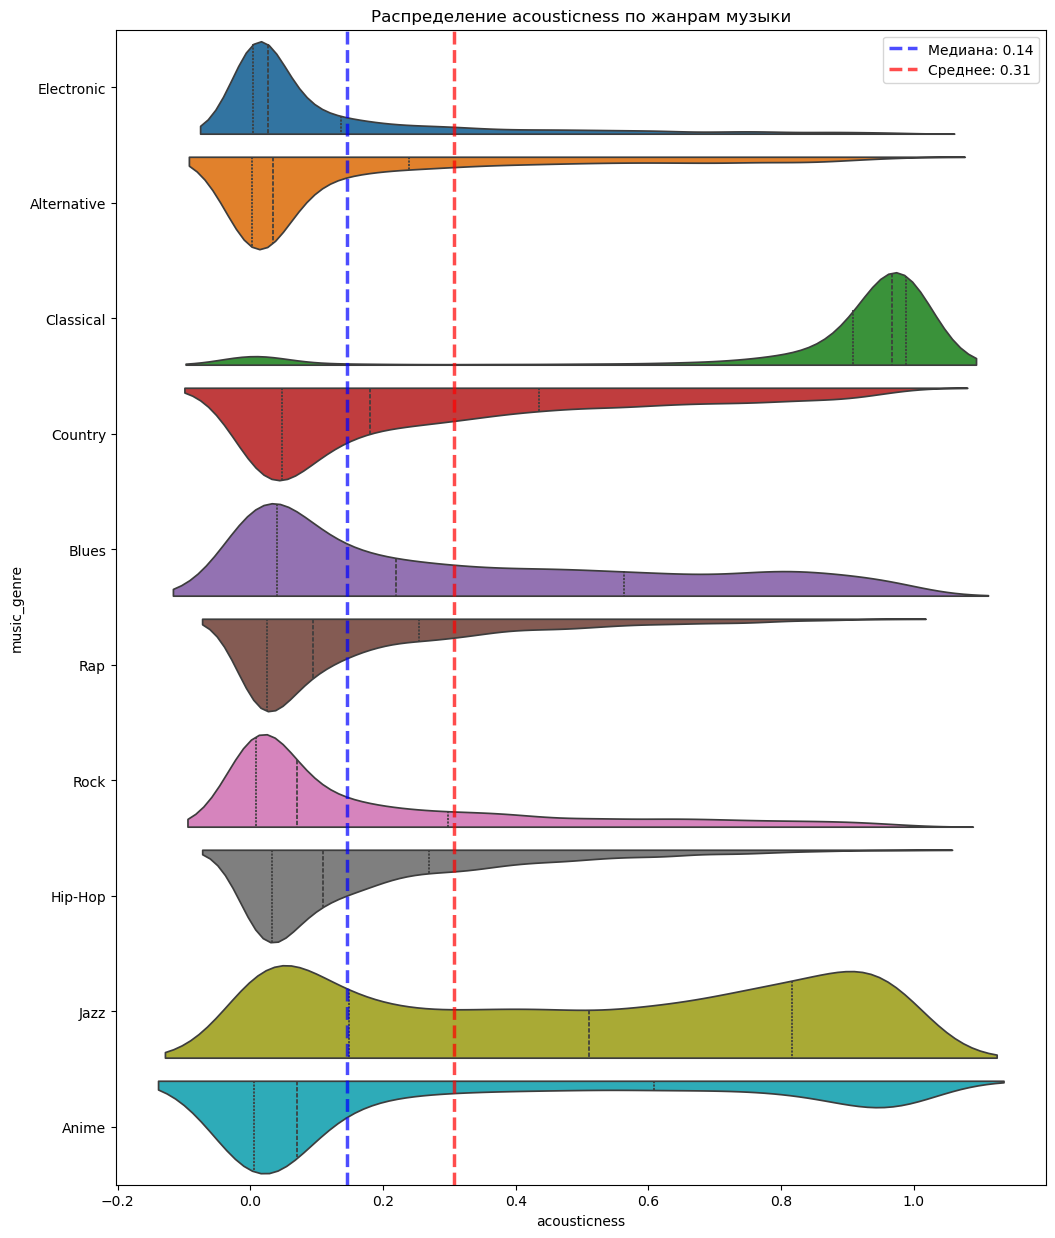

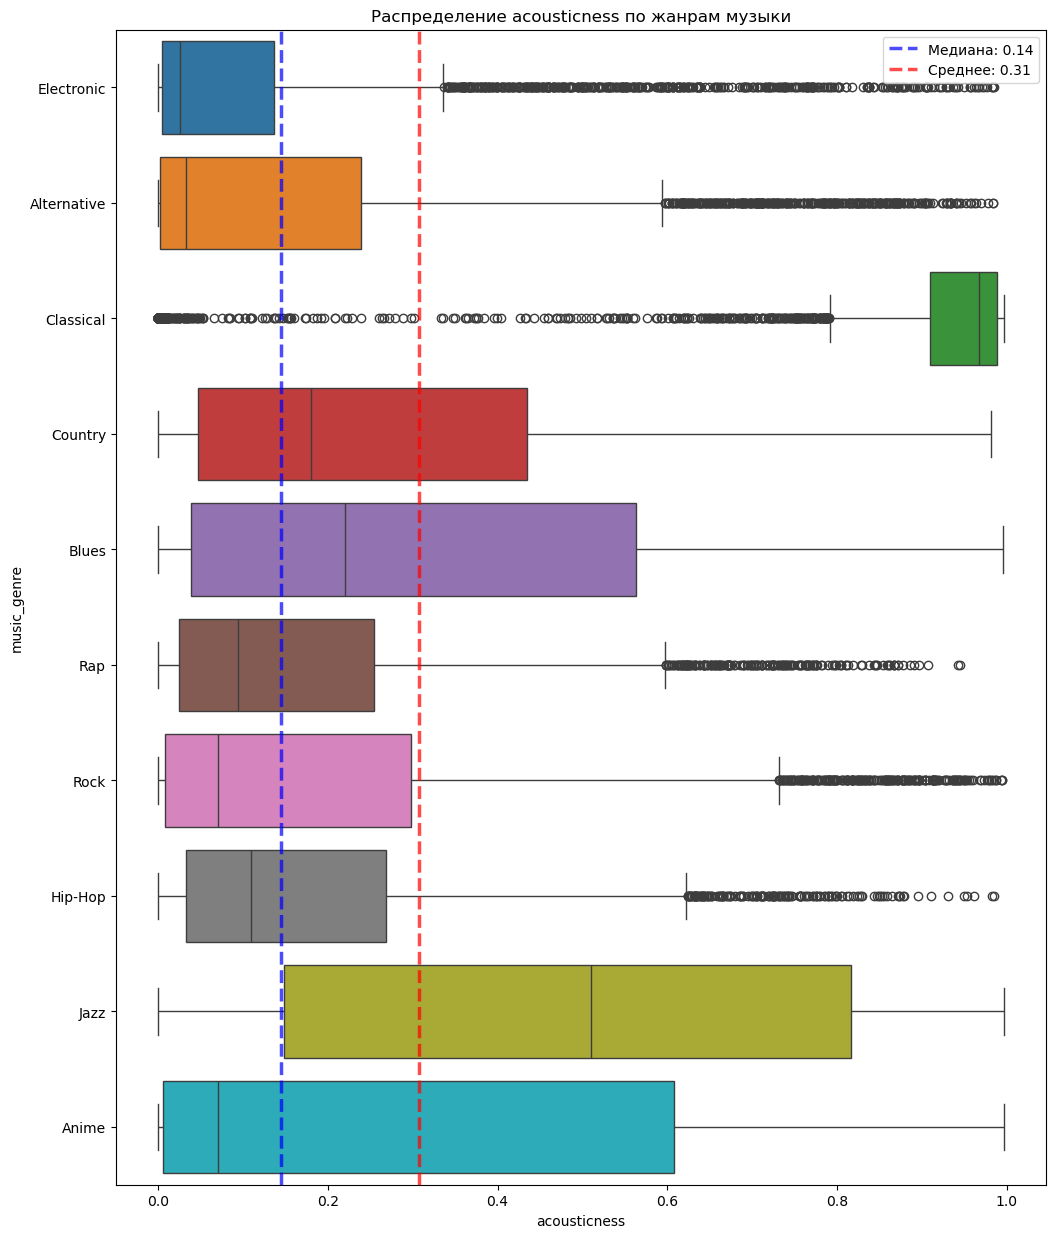

In [39]:
descriptive_stats_and_plot(train, 'acousticness')

* В целом, выделяется только значения в жанре **Classical**, они смещают медиану со средним и немного "ломают восприятие";
* Построим график без этого жанра.

'Описательная статистика для acousticness:'

count  mean  std  min  25%  50%  75%  max
music_genre                                             
Alternative 3,939.00  0.16 0.24 0.00 0.00 0.03 0.24 0.98
Anime       4,003.00  0.29 0.37 0.00 0.01 0.07 0.61 1.00
Blues       3,987.00  0.32 0.31 0.00 0.04 0.22 0.56 0.99
Country     4,024.00  0.27 0.26 0.00 0.05 0.18 0.43 0.98
Electronic  4,051.00  0.12 0.20 0.00 0.00 0.03 0.14 0.98
Hip-Hop     3,935.00  0.18 0.19 0.00 0.03 0.11 0.27 0.98
Jazz        4,023.00  0.49 0.34 0.00 0.15 0.51 0.82 1.00
Rap         3,964.00  0.17 0.19 0.00 0.03 0.09 0.25 0.94
Rock        4,055.00  0.19 0.25 0.00 0.01 0.07 0.30 0.99

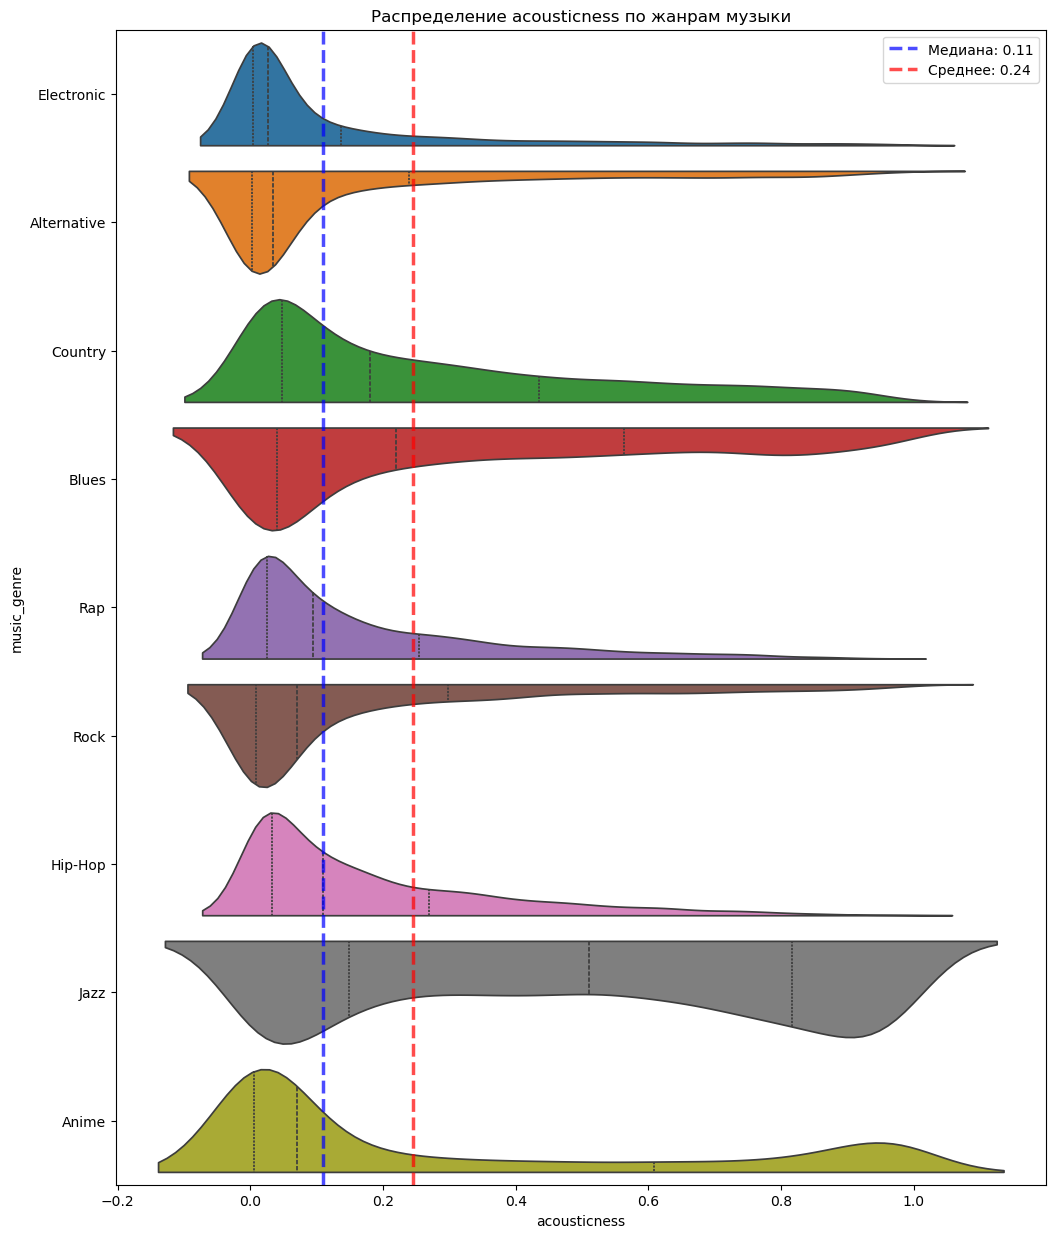

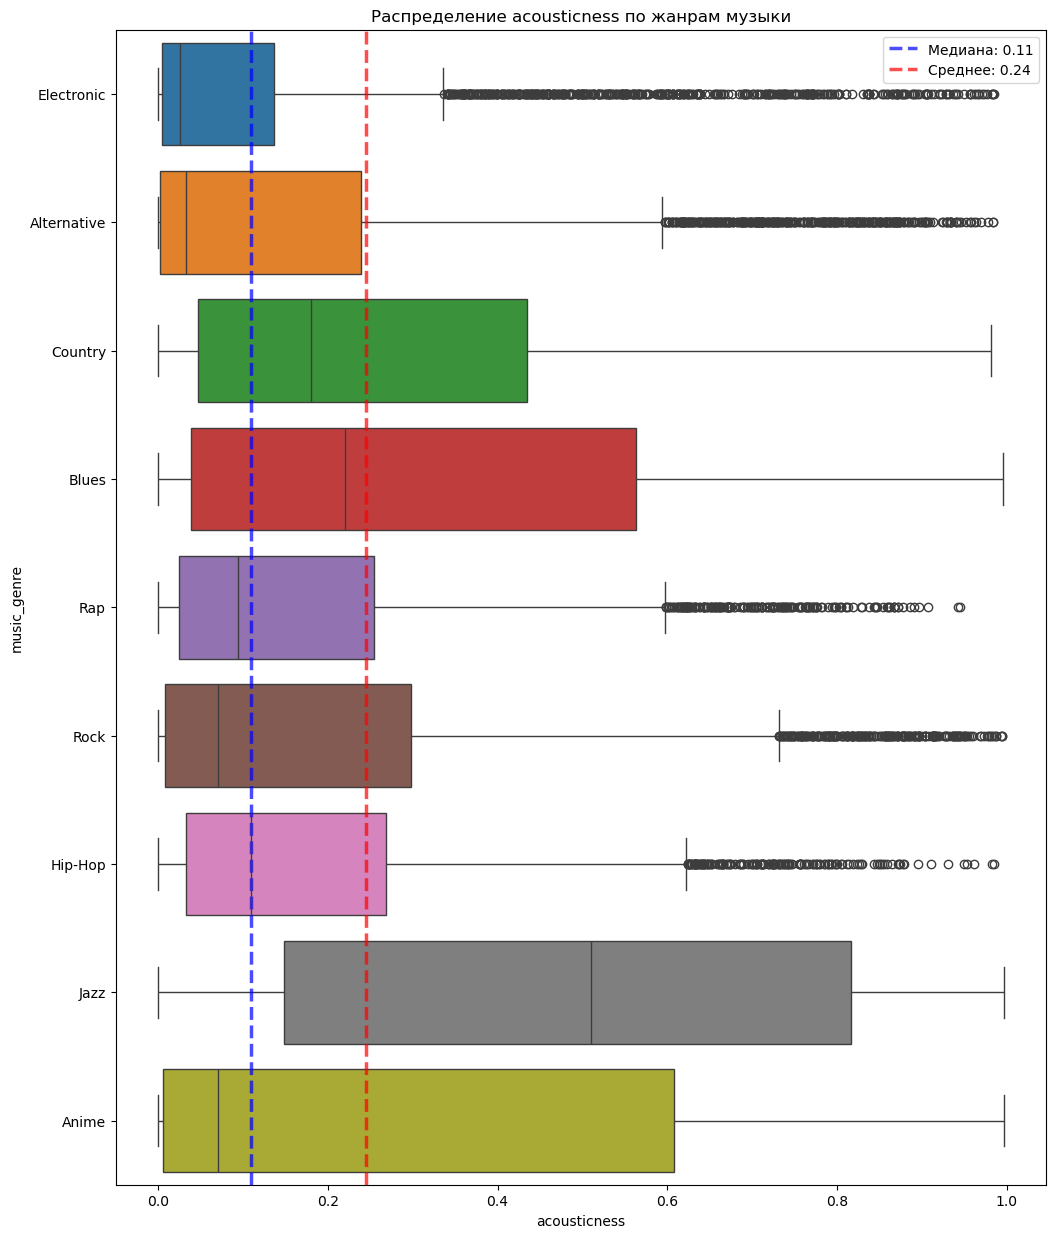

In [40]:
descriptive_stats_and_plot((train[train['music_genre'] != 'Classical']), 'acousticness')

* Числовые метрики сместились влево.
* Критических выбросов или ошибочных значений не обнаружено.

### Столбец `danceability` 

'Описательная статистика для danceability:'

count  mean  std  min  25%  50%  75%  max
music_genre                                             
Alternative 3,939.00  0.54 0.15 0.06 0.44 0.54 0.64 0.97
Anime       4,003.00  0.47 0.15 0.06 0.39 0.49 0.57 0.91
Blues       3,987.00  0.53 0.14 0.12 0.43 0.53 0.63 0.97
Classical   4,019.00  0.31 0.13 0.06 0.20 0.30 0.40 0.78
Country     4,024.00  0.58 0.11 0.20 0.51 0.58 0.64 0.92
Electronic  4,051.00  0.62 0.14 0.08 0.54 0.63 0.72 0.98
Hip-Hop     3,935.00  0.72 0.13 0.27 0.65 0.73 0.81 0.98
Jazz        4,023.00  0.59 0.16 0.06 0.48 0.60 0.70 0.98
Rap         3,964.00  0.70 0.14 0.20 0.61 0.71 0.80 0.97
Rock        4,055.00  0.54 0.13 0.06 0.46 0.55 0.63 0.92

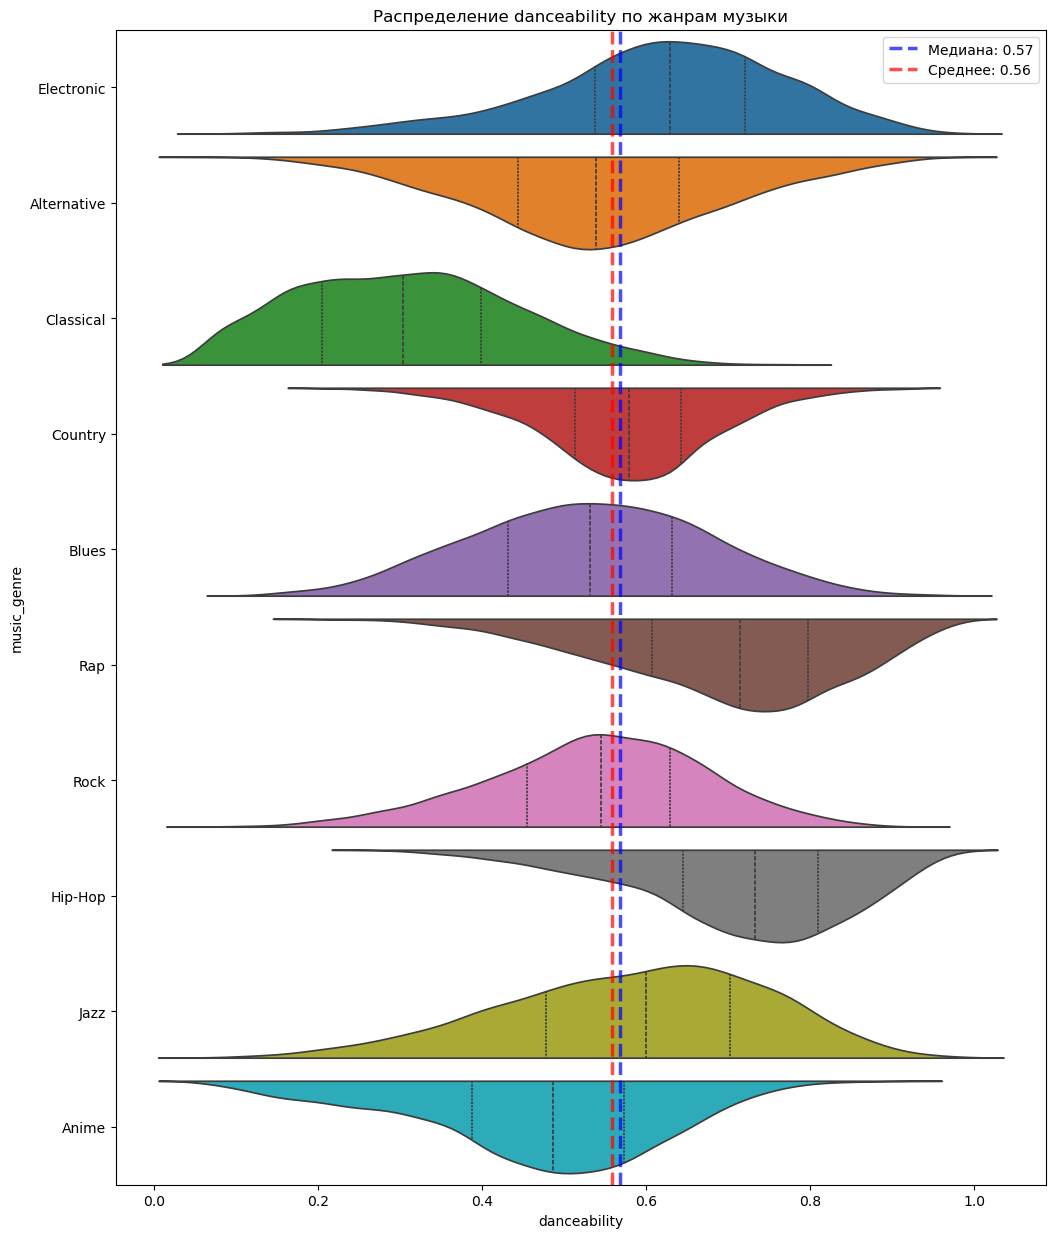

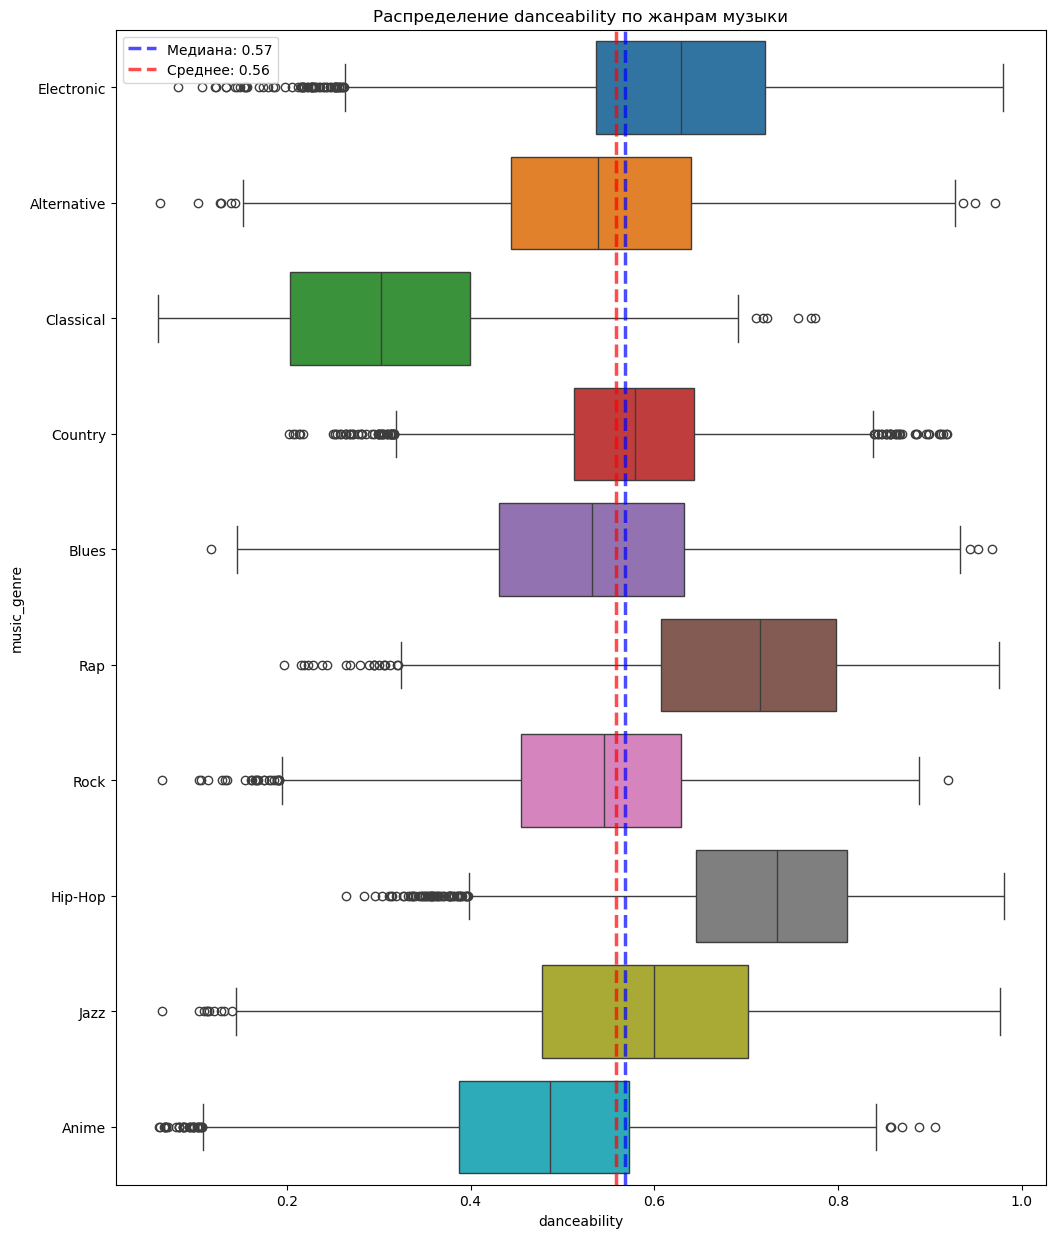

In [41]:
descriptive_stats_and_plot(train, 'danceability')

'Описательная статистика для danceability:'

count  mean  std  min  25%  50%  75%  max
music_genre                                             
Alternative 3,939.00  0.54 0.15 0.06 0.44 0.54 0.64 0.97
Anime       4,003.00  0.47 0.15 0.06 0.39 0.49 0.57 0.91
Blues       3,987.00  0.53 0.14 0.12 0.43 0.53 0.63 0.97
Country     4,024.00  0.58 0.11 0.20 0.51 0.58 0.64 0.92
Electronic  4,051.00  0.62 0.14 0.08 0.54 0.63 0.72 0.98
Hip-Hop     3,935.00  0.72 0.13 0.27 0.65 0.73 0.81 0.98
Jazz        4,023.00  0.59 0.16 0.06 0.48 0.60 0.70 0.98
Rap         3,964.00  0.70 0.14 0.20 0.61 0.71 0.80 0.97
Rock        4,055.00  0.54 0.13 0.06 0.46 0.55 0.63 0.92

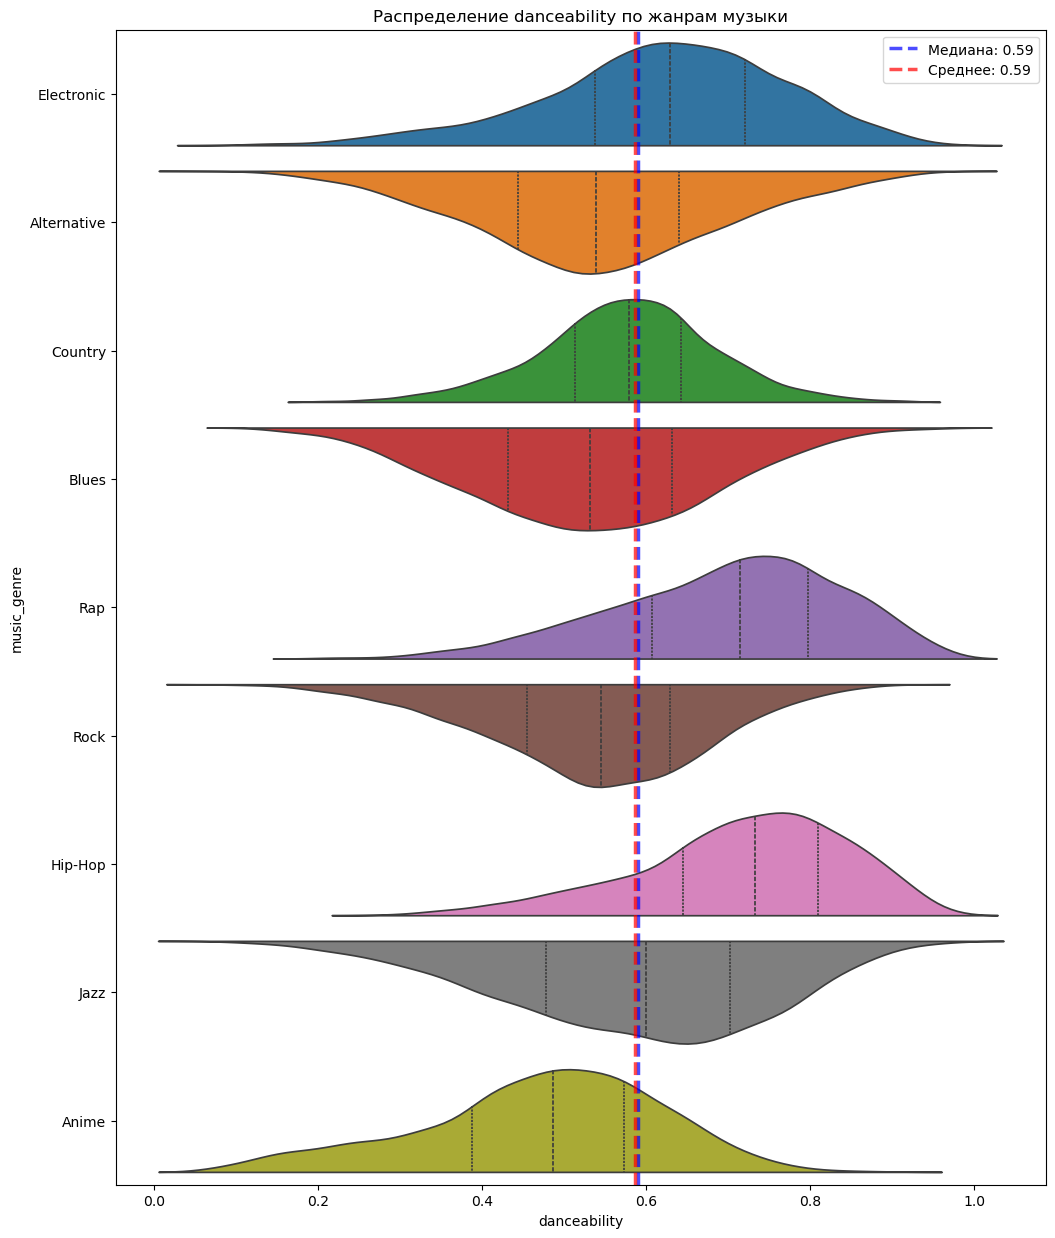

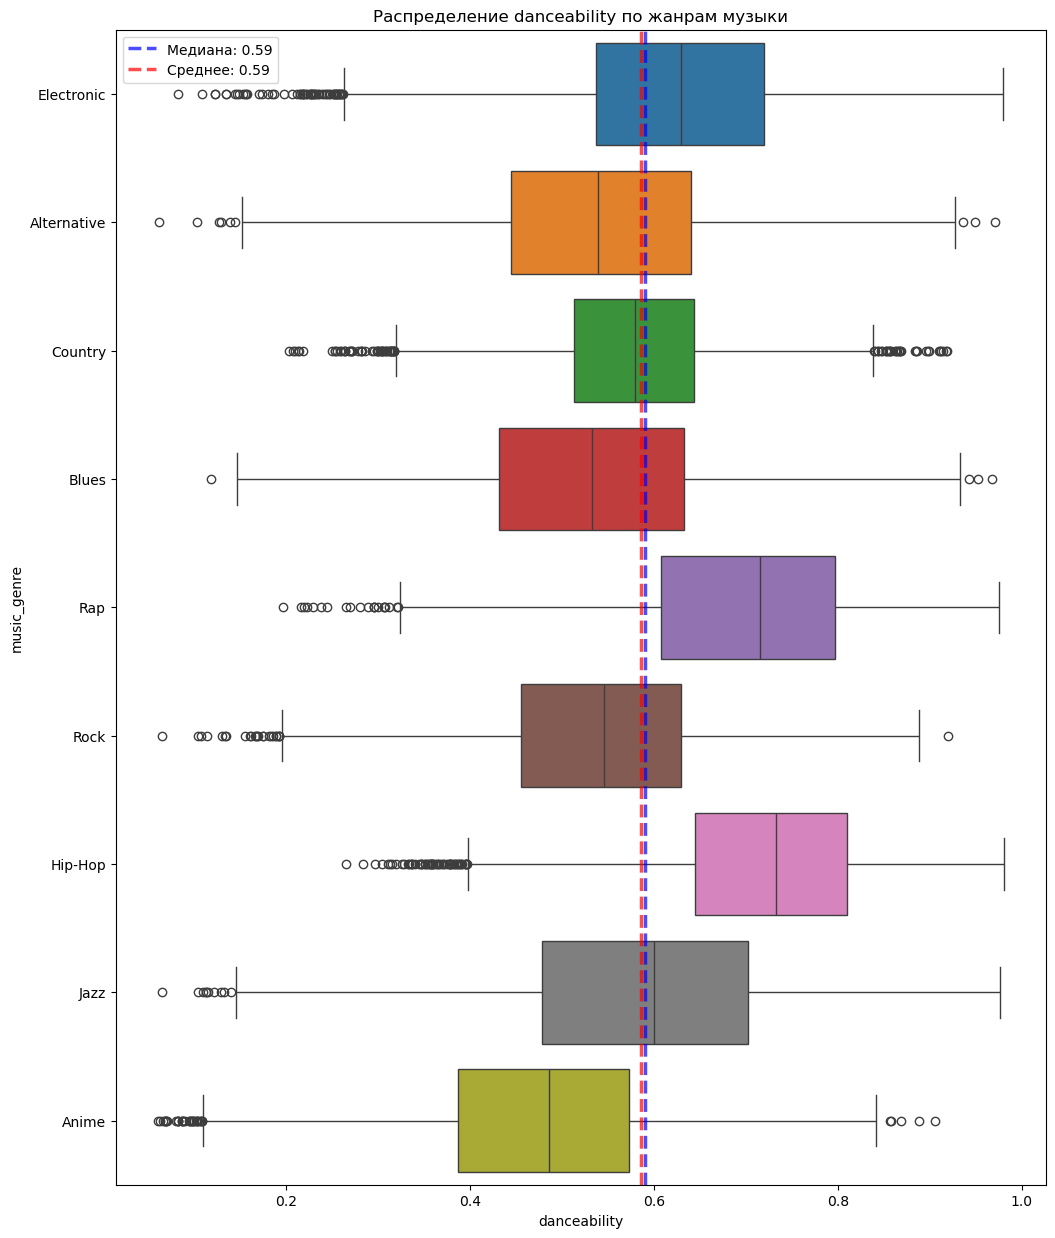

In [42]:
descriptive_stats_and_plot((train[train['music_genre'] != 'Classical']), 'danceability')

* Аномалии не выявлены, оставим столбец как есть.

### Столбец `duration_ms`

'Описательная статистика для duration_ms:'

count       mean        std   min        25%        50%  \
music_genre                                                              
Alternative 3,939.00 209,780.79  91,014.45 -1.00 186,089.50 219,721.00   
Anime       4,003.00 209,879.58 106,474.48 -1.00 146,426.50 230,587.00   
Blues       3,987.00 228,155.76 133,465.46 -1.00 171,540.00 220,187.00   
Classical   4,019.00 278,239.43 221,911.34 -1.00 148,306.50 241,133.00   
Country     4,024.00 196,473.37  76,617.04 -1.00 180,067.00 207,383.50   
Electronic  4,051.00 243,799.17 168,260.47 -1.00 192,000.00 236,471.00   
Hip-Hop     3,935.00 199,609.15  86,518.87 -1.00 168,880.50 210,467.00   
Jazz        4,023.00 238,066.23 130,461.86 -1.00 171,861.00 236,800.00   
Rap         3,964.00 195,701.47  85,594.96 -1.00 167,972.50 207,053.50   
Rock        4,055.00 212,405.59  94,860.00 -1.00 186,173.50 218,286.00   

                   75%          max  
music_genre                          
Alternative 255,283.50   656,493.00  
Anime       274,113.50 1,295,600.00  
Blues       279,333.50 2,019,293.00  
Classical   363,853.50 3,195,440.00  
Country     233,982.50   599,315.00  
Electronic  297,846.50 4,830,606.00  
Hip-Hop     249,320.00   723,573.00  
Jazz        303,966.50 1,237,960.00  
Rap         243,857.75   579,293.00  
Rock        256,973.50   811,077.00

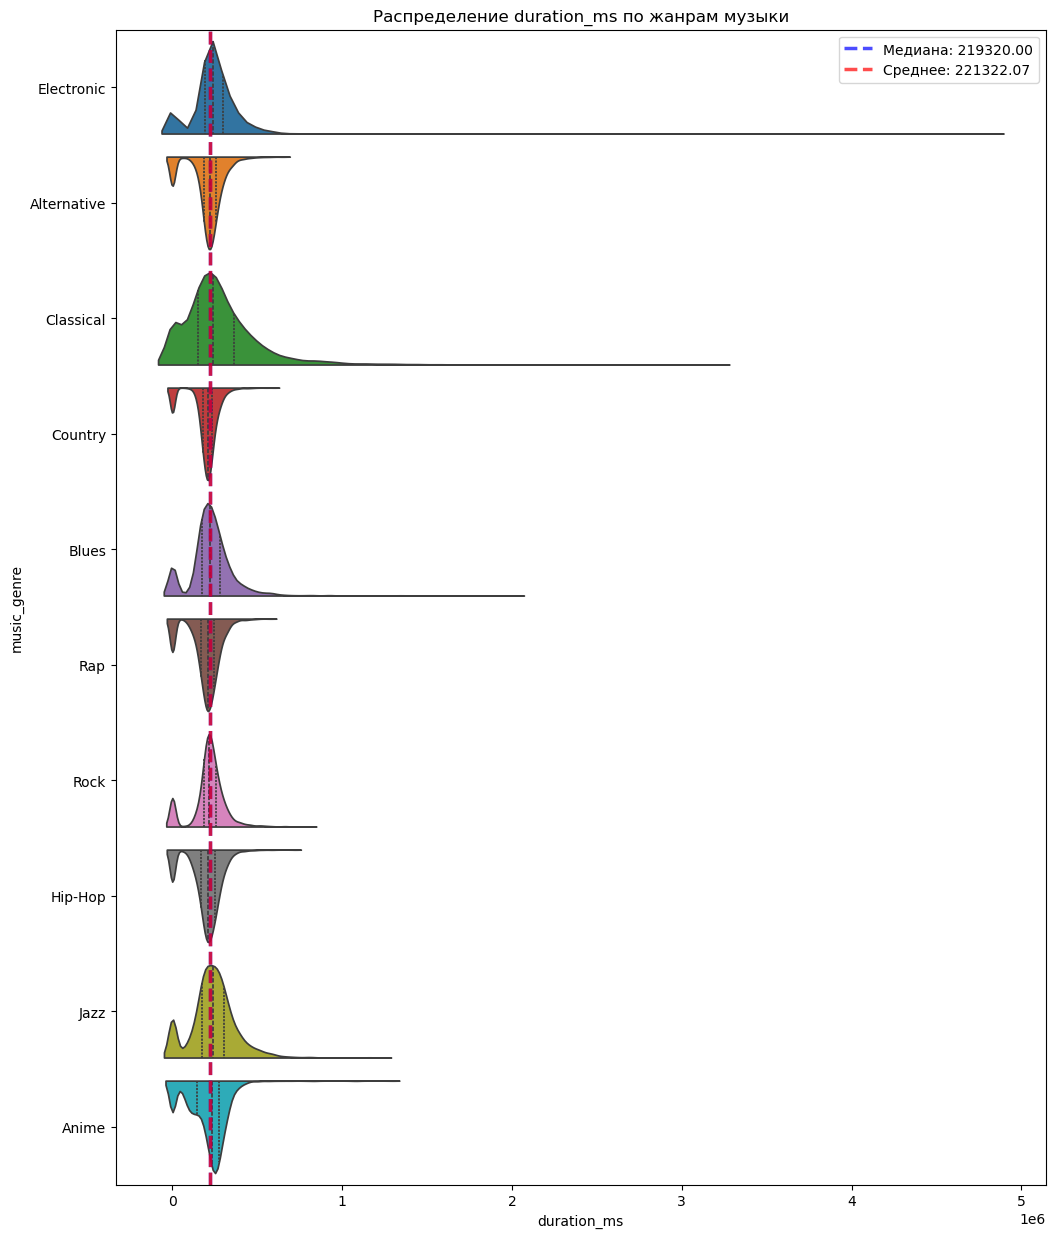

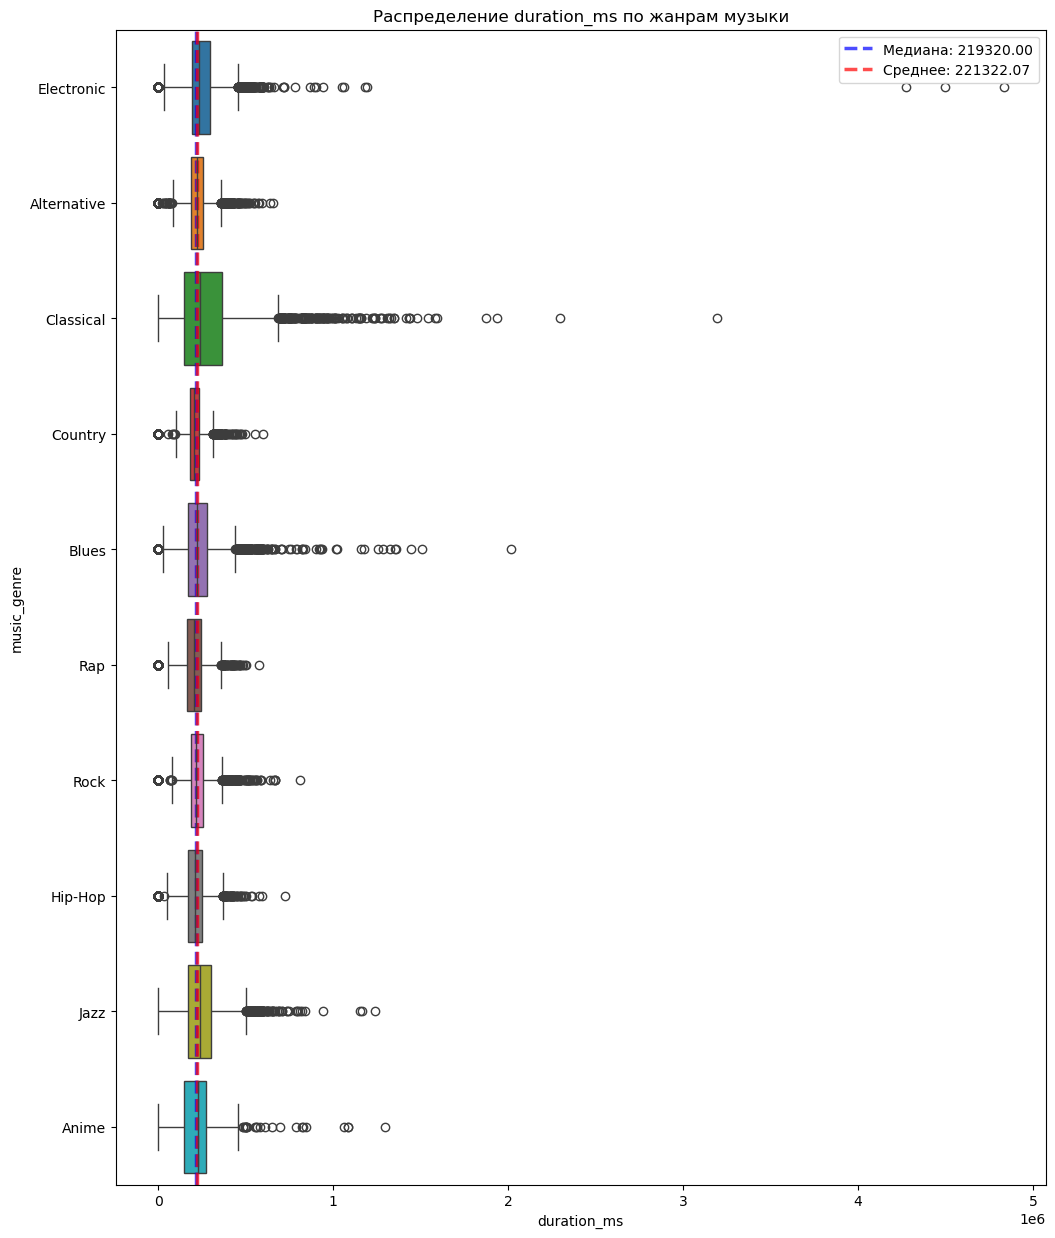

In [43]:
descriptive_stats_and_plot(train, 'duration_ms')

* Столбец содержит целочисленные значения, поменяем тип на int.
* В столбце несколько проблем:
    * Наличие выбросов искажающих общую картину средней длительности трека;
    * Наличие отрицательных значений длительности трека;
    * Неправильный тип столбца.


Отрицательные значения `duration_ms`
* Отрицательные значения в этом столбце - по сути, неявные пропуски. Поскольку, все отрицательные значания равны **-1**, что делает иъ схожими.
* Возможно ошибка вызвана техническим сбоем или человеческим фактором.

In [44]:
train['duration_ms'].replace(-1, np.nan, inplace=True)
print(f'Пропусков в столбце duration_ms: {train["duration_ms"].isnull().sum()}')

Пропусков в столбце duration_ms: 3956


In [45]:
fill_na_with_genre_median(train, 'duration_ms')

print(f'Пропусков в столбце duration_ms: {train["duration_ms"].isnull().sum()}')

Пропусков в столбце duration_ms: 0


Исправим тип переменной

In [46]:
train['duration_ms'] = train['duration_ms'].astype(int)
print(train['duration_ms'].dtypes)

int32


Исправим длительность

'Описательная статистика для duration_ms:'

count       mean        std       min        25%        50%  \
music_genre                                                                  
Alternative 3,939.00 232,823.89  57,325.27 24,000.00 201,077.50 225,787.00   
Anime       4,003.00 231,715.15  81,555.81 30,515.00 191,026.50 238,960.00   
Blues       3,987.00 249,798.37 100,777.15 30,097.00 190,813.50 229,000.00   
Classical   4,019.00 301,637.28 179,713.72 16,316.00 188,056.50 261,667.00   
Country     4,024.00 216,563.21  42,694.72 56,227.00 191,520.00 211,626.00   
Electronic  4,051.00 264,584.53  93,359.49 34,059.00 210,259.50 244,965.00   
Hip-Hop     3,935.00 220,367.45  57,027.74 33,093.00 187,589.50 216,094.00   
Jazz        4,023.00 262,318.39 103,148.44 19,693.00 196,633.50 248,407.00   
Rap         3,964.00 218,004.51  53,598.04 59,118.00 187,329.00 214,065.00   
Rock        4,055.00 235,578.76  61,949.57 66,533.00 201,385.50 225,340.00   

                   75%          max  
music_genre                          
Alternative 255,283.50   656,493.00  
Anime       274,113.50 1,000,000.00  
Blues       279,333.50 1,000,000.00  
Classical   363,853.50 1,000,000.00  
Country     233,982.50   599,315.00  
Electronic  297,846.50 1,000,000.00  
Hip-Hop     249,320.00   723,573.00  
Jazz        303,966.50 1,000,000.00  
Rap         243,857.75   579,293.00  
Rock        256,973.50   811,077.00

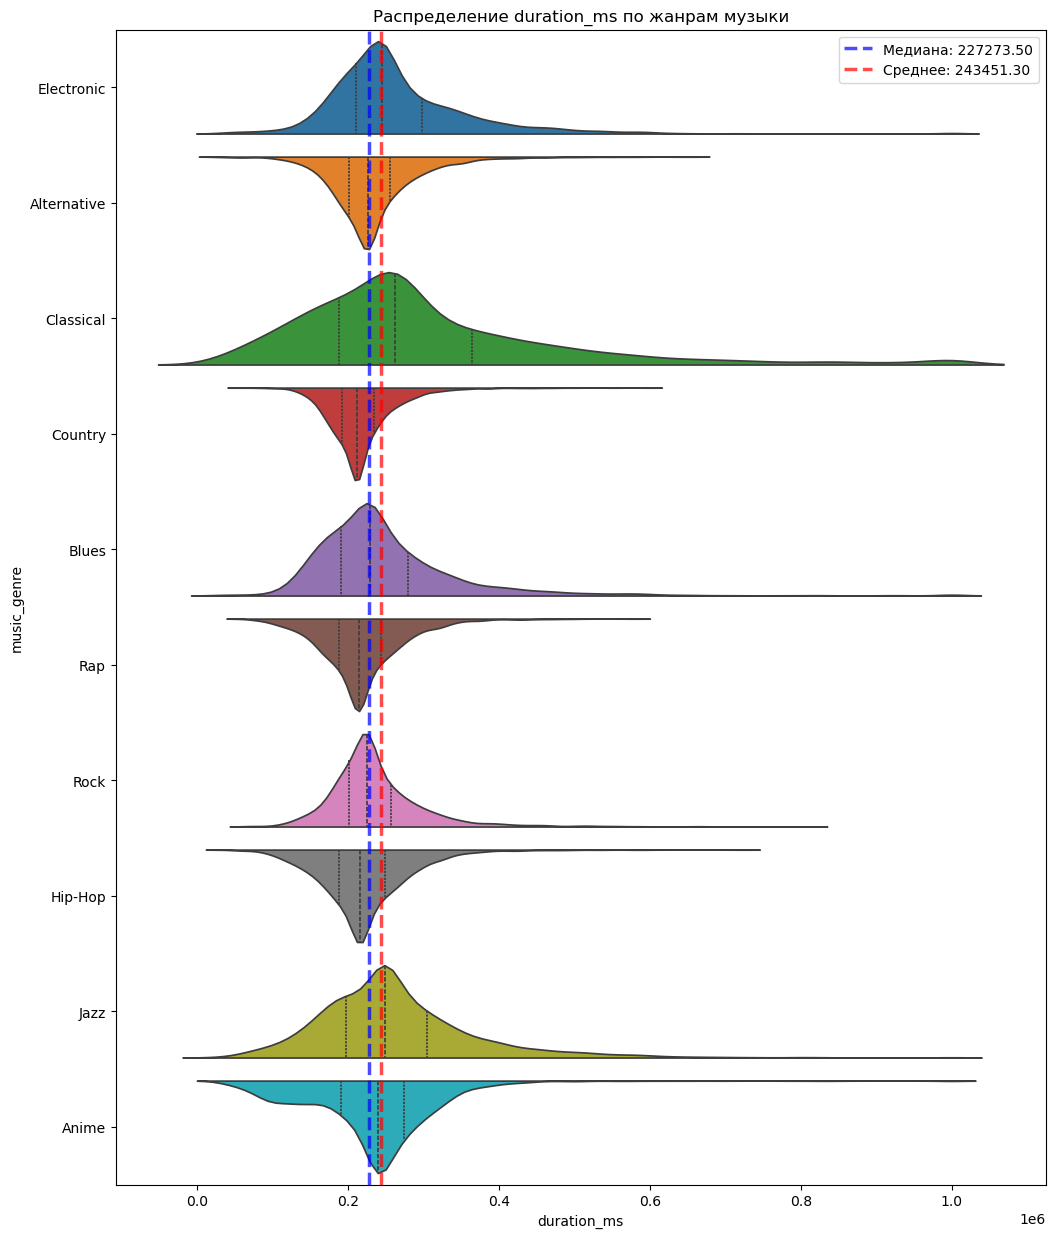

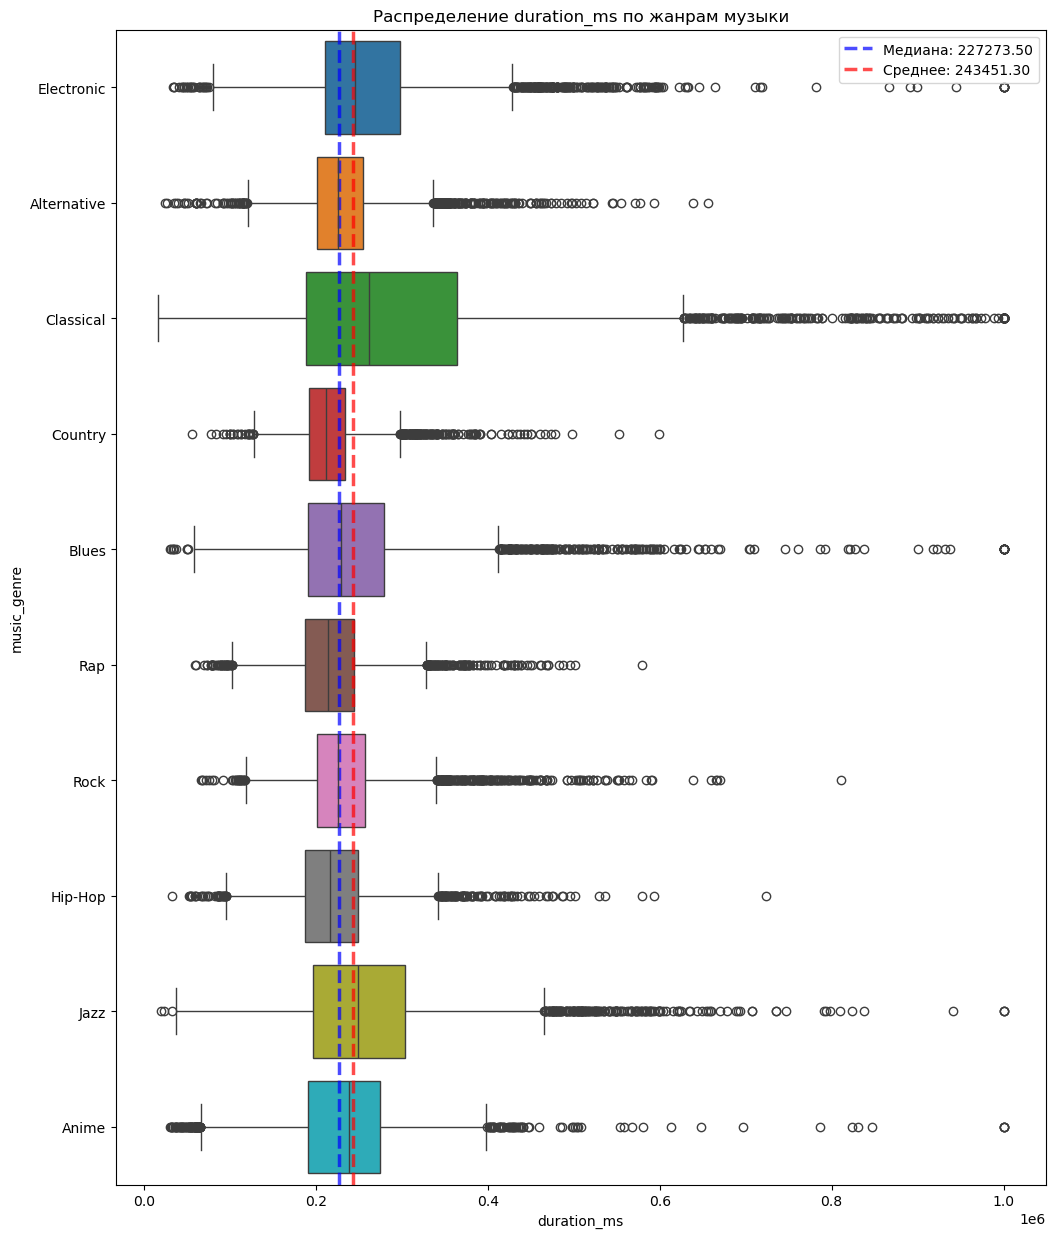

In [47]:
train.loc[train['duration_ms'] > 1000000, 'duration_ms'] = 1000000
descriptive_stats_and_plot(train, 'duration_ms')

### Столбец `energy` 

'Описательная статистика для energy:'

count  mean  std  min  25%  50%  75%  max
music_genre                                             
Alternative 3,939.00  0.71 0.21 0.05 0.56 0.75 0.89 1.00
Anime       4,003.00  0.66 0.30 0.00 0.41 0.77 0.93 1.00
Blues       3,987.00  0.61 0.23 0.01 0.44 0.63 0.80 1.00
Classical   4,019.00  0.18 0.23 0.00 0.04 0.10 0.21 0.99
Country     4,024.00  0.64 0.20 0.02 0.50 0.67 0.80 0.98
Electronic  4,051.00  0.74 0.19 0.02 0.61 0.78 0.90 1.00
Hip-Hop     3,935.00  0.65 0.15 0.10 0.54 0.65 0.76 0.99
Jazz        4,023.00  0.47 0.24 0.00 0.29 0.48 0.65 1.00
Rap         3,964.00  0.65 0.16 0.08 0.54 0.65 0.76 1.00
Rock        4,055.00  0.69 0.20 0.00 0.55 0.72 0.85 1.00

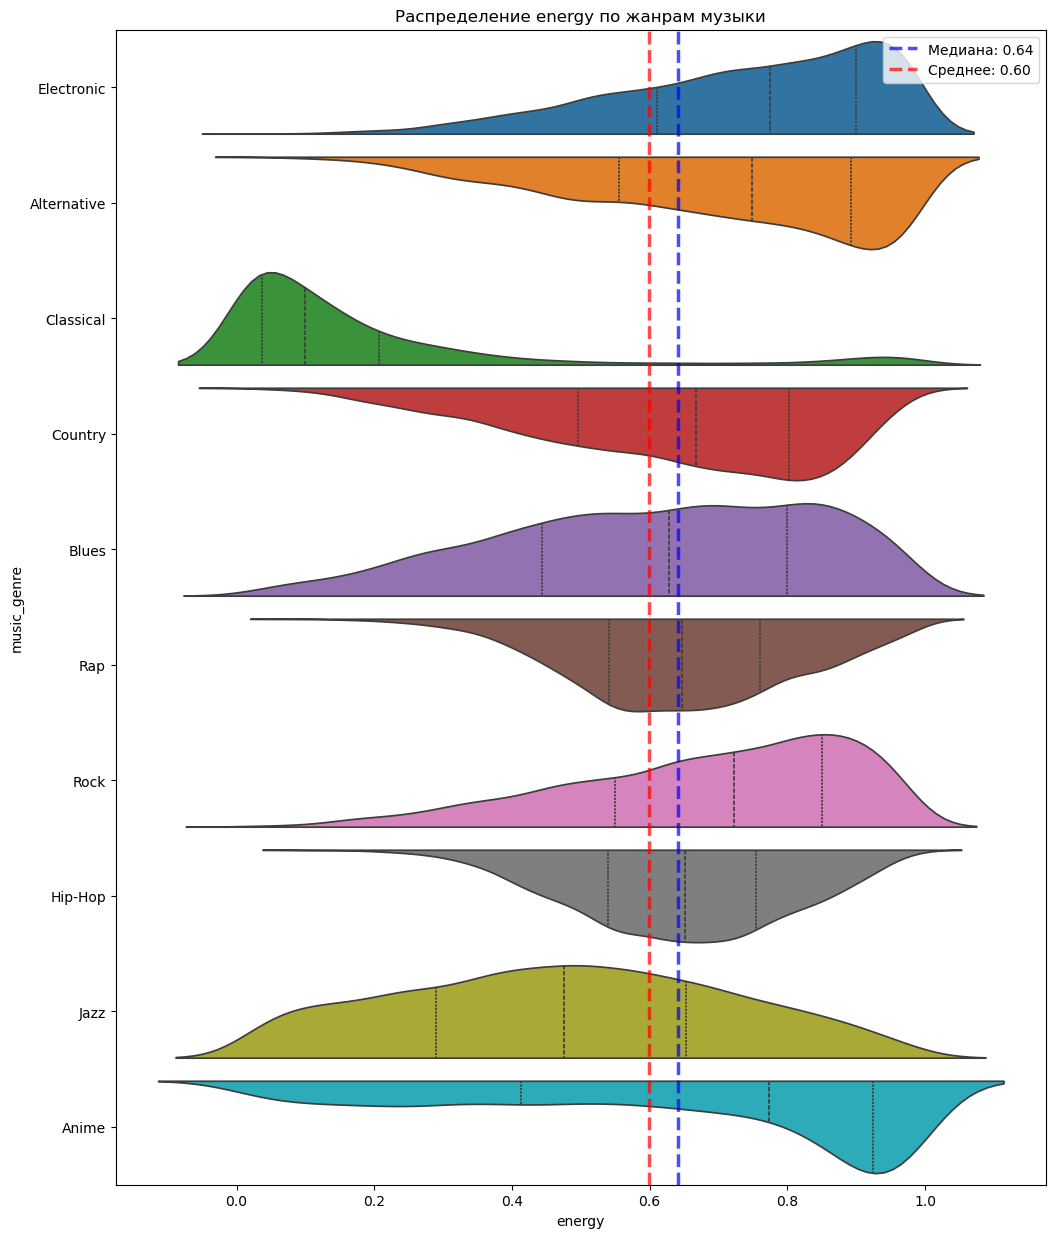

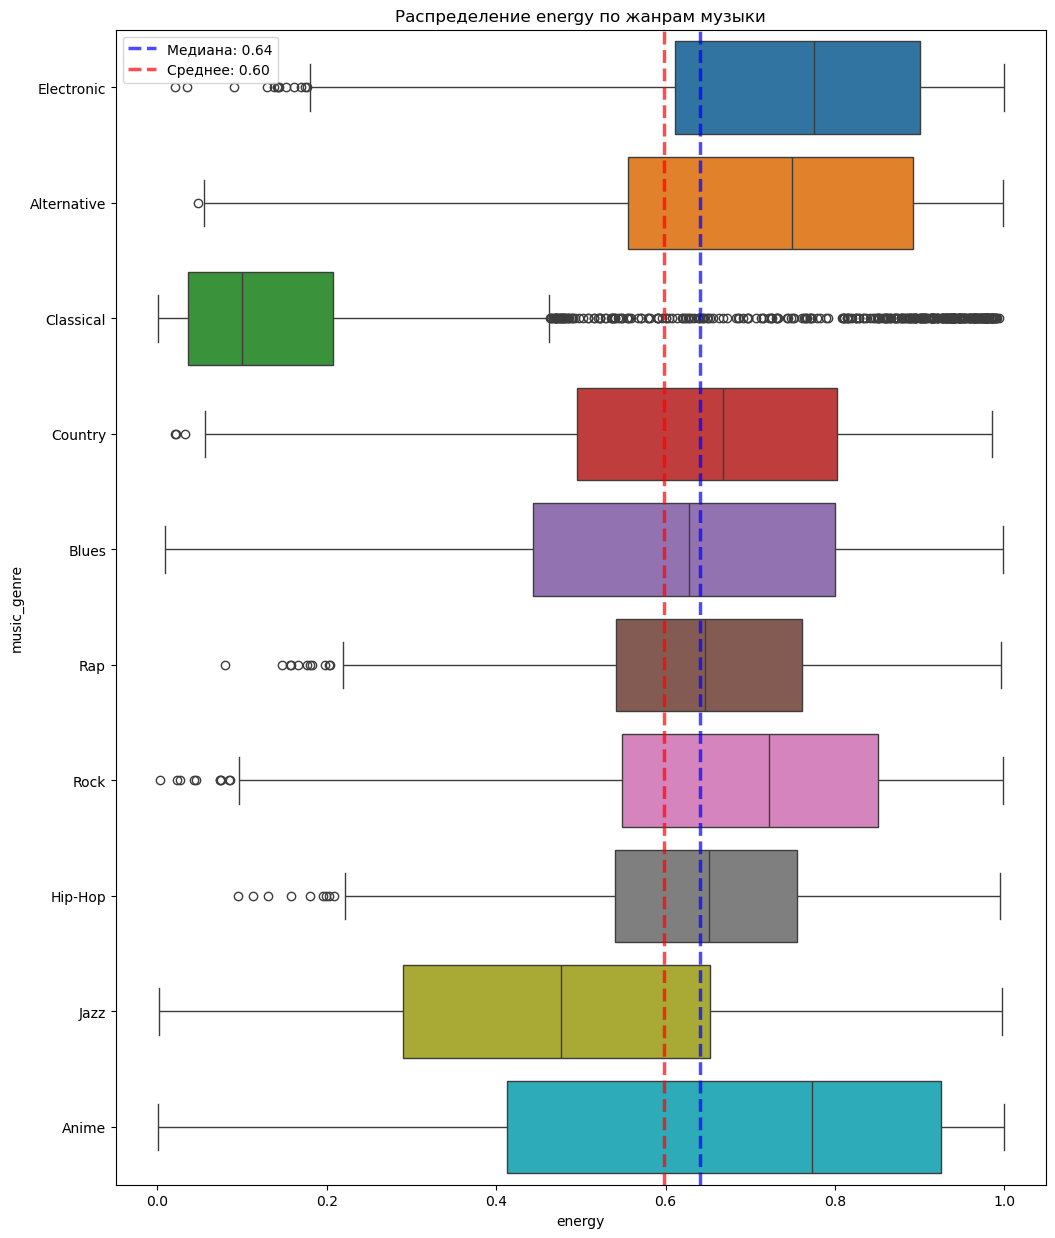

In [48]:
descriptive_stats_and_plot(train, 'energy')

* Аномалий в данных не обнаружено;
* Как всегда выделяется жанр **Classical** центр распределения смещено сильно влево отностельно средних значений;
* Видент тренд зависимости `energy` для каждого жанра музыки.

### Столбец `instrumentalness`

'Описательная статистика для instrumentalness:'

count  mean  std  min  25%  50%  75%  max
music_genre                                             
Alternative 3,939.00  0.06 0.17 0.00 0.00 0.00 0.01 0.94
Anime       4,003.00  0.28 0.39 0.00 0.00 0.00 0.78 0.99
Blues       3,987.00  0.09 0.21 0.00 0.00 0.00 0.03 0.97
Classical   4,019.00  0.60 0.38 0.00 0.15 0.83 0.91 0.99
Country     4,024.00  0.01 0.04 0.00 0.00 0.00 0.00 0.78
Electronic  4,051.00  0.35 0.36 0.00 0.00 0.19 0.75 0.99
Hip-Hop     3,935.00  0.01 0.07 0.00 0.00 0.00 0.00 0.93
Jazz        4,023.00  0.35 0.38 0.00 0.00 0.12 0.80 0.98
Rap         3,964.00  0.01 0.06 0.00 0.00 0.00 0.00 0.92
Rock        4,055.00  0.05 0.17 0.00 0.00 0.00 0.00 0.97

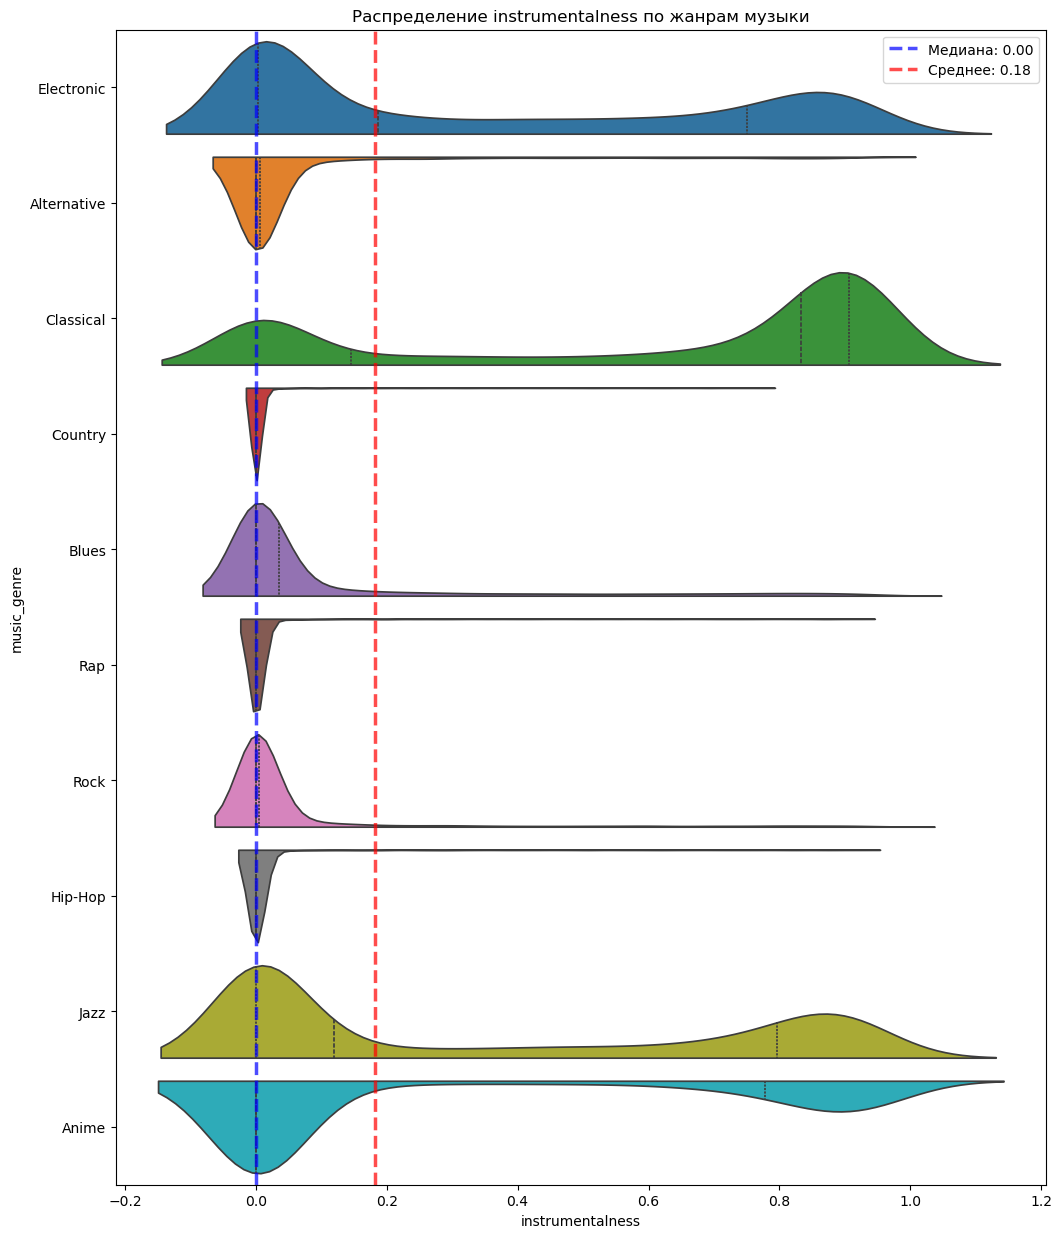

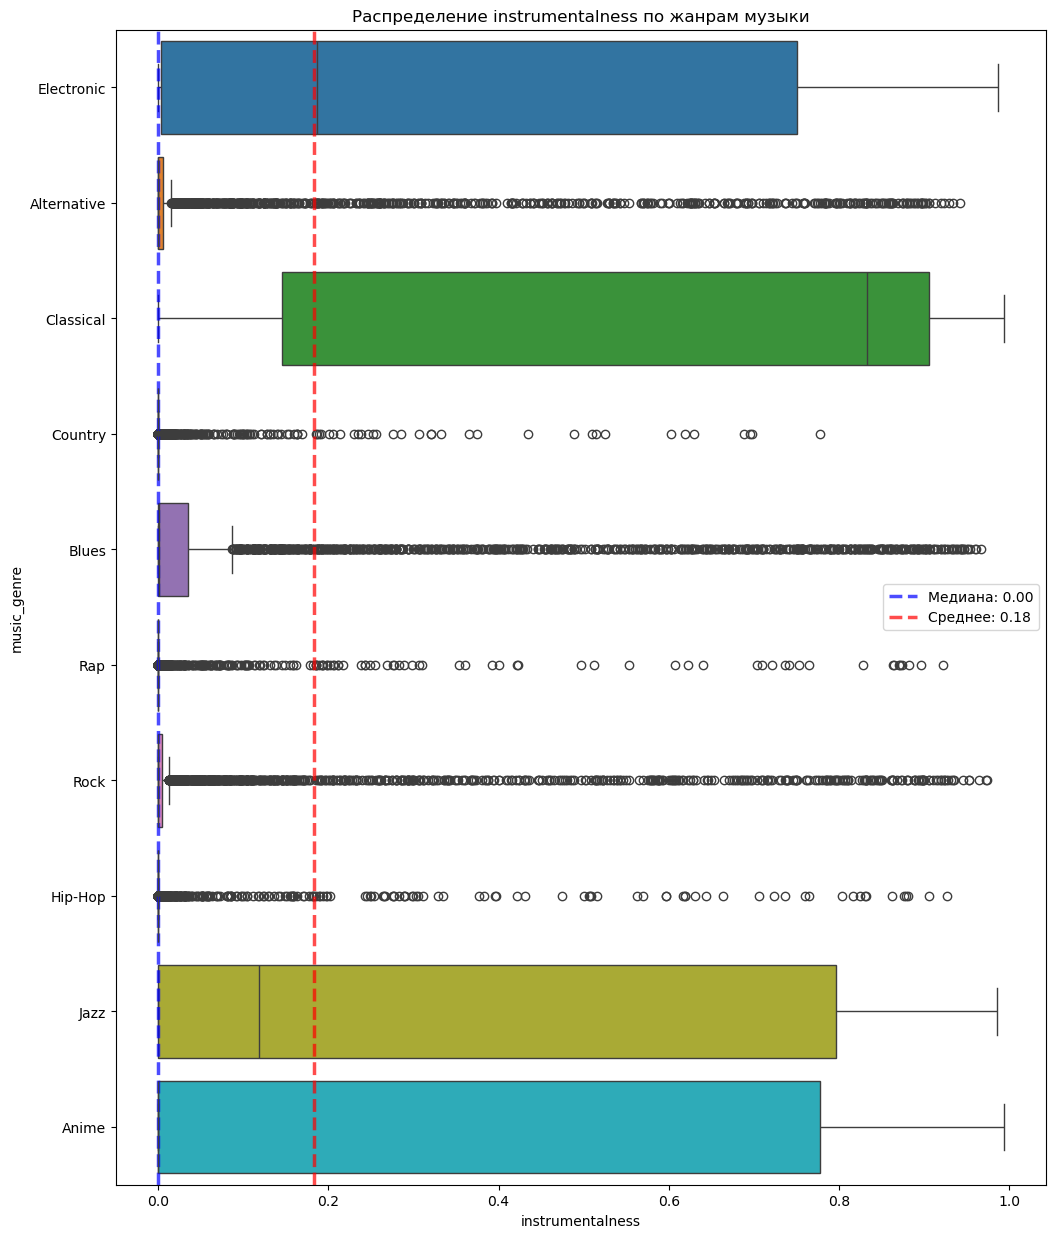

In [49]:
descriptive_stats_and_plot(train, 'instrumentalness')

* Выделяются значительно некоторые классы.
* Возможно на основе этой категории получится создать синтетический признак.

In [50]:
# Создание нового синтетического признака
# Например, сочетание энергии трека и его громкости, которое может отражать общую "силу" трека
# train['energy_loudness'] = train['energy'] * train['loudness']

# Проверка результата
# train[['energy', 'loudness', 'energy_loudness']].head()

In [51]:
# Избавляемся от лишних строк при помощи процентилей
# upper_lim = train['column'].quantile(.95)
# lower_lim = train['column'].quantile(.05)
# train = train[(train['column'] < upper_lim) & (train['column'] > lower_lim)]

### Столбец key 

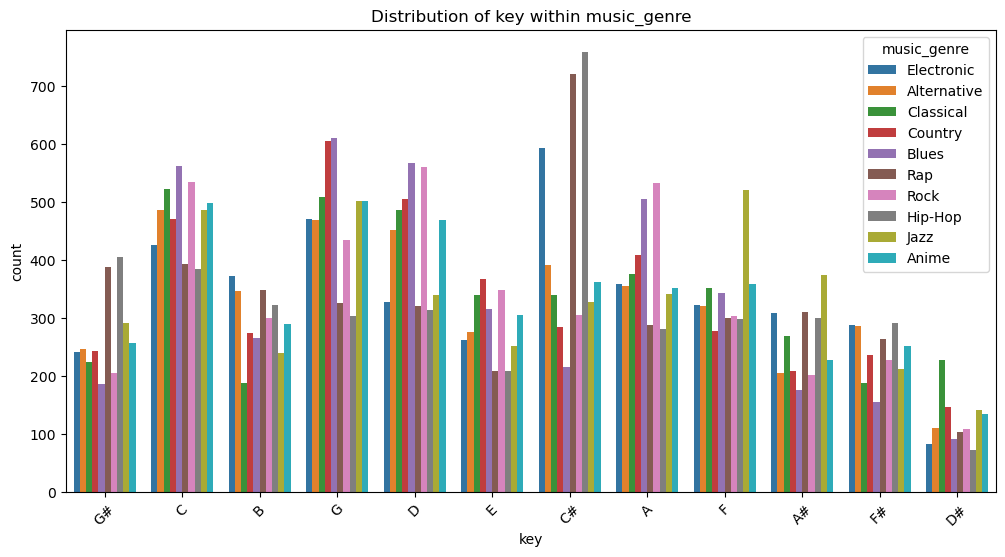

key            A   A#    B    C   C#    D   D#    E    F   F#    G   G#
music_genre                                                            
Alternative 0.09 0.05 0.09 0.12 0.10 0.11 0.03 0.07 0.08 0.07 0.12 0.06
Anime       0.09 0.06 0.07 0.12 0.09 0.12 0.03 0.08 0.09 0.06 0.13 0.06
Blues       0.13 0.04 0.07 0.14 0.05 0.14 0.02 0.08 0.09 0.04 0.15 0.05
Classical   0.09 0.07 0.05 0.13 0.08 0.12 0.06 0.08 0.09 0.05 0.13 0.06
Country     0.10 0.05 0.07 0.12 0.07 0.13 0.04 0.09 0.07 0.06 0.15 0.06
Electronic  0.09 0.08 0.09 0.10 0.15 0.08 0.02 0.06 0.08 0.07 0.12 0.06
Hip-Hop     0.07 0.08 0.08 0.10 0.19 0.08 0.02 0.05 0.08 0.07 0.08 0.10
Jazz        0.08 0.09 0.06 0.12 0.08 0.08 0.04 0.06 0.13 0.05 0.12 0.07
Rap         0.07 0.08 0.09 0.10 0.18 0.08 0.03 0.05 0.08 0.07 0.08 0.10
Rock        0.13 0.05 0.07 0.13 0.08 0.14 0.03 0.09 0.07 0.06 0.11 0.05


In [52]:
stats = categorical_analysis(train, 'key')
print(stats)

### Столбец liveness

'Описательная статистика для liveness:'

count  mean  std  min  25%  50%  75%  max
music_genre                                             
Alternative 3,939.00  0.20 0.16 0.02 0.10 0.13 0.26 1.00
Anime       4,003.00  0.19 0.14 0.02 0.10 0.14 0.28 0.97
Blues       3,987.00  0.23 0.22 0.01 0.10 0.14 0.28 1.00
Classical   4,019.00  0.16 0.14 0.02 0.09 0.11 0.16 0.99
Country     4,024.00  0.19 0.15 0.02 0.10 0.13 0.23 0.99
Electronic  4,051.00  0.21 0.18 0.02 0.10 0.13 0.28 0.98
Hip-Hop     3,935.00  0.20 0.15 0.02 0.10 0.14 0.27 0.99
Jazz        4,023.00  0.17 0.15 0.02 0.09 0.12 0.18 0.98
Rap         3,964.00  0.20 0.15 0.02 0.10 0.13 0.25 0.99
Rock        4,055.00  0.19 0.15 0.02 0.09 0.13 0.24 0.98

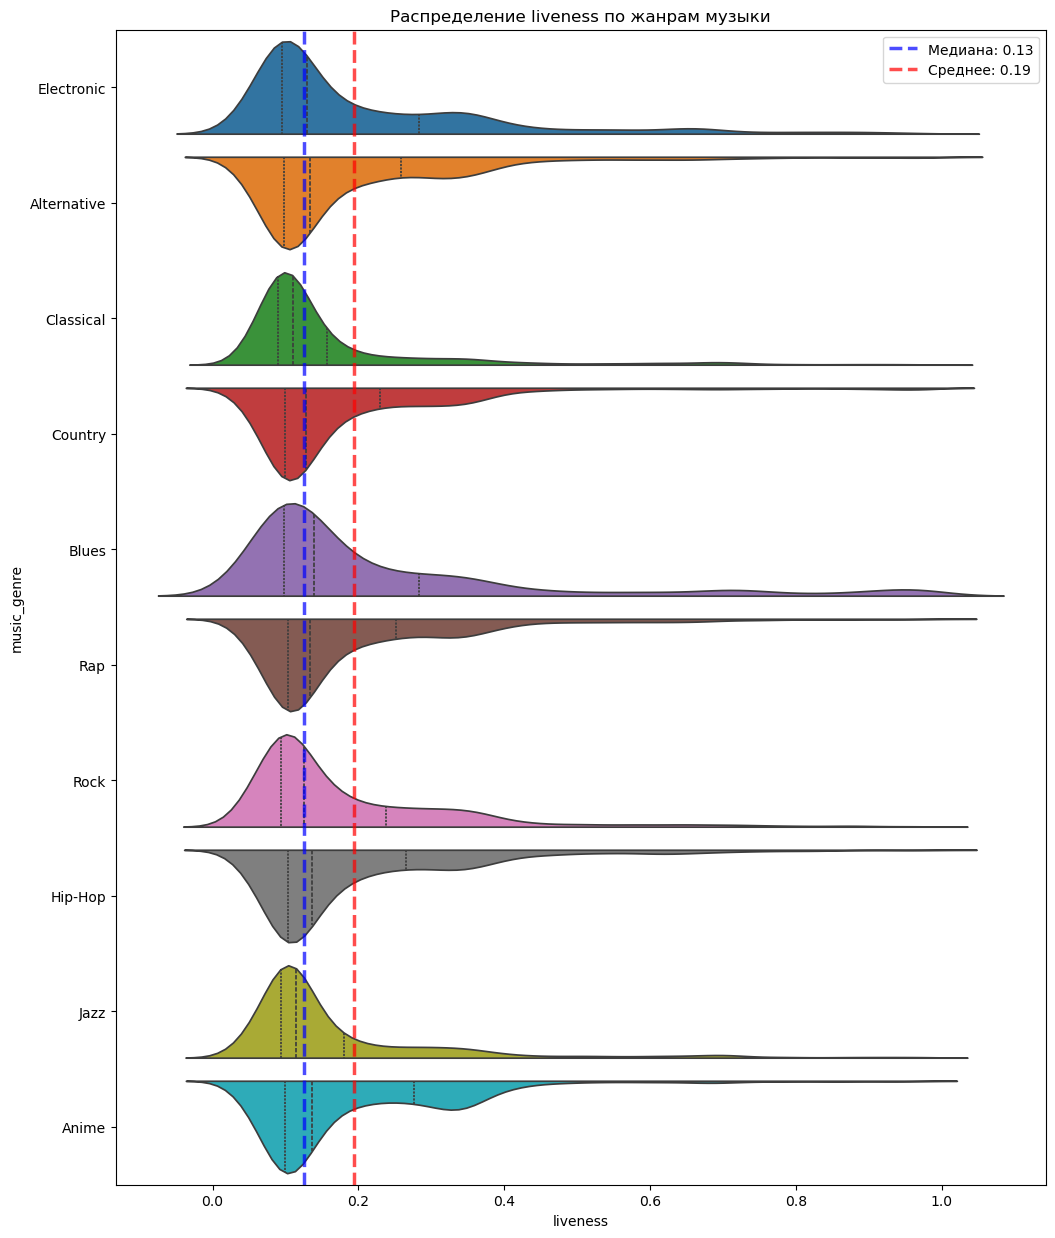

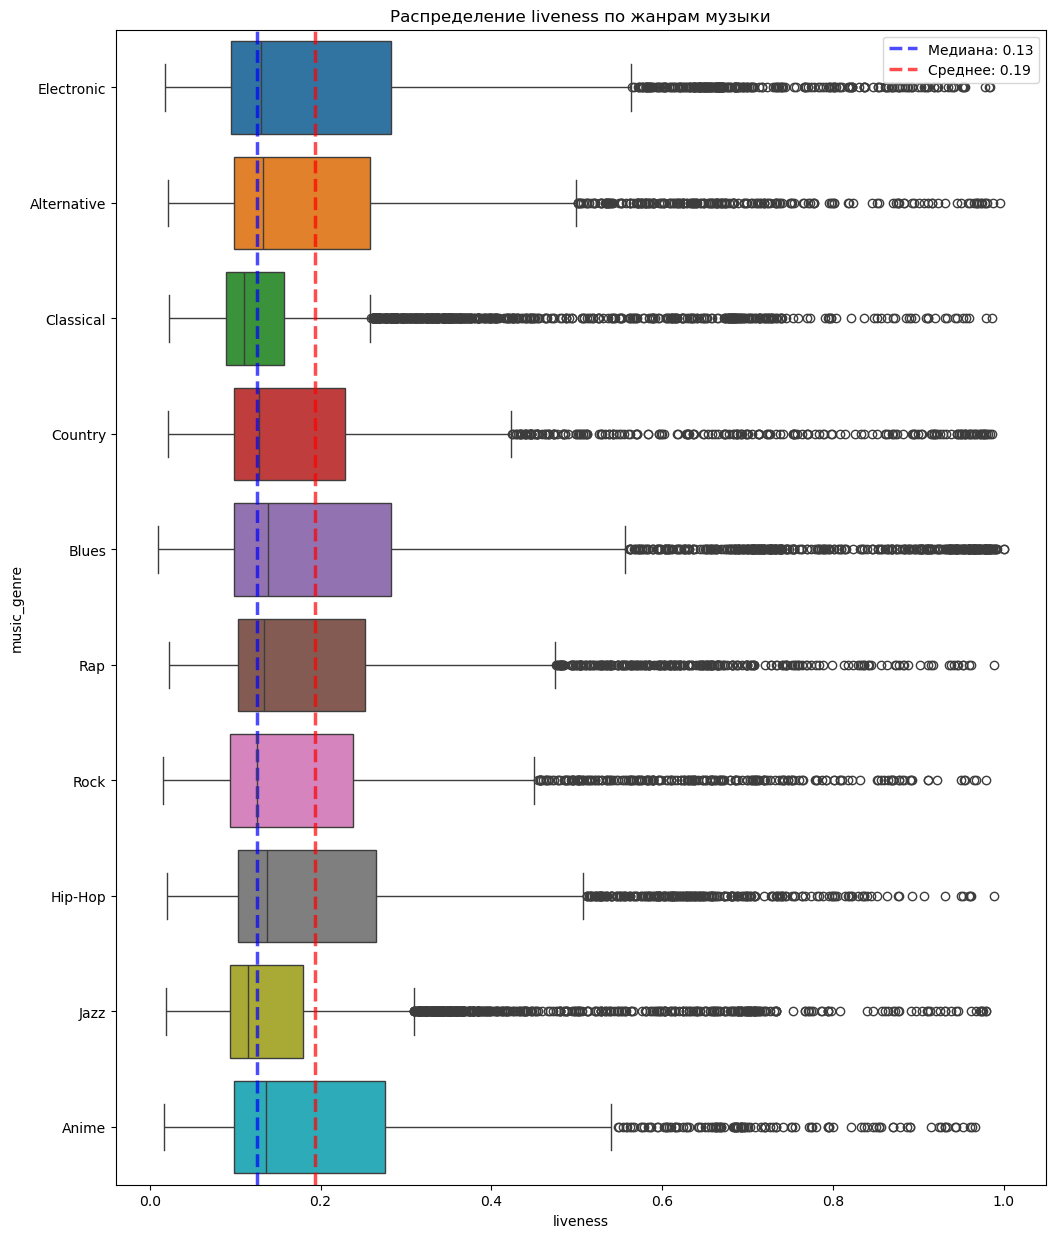

In [53]:
descriptive_stats_and_plot(train, 'liveness')

### Столбец loudness (#section3_6)

'Описательная статистика для loudness:'

count   mean   std     min    25%    50%    75%   max
music_genre                                                         
Alternative 3,939.00  -9.02 13.26  -85.65  -8.34  -6.10  -4.54  1.34
Anime       4,003.00 -10.15 13.48 -102.73 -11.54  -5.88  -3.69  1.61
Blues       3,987.00 -12.05 14.80  -89.55 -11.94  -8.69  -6.24  3.74
Classical   4,019.00 -24.06 15.10 -110.95 -27.06 -22.32 -17.43 -2.35
Country     4,024.00  -9.80 13.24  -86.84  -9.30  -6.64  -5.10 -0.52
Electronic  4,051.00  -9.26 12.86  -88.17  -9.60  -6.58  -4.44  1.58
Hip-Hop     3,935.00  -9.62 13.91  -85.39  -8.43  -6.63  -5.22  1.01
Jazz        4,023.00 -13.68 13.76  -96.64 -14.07 -10.53  -7.95 -1.69
Rap         3,964.00  -9.22 13.25  -84.25  -8.26  -6.48  -5.13 -0.80
Rock        4,055.00  -9.87 13.69  -88.68  -9.45  -6.63  -4.91 -0.76

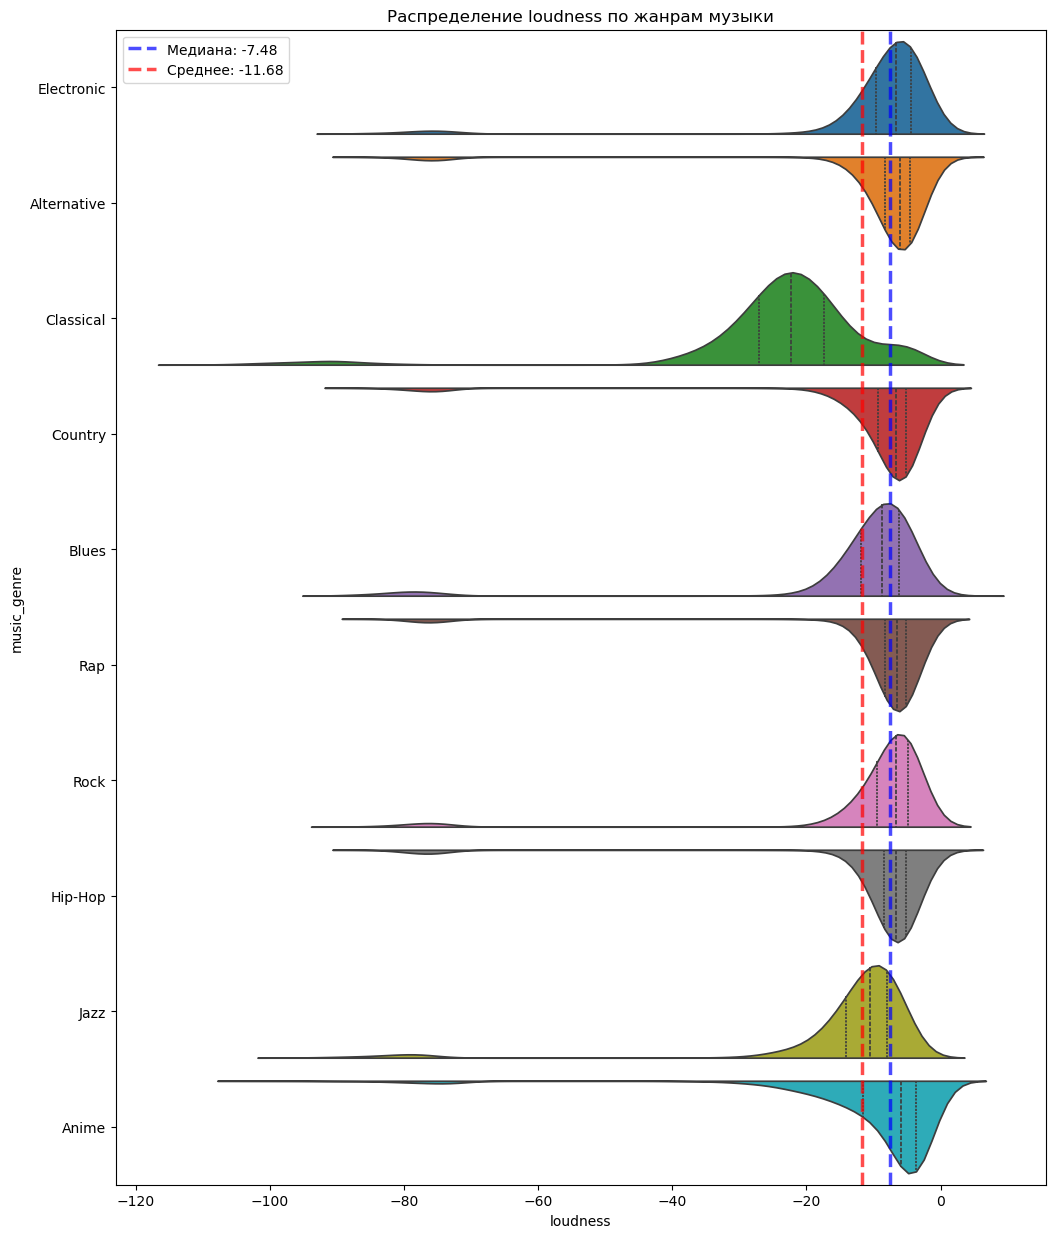

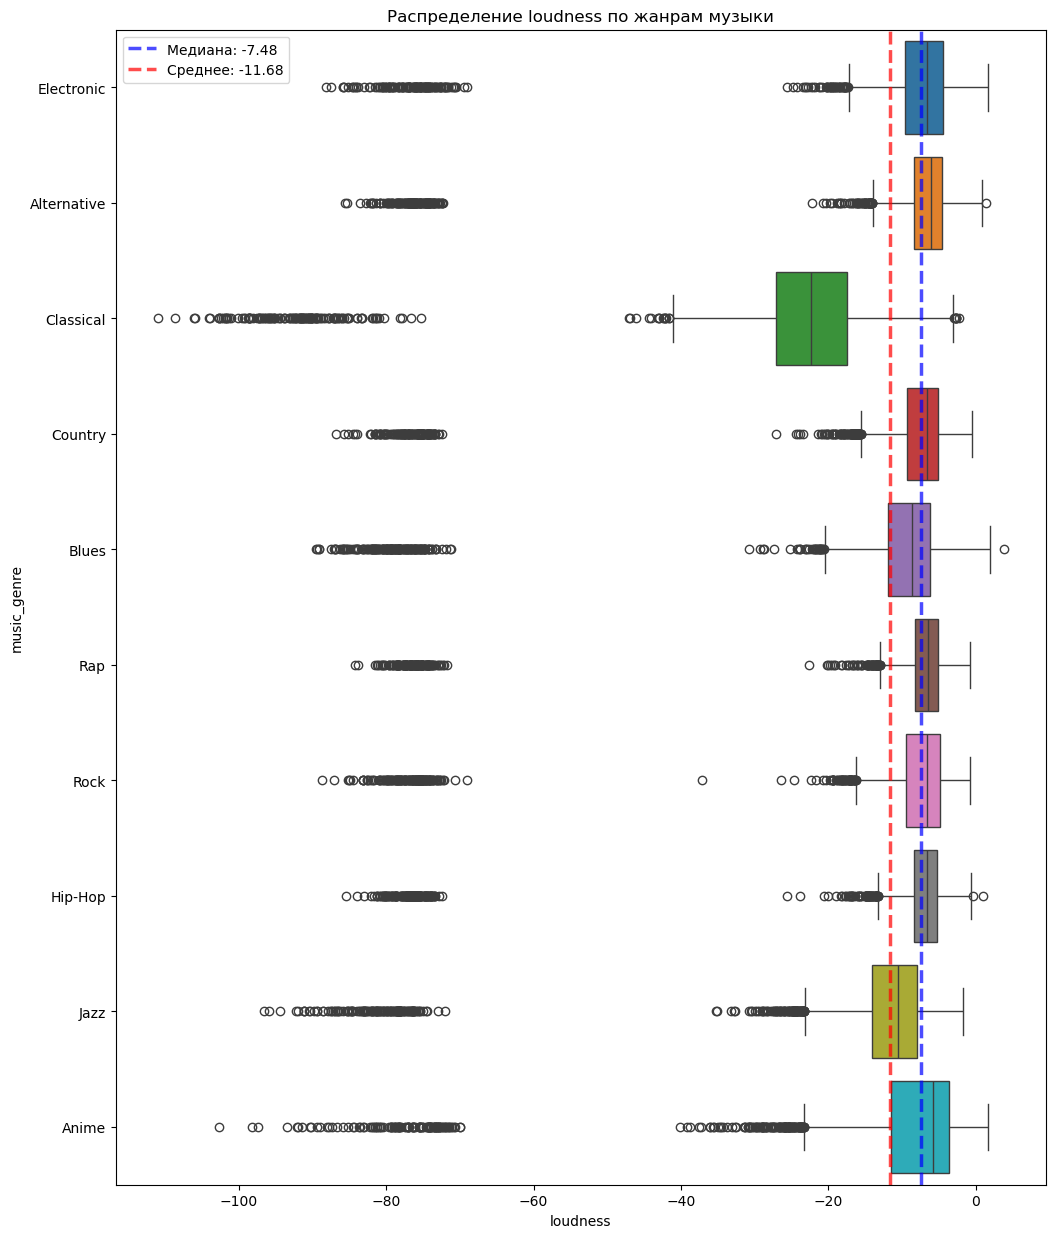

In [54]:
descriptive_stats_and_plot(train, 'loudness')

### Столбец `mode`

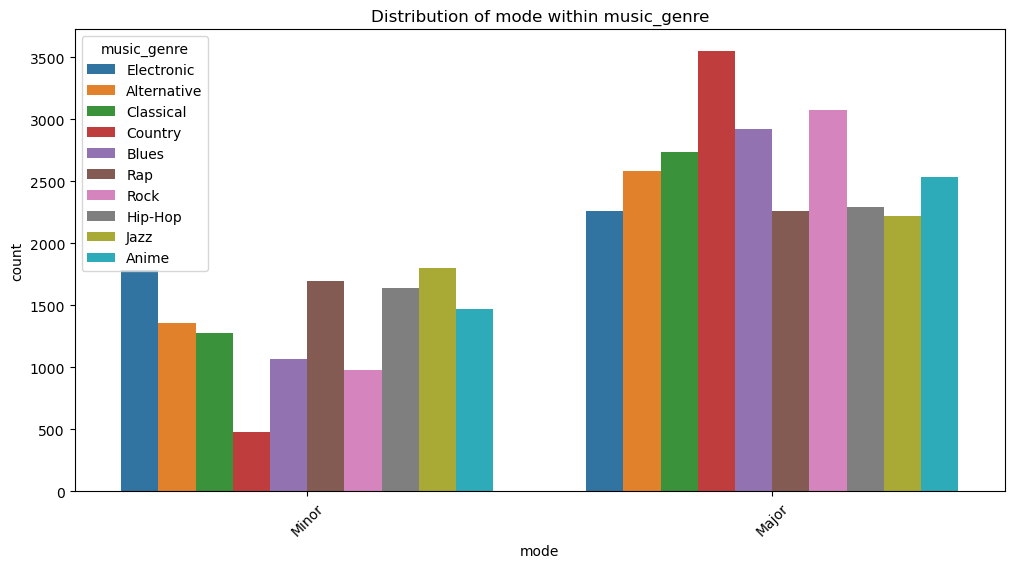

mode         Major  Minor
music_genre              
Alternative   0.66   0.34
Anime         0.63   0.37
Blues         0.73   0.27
Classical     0.68   0.32
Country       0.88   0.12
Electronic    0.56   0.44
Hip-Hop       0.58   0.42
Jazz          0.55   0.45
Rap           0.57   0.43
Rock          0.76   0.24


In [55]:
# Пример использования функции
stats = categorical_analysis(train, 'mode')
print(stats)

* Есть зависимость распределения `mode` от жанра музыки

### Столбец speechiness (#section3_7)


'Описательная статистика для speechiness:'

count  mean  std  min  25%  50%  75%  max
music_genre                                             
Alternative 3,939.00  0.12 0.20 0.02 0.04 0.05 0.10 1.46
Anime       4,003.00  0.10 0.19 0.02 0.04 0.05 0.07 1.32
Blues       3,987.00  0.10 0.19 0.02 0.03 0.04 0.07 1.39
Classical   4,019.00  0.09 0.19 0.02 0.04 0.04 0.05 1.34
Country     4,024.00  0.08 0.19 0.02 0.03 0.04 0.05 1.42
Electronic  4,051.00  0.14 0.21 0.02 0.04 0.06 0.13 1.53
Hip-Hop     3,935.00  0.25 0.24 0.03 0.09 0.20 0.32 1.82
Jazz        4,023.00  0.11 0.21 0.02 0.04 0.04 0.08 1.46
Rap         3,964.00  0.22 0.23 0.02 0.07 0.17 0.29 1.79
Rock        4,055.00  0.09 0.20 0.02 0.03 0.04 0.06 1.44

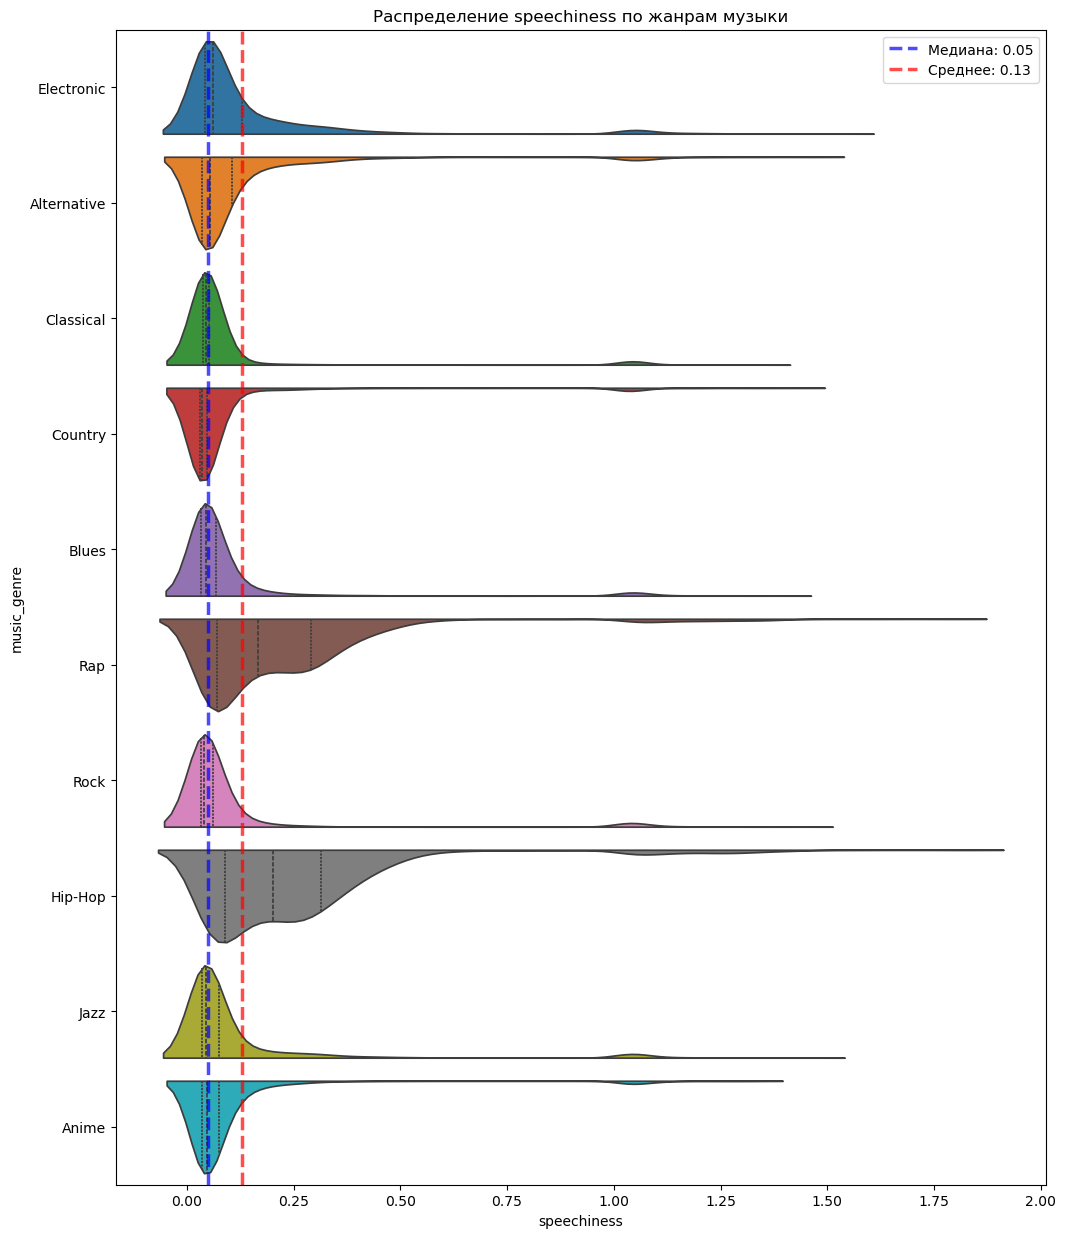

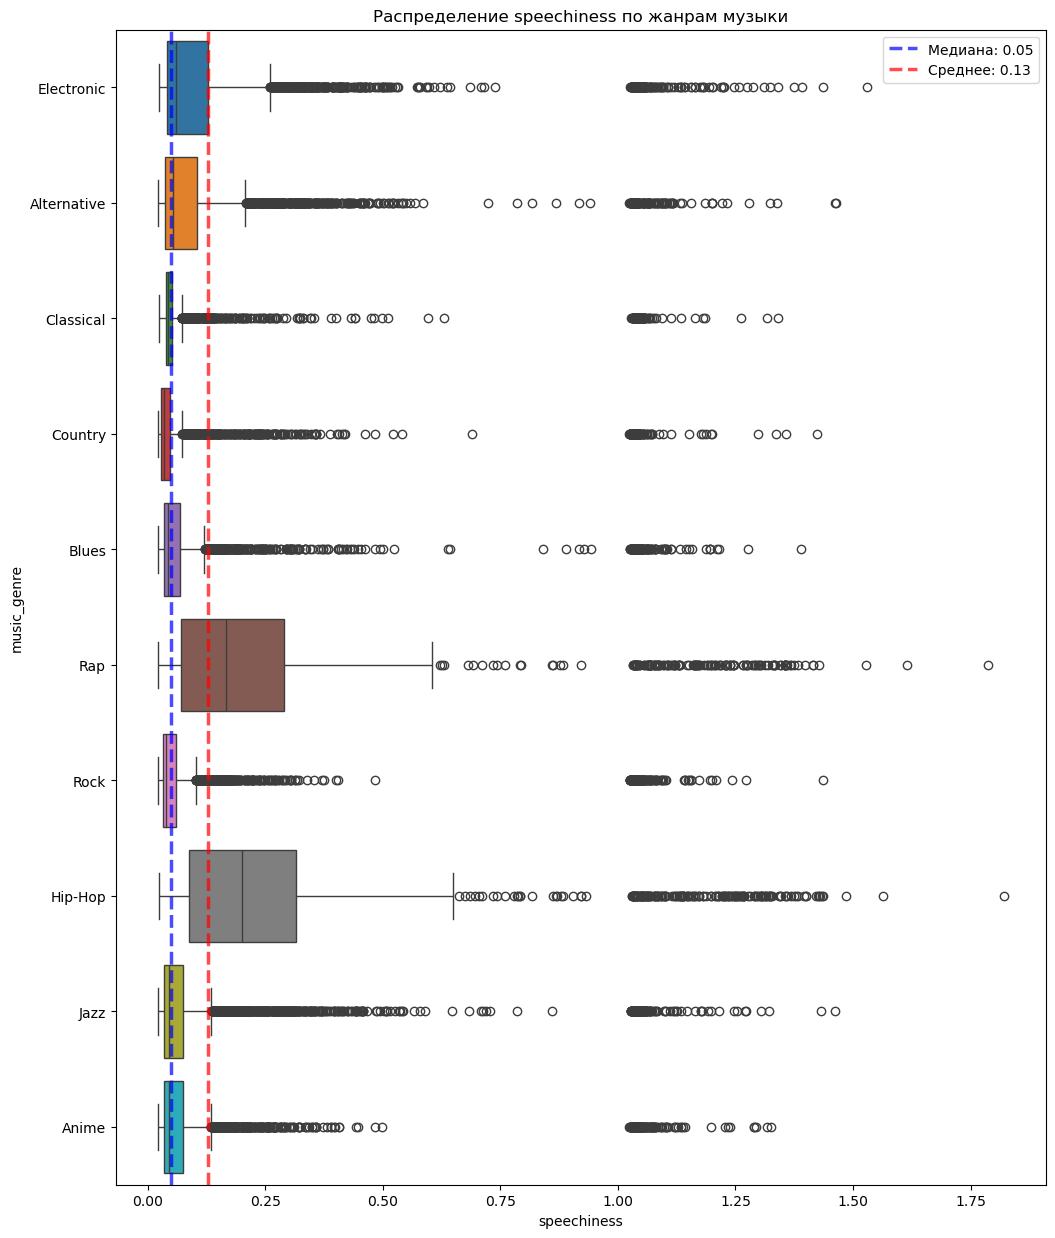

In [56]:
descriptive_stats_and_plot(train, 'speechiness')

'Описательная статистика для speechiness:'

count  mean  std  min  25%  50%  75%  max
music_genre                                             
Alternative   318.00  0.68 0.35 0.30 0.34 0.47 1.04 1.46
Anime         162.00  0.93 0.29 0.30 1.03 1.04 1.07 1.32
Blues         190.00  0.88 0.30 0.30 0.55 1.03 1.05 1.39
Classical     163.00  0.97 0.22 0.32 1.04 1.04 1.05 1.34
Country       161.00  0.93 0.27 0.30 1.03 1.03 1.04 1.42
Electronic    393.00  0.65 0.35 0.30 0.35 0.45 1.05 1.53
Hip-Hop     1,104.00  0.52 0.30 0.30 0.34 0.39 0.49 1.82
Jazz          286.00  0.76 0.34 0.30 0.37 1.03 1.05 1.46
Rap           916.00  0.51 0.30 0.30 0.33 0.38 0.48 1.79
Rock          175.00  1.00 0.21 0.30 1.03 1.04 1.06 1.44

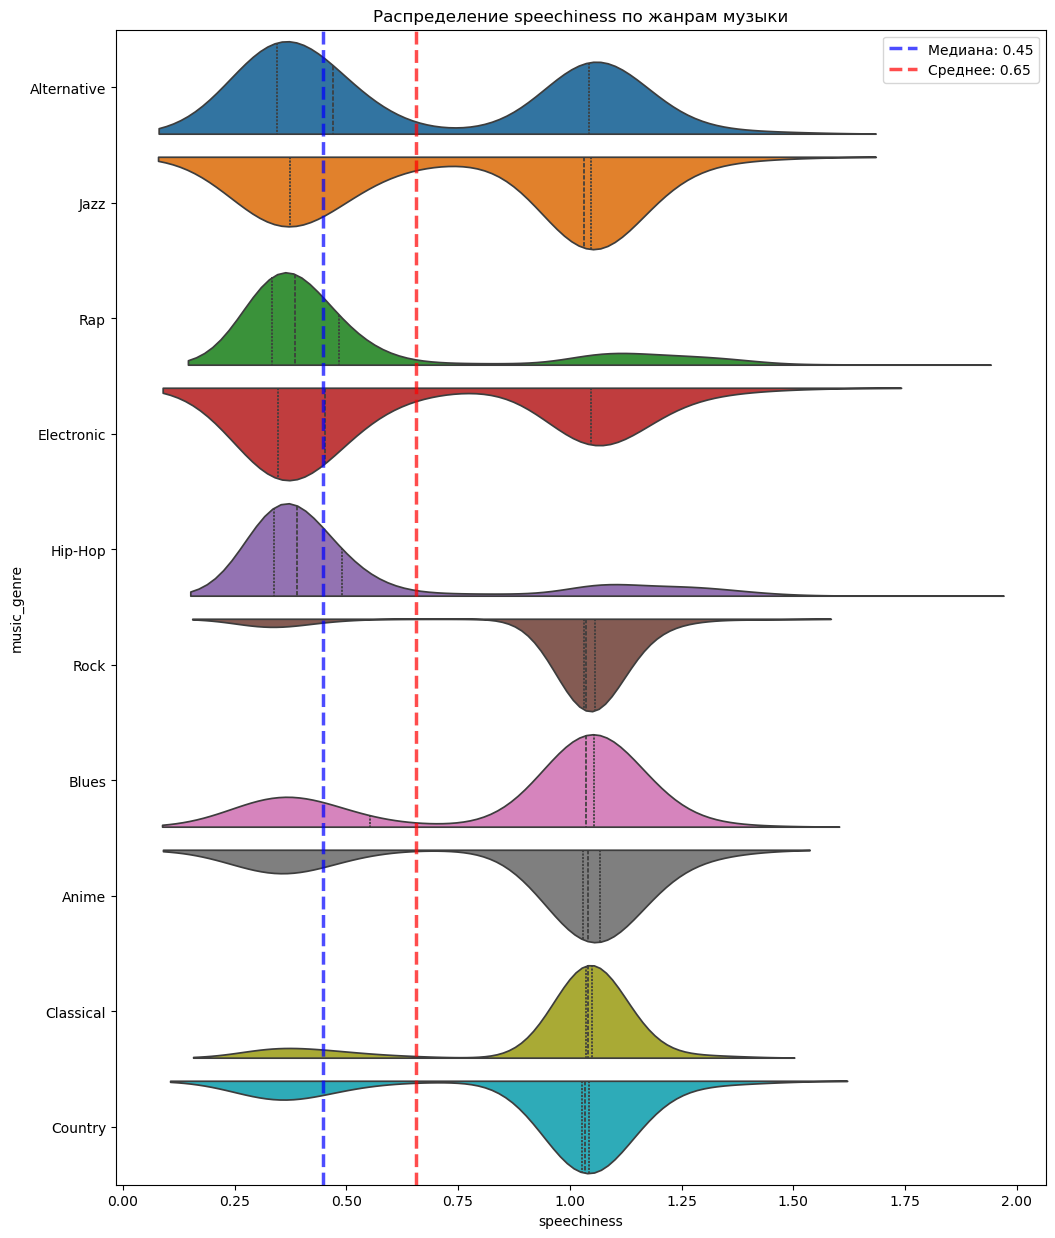

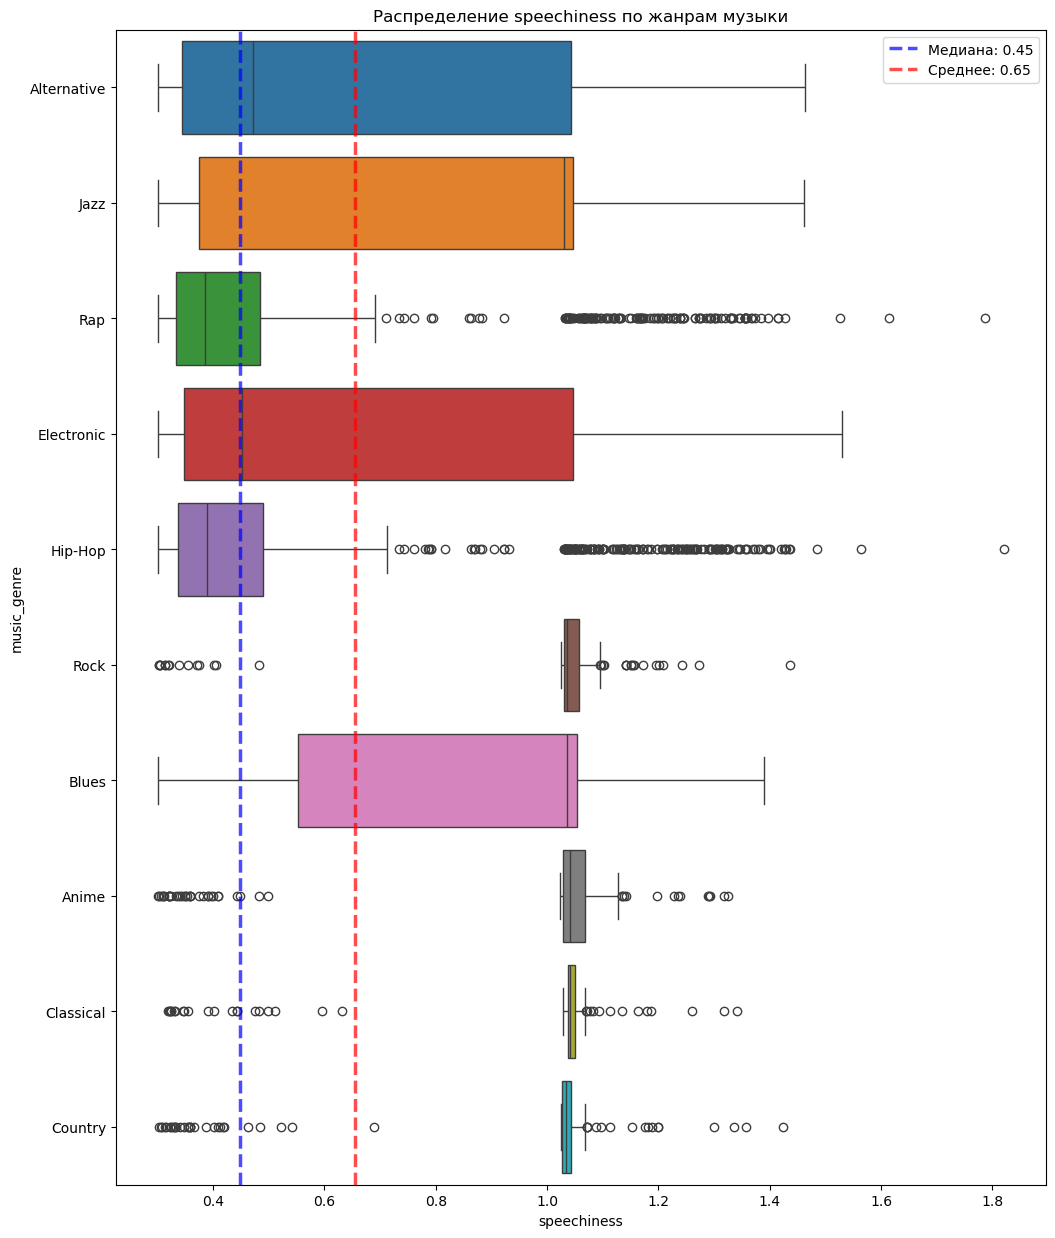

In [57]:
descriptive_stats_and_plot(train.loc[train['speechiness'] > 0.3], 'speechiness')

### Столбец `tempo`

In [58]:
train = replace_question_marks_with_random(train, 'tempo')

train['tempo'].isnull().sum()

0

'Описательная статистика для tempo:'

count   mean   std   min    25%    50%    75%    max
music_genre                                                        
Alternative 3,939.00 122.67 28.88 44.19  99.93 120.30 141.96 213.79
Anime       4,003.00 125.94 31.77 48.01 100.15 126.00 146.75 215.36
Blues       3,987.00 121.07 29.10 47.59  99.37 118.70 138.14 215.92
Classical   4,019.00 103.45 29.43 34.35  80.26  97.25 123.65 212.92
Country     4,024.00 123.83 28.73 55.51 102.60 123.23 143.66 217.54
Electronic  4,051.00 126.00 25.30 35.55 110.00 126.01 142.09 220.04
Hip-Hop     3,935.00 119.98 28.63 47.81  95.27 120.07 140.02 213.79
Jazz        4,023.00 111.41 28.26 34.77  91.01 105.78 125.56 207.02
Rap         3,964.00 120.42 27.99 47.81  96.36 120.08 140.00 207.99
Rock        4,055.00 122.50 27.98 37.11 100.95 121.03 140.07 219.33

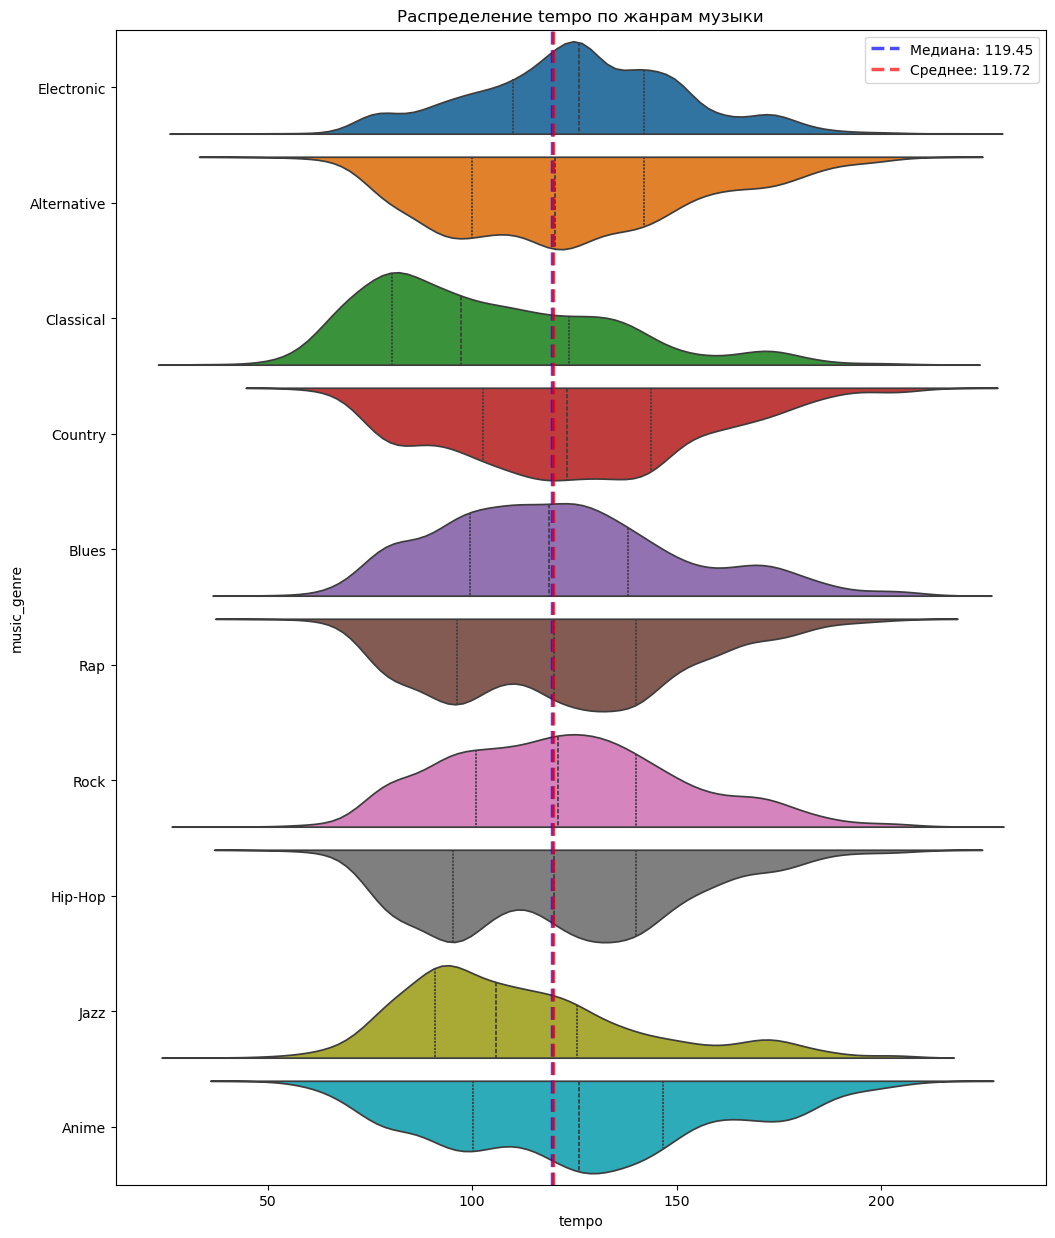

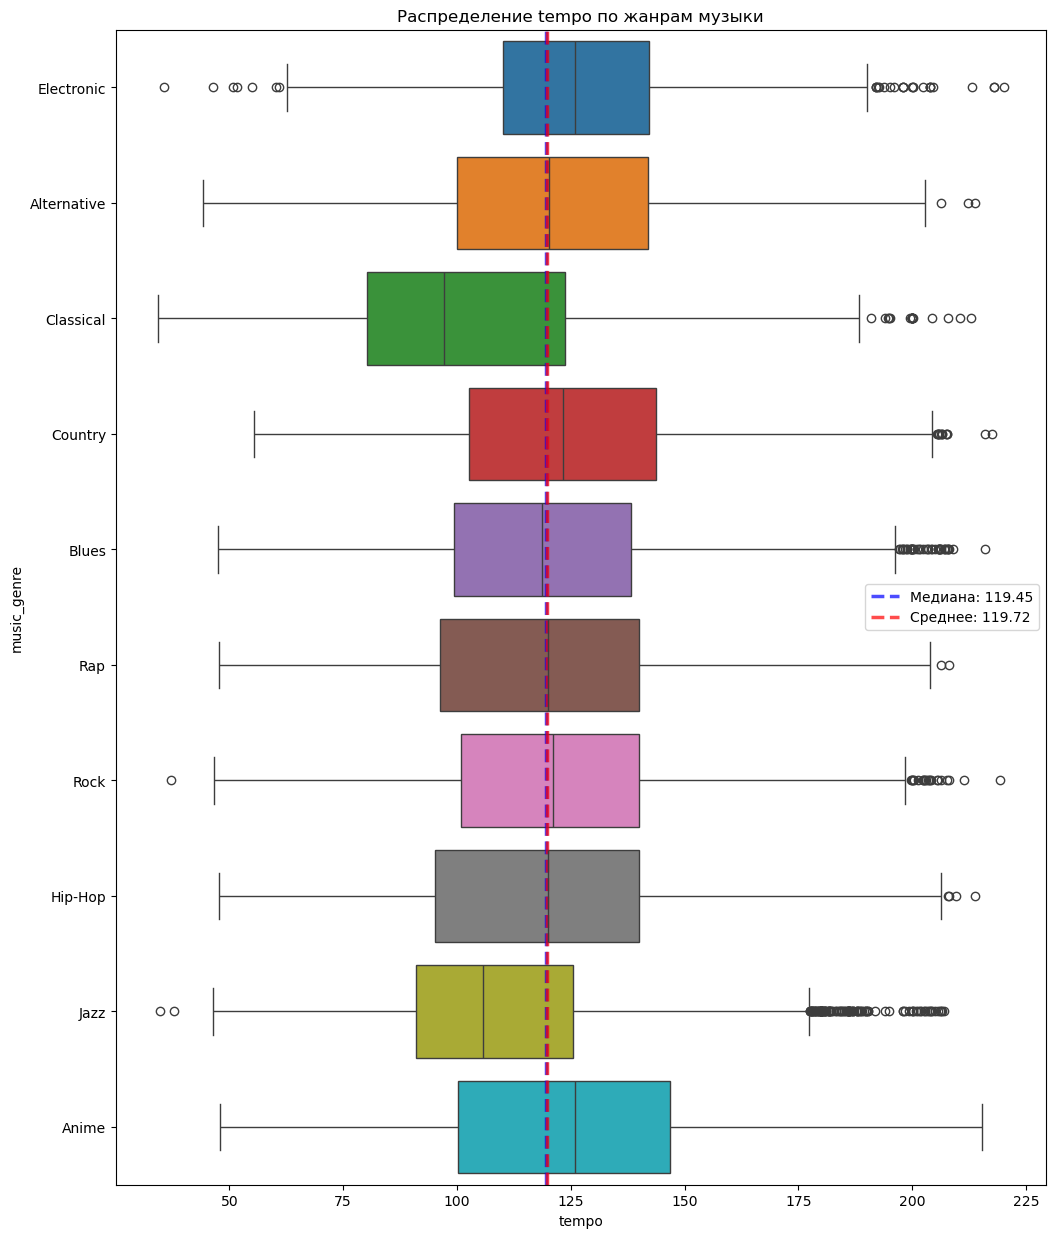

In [59]:
descriptive_stats_and_plot(train, 'tempo')

### Столбец `valence`

'Описательная статистика для valence:'

count  mean  std  min  25%  50%  75%  max
music_genre                                             
Alternative 3,939.00  0.45 0.22 0.03 0.28 0.43 0.60 0.98
Anime       4,003.00  0.43 0.25 0.00 0.23 0.44 0.62 0.99
Blues       3,987.00  0.58 0.22 0.03 0.41 0.59 0.76 0.98
Classical   4,019.00  0.21 0.20 0.00 0.06 0.14 0.31 0.98
Country     4,024.00  0.54 0.22 0.04 0.36 0.53 0.72 0.98
Electronic  4,051.00  0.39 0.24 0.03 0.19 0.36 0.56 0.99
Hip-Hop     3,935.00  0.47 0.22 0.04 0.30 0.47 0.64 0.98
Jazz        4,023.00  0.51 0.25 0.03 0.30 0.51 0.71 0.98
Rap         3,964.00  0.45 0.21 0.03 0.29 0.44 0.61 0.97
Rock        4,055.00  0.52 0.23 0.03 0.34 0.52 0.70 0.98

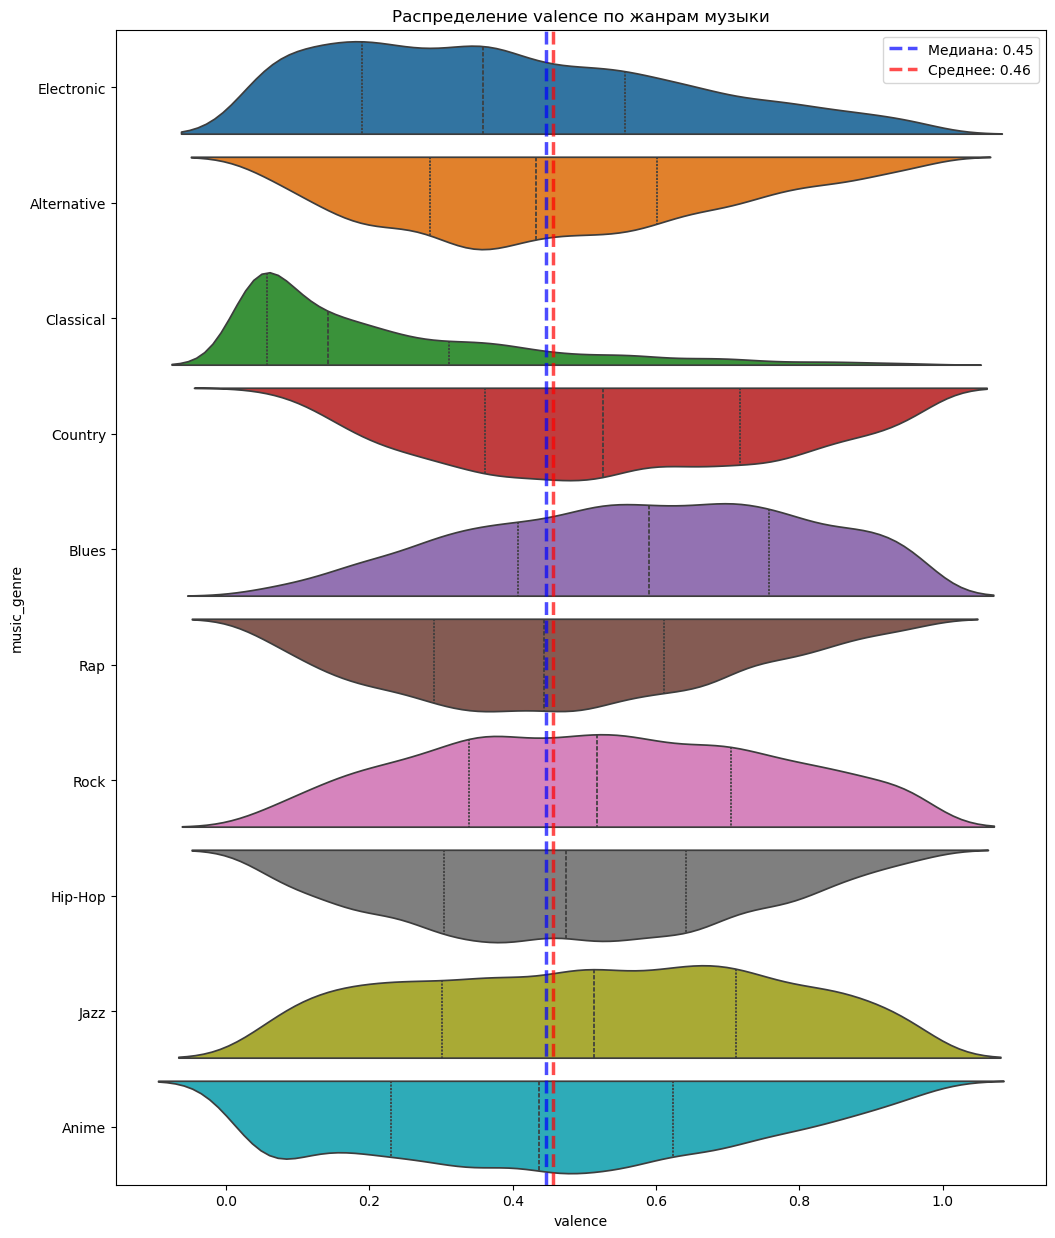

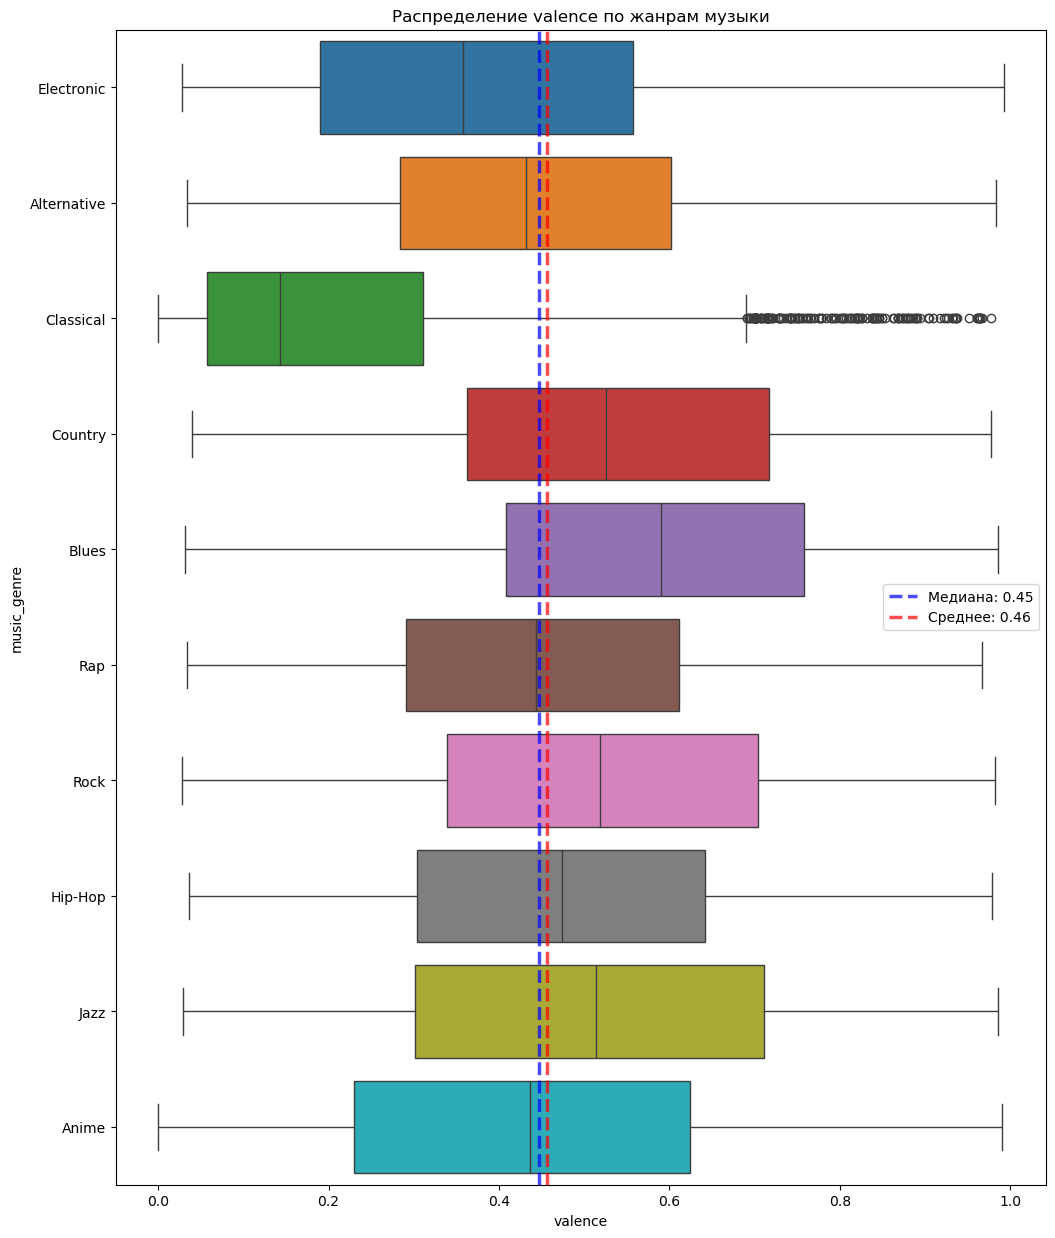

In [60]:
descriptive_stats_and_plot(train, 'valence')

1. popularity - заполнить проуски медианой. Изменить тип столбца на int
2. danceability - заполнить пропуски средним 
3. duration_ms - Заменить значения -1 на медиану, много выбросов возможно взять логарифм, квадрат числа или какое либо еще преборазование
4. key - заполнить заглушкой (тип столбца obj)
5. liveness - возвести в квадрат или взять логарифм (много выбросов)
6. mode - заполнить значением-заглушкой
7. speechines - взять логарифм или еще что-то
8. instrumentalness - много выбросов, нужно что-то также сделать
9. loudness - также много выбросов
10. в tempo "?" заменить на медиану изменить тип столбца на числовой
11. разделить получившуюся таблицу на features (все столбцы кроме:'instance_id', 'track_name' , obtained_date, 'music_genre') и target (сюда только music_genre)
12. из получившейся features получить список категореальных и числовых столбцов
13. к числовым столбцам - масштабирование, к категориальным - OHE (в тест могут встречаться категории которых нет в train, указать параметр unknown_value)

выведи 3 новых навык на основе соотношения переменных ()

### Посмотрим на корреляцию признаков в train

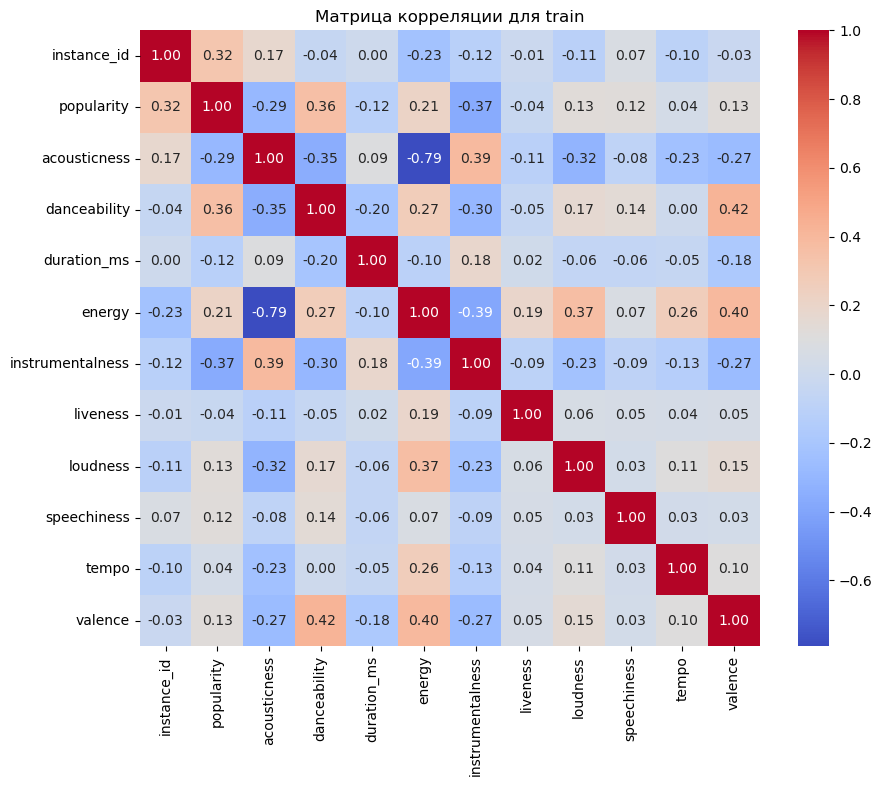

In [61]:
corr_matrix_train = train.select_dtypes([int,float]).corr()

# Визуализация матрицы корреляции для hotel_train
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_train, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции для train")
plt.show()


In [62]:
train.columns

Index(['instance_id', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'obtained_date',
       'valence', 'music_genre'],
      dtype='object')

interval columns not set, guessing: ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


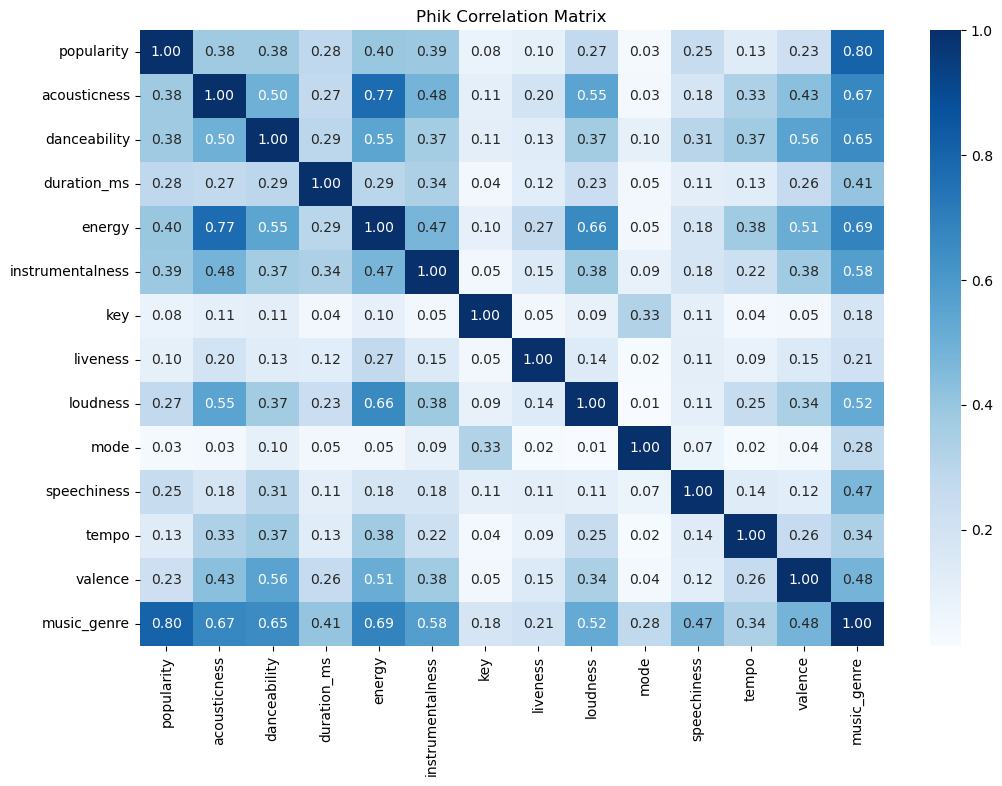

In [63]:
# Расчет матрицы корреляции phik
phik_matrix = train.drop(['instance_id', 'track_name', 'obtained_date'], axis=1)
phik_matrix = phik_matrix.phik_matrix()

# Построение тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.title('Phik Correlation Matrix')
plt.show()

* Скорее всего откажимся от признака `energy` или как либо преобразуем данный признак.

### Посмотрим, как распределяются признаки

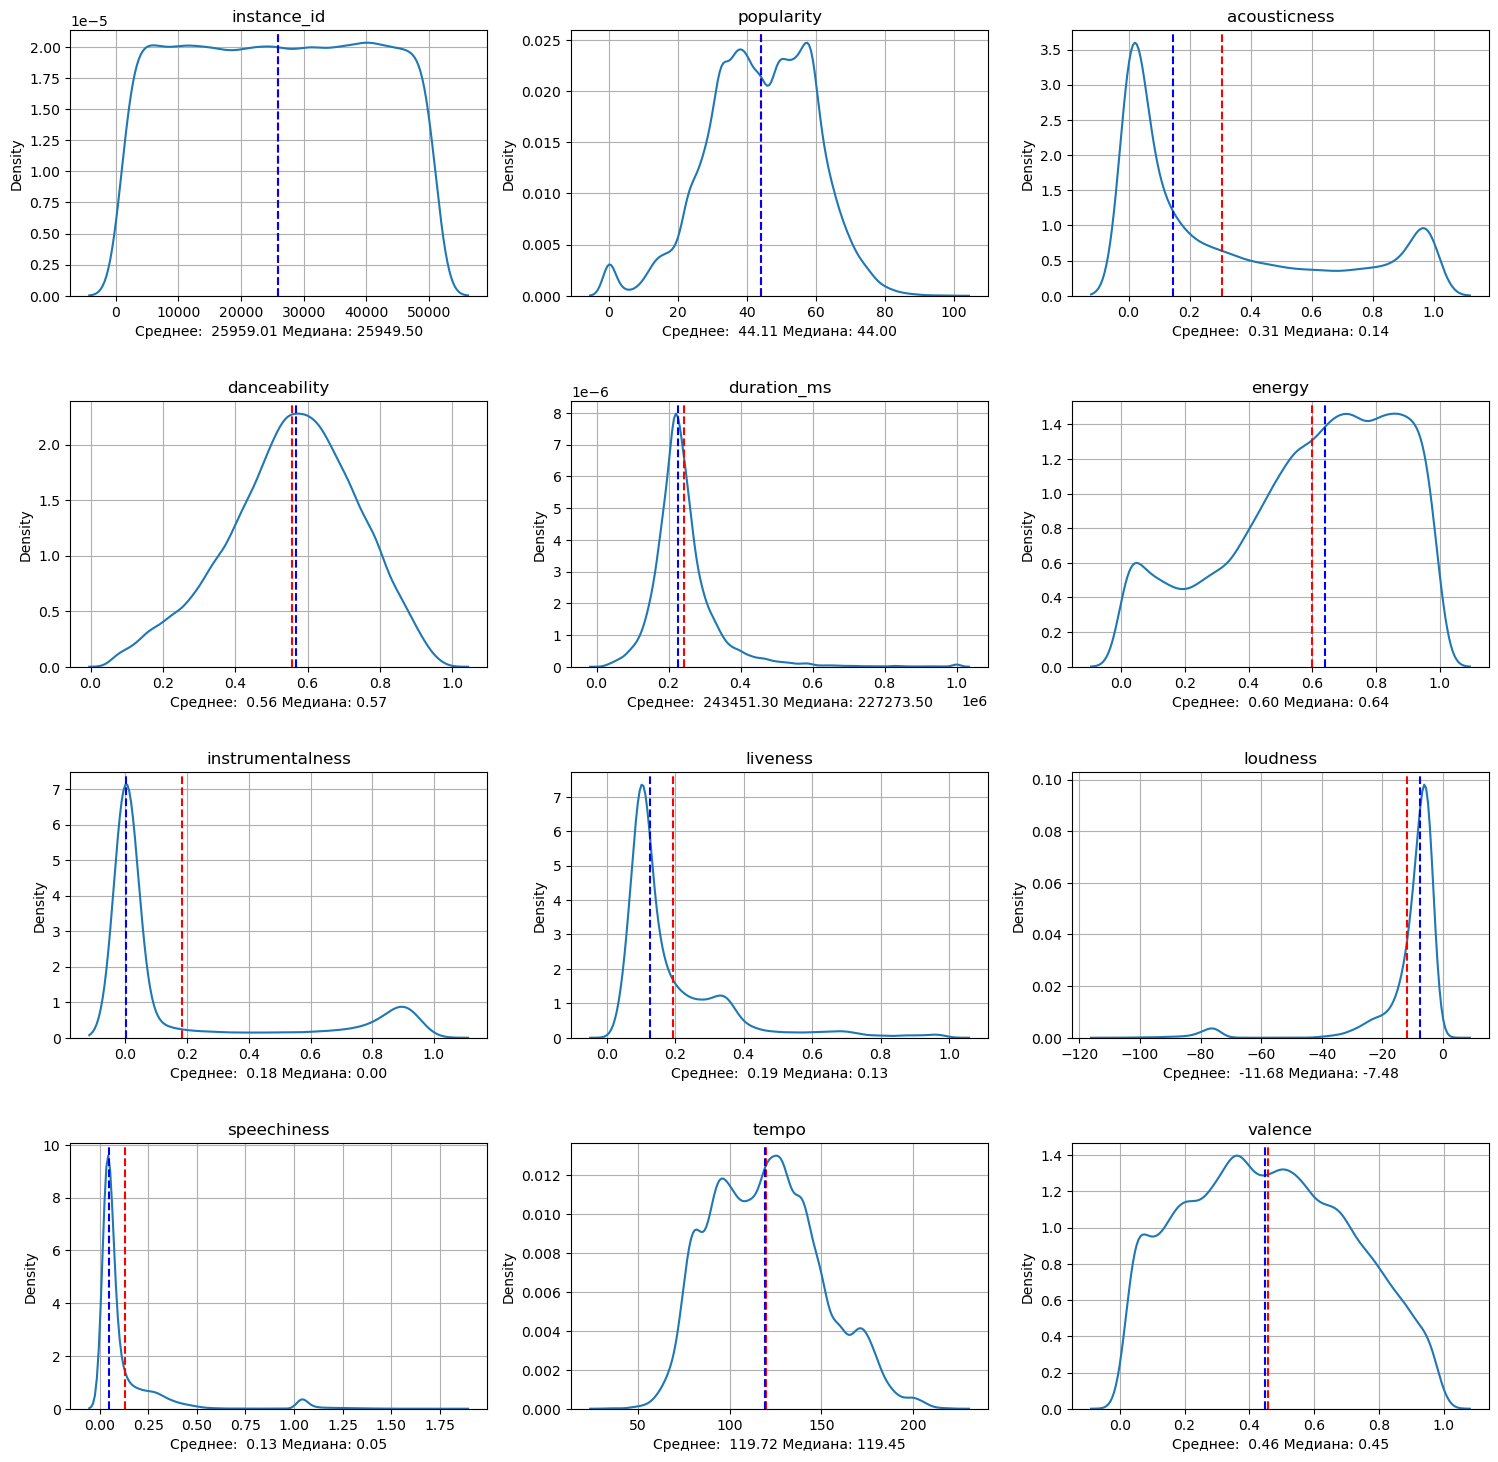

In [64]:
fig = plt.figure(figsize=(15, 18))
# Выбираем только числовые данные
df_dist = train.select_dtypes([int, float]) 

for i, column in enumerate(df_dist.columns, 1):
        ax = plt.subplot(5, 3, i) 
        sns.kdeplot(x=df_dist[column], ax=ax)
        ax.set_title(column)
        ax.grid(True)  # Добавление сетки

        # Добавление линии среднего значения
        mean_value = df_dist[column].mean()
        ax.axvline(mean_value, color='r', linestyle='--')
        ax.set_xlabel(f'Среднее:')
        
        # Добавление линии медианного значения
        median_value = df_dist[column].median()
        ax.axvline(median_value, color='b', linestyle='--')

        ax.set_xlabel(f'Среднее:  {mean_value:.2f} Медиана: {median_value:.2f}')
        
plt.tight_layout(h_pad=3)
plt.show()

In [65]:
import matplotlib.pyplot as plt
import scipy.stats as stats

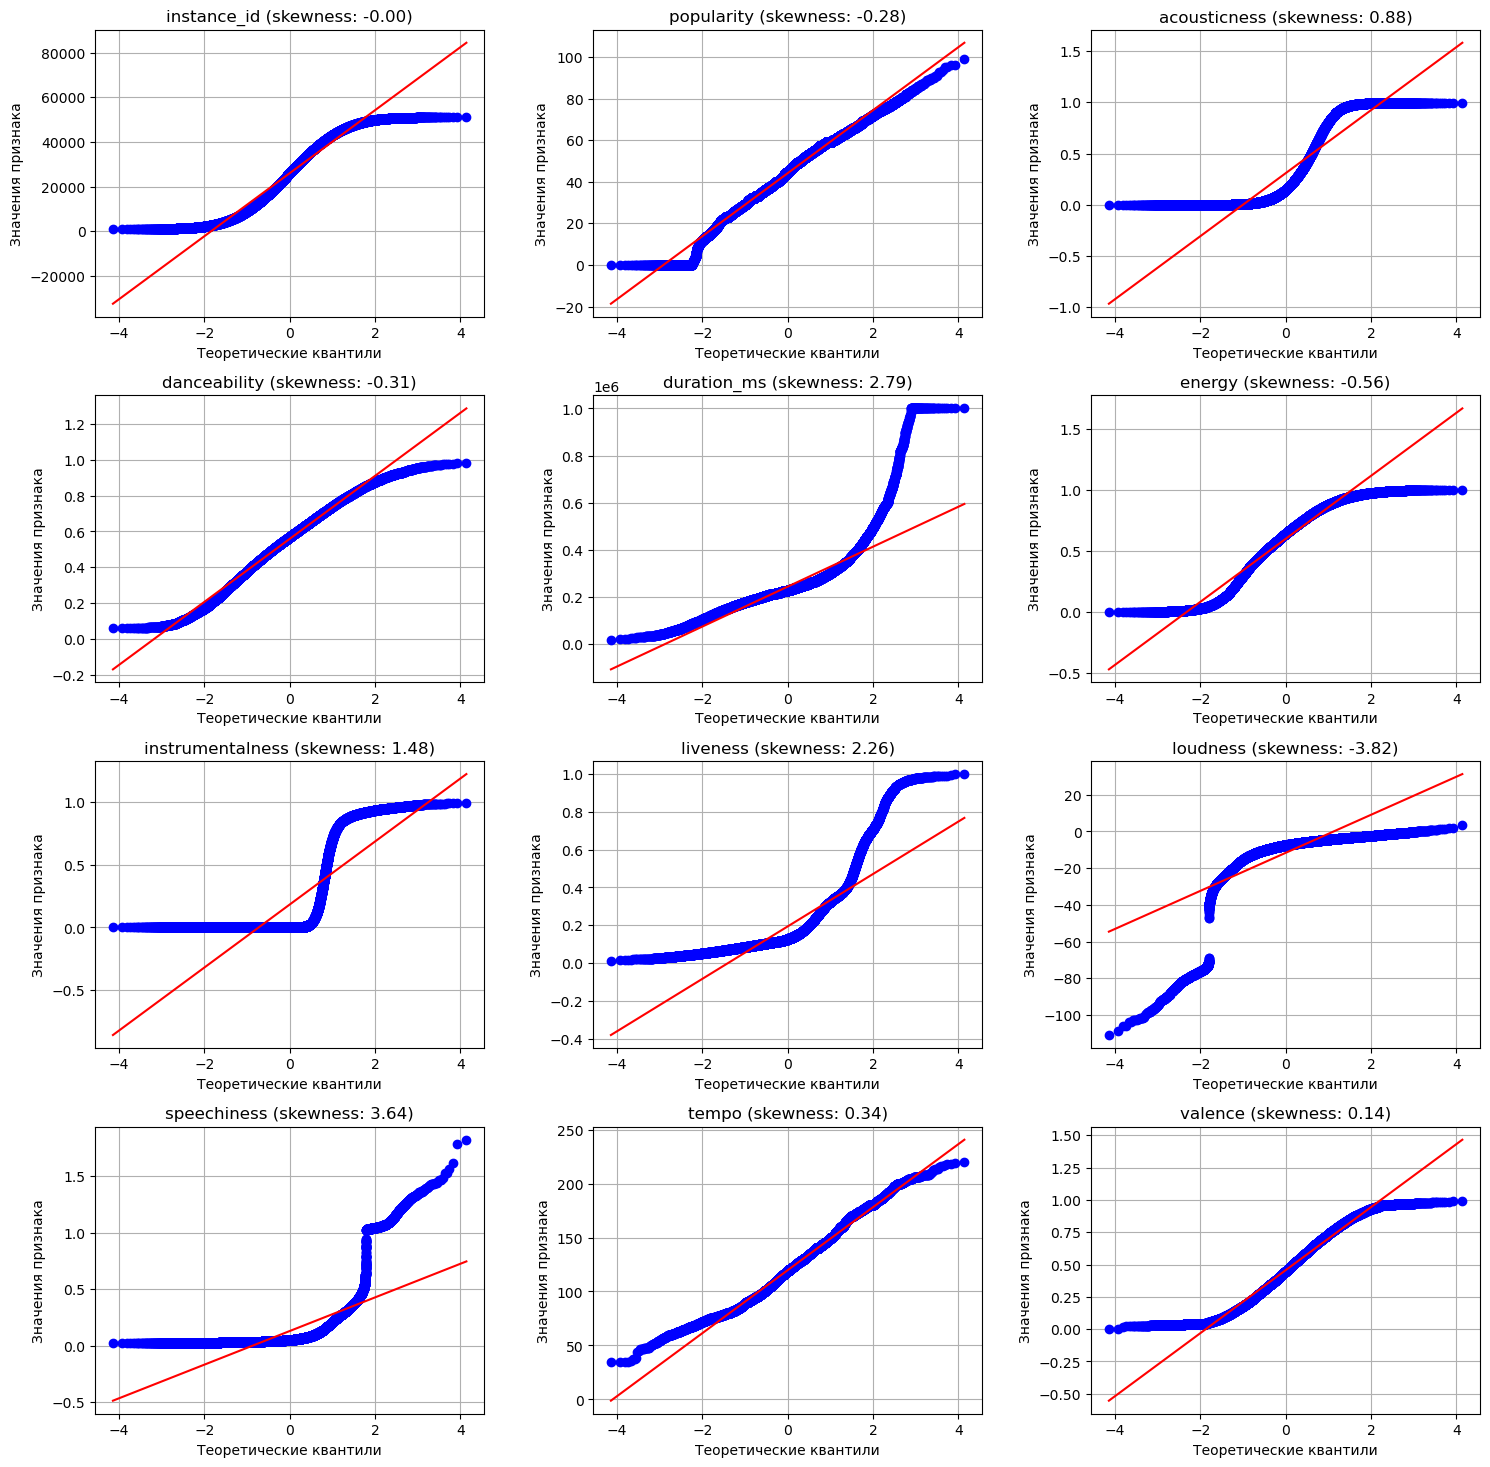

In [66]:
# Настройка размера фигуры для графиков
fig = plt.figure(figsize=(15, 18)) 

try:
    for i, column in enumerate(df_dist.columns, 1): 
        ax = plt.subplot(5, 3, i) 
        stats.probplot(df_dist[column], dist='norm', plot=ax)
        
        # Добавление названия оси и заголовка
        ax.set_xlabel('Теоретические квантили')
        ax.set_ylabel('Значения признака')
        ax.set_title(f'{column} (skewness: {df_dist[column].skew():.2f})')
        
        # Добавление сетки
        ax.grid(True)

    plt.tight_layout(w_pad=3) 
except ValueError as ve:
    print(f'Произошла ошибка: {ve}')
    
plt.show()

In [67]:
for i in train.select_dtypes([int,float]).columns:
  print(f'skew для признака {i} {round(train.select_dtypes([int,float])[i].skew(),3)}')

skew для признака instance_id -0.001
skew для признака popularity -0.285
skew для признака acousticness 0.877
skew для признака danceability -0.306
skew для признака duration_ms 2.788
skew для признака energy -0.563
skew для признака instrumentalness 1.478
skew для признака liveness 2.258
skew для признака loudness -3.823
skew для признака speechiness 3.642
skew для признака tempo 0.336
skew для признака valence 0.135


In [68]:
for i in train.select_dtypes([int,float]).columns:
  print(f'skew для признака {i} {round(train.select_dtypes([int,float])[i].skew(),3)}')

skew для признака instance_id -0.001
skew для признака popularity -0.285
skew для признака acousticness 0.877
skew для признака danceability -0.306
skew для признака duration_ms 2.788
skew для признака energy -0.563
skew для признака instrumentalness 1.478
skew для признака liveness 2.258
skew для признака loudness -3.823
skew для признака speechiness 3.642
skew для признака tempo 0.336
skew для признака valence 0.135


In [69]:
box = train.select_dtypes([int,float]).skew()


In [70]:
train.to_csv('train_2.csv', index=False)

Пременные с большим "разбросом" данных:
* duration_ms 2.788
* instrumentalness 1.478
* liveness 2.258
* loudness -3.823
* speechiness 3.642 \
Переменные с умеренным разбросом данных:
* acousticness 0.877
* energy -0.563

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
train_save = train.copy()

In [73]:
# Предположим, df - это ваш исходный DataFrame с музыкальными данными
# Сначала создаем новые переменные, как описано ранее
train['loudness_to_energy'] = abs(train['loudness'] / train['energy'])
train['liveness_x_instrumentalness'] = train['liveness'] * train['instrumentalness']
train['inverse_speechiness'] = 1 / train['speechiness']
train['inverse_energy'] = train['inverse_speechiness']
train['duration_ms_squared'] = (train['duration_ms'] ** 2)
train['log_acousticness'] = np.log(train['acousticness'] + 1)  # Добавляем 1 для обработки нулевых значений
train['speechiness_x_acousticness'] = train['speechiness'] * train['acousticness']
train['log_energy'] = np.log(train['energy']**2)

interval columns not set, guessing: ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'loudness_to_energy', 'liveness_x_instrumentalness', 'inverse_speechiness', 'inverse_energy', 'duration_ms_squared', 'log_acousticness', 'speechiness_x_acousticness', 'log_energy']


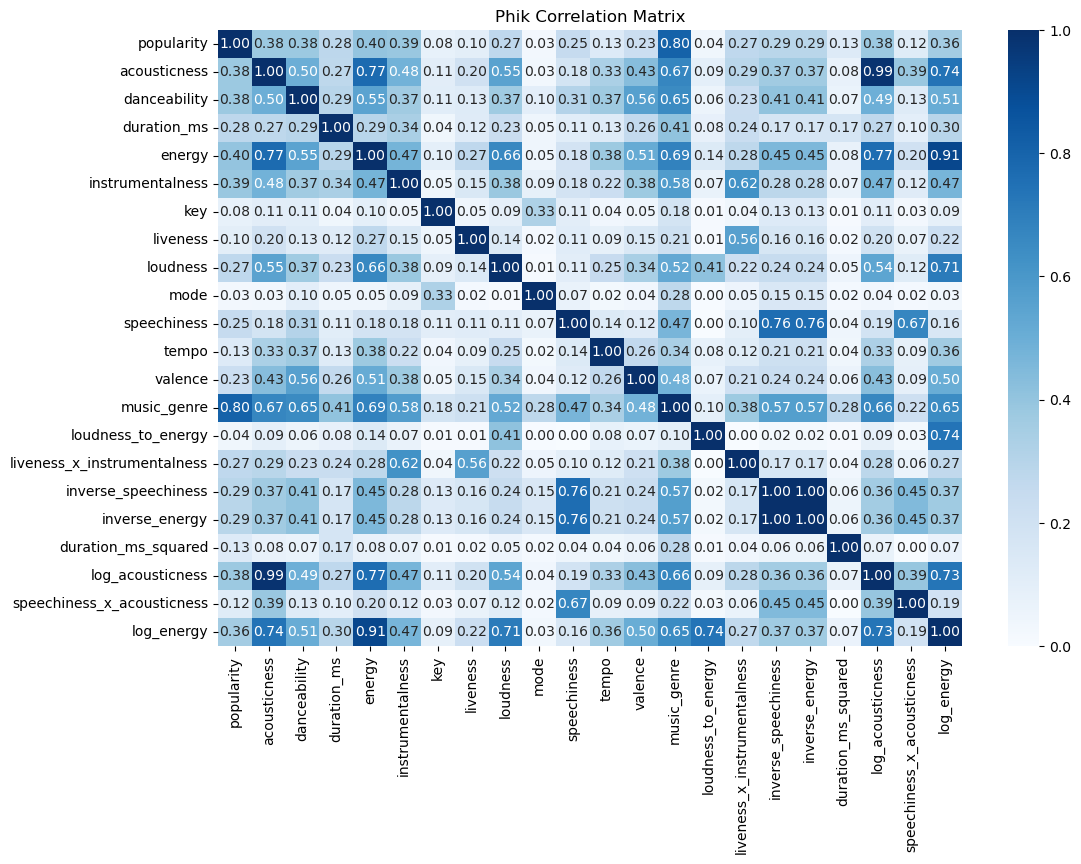

In [74]:
# Расчет матрицы корреляции phik
phik_matrix = train.drop(['instance_id', 'track_name', 'obtained_date',], axis=1)
phik_matrix = phik_matrix.phik_matrix()

# Построение тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.title('Phik Correlation Matrix')
plt.show()

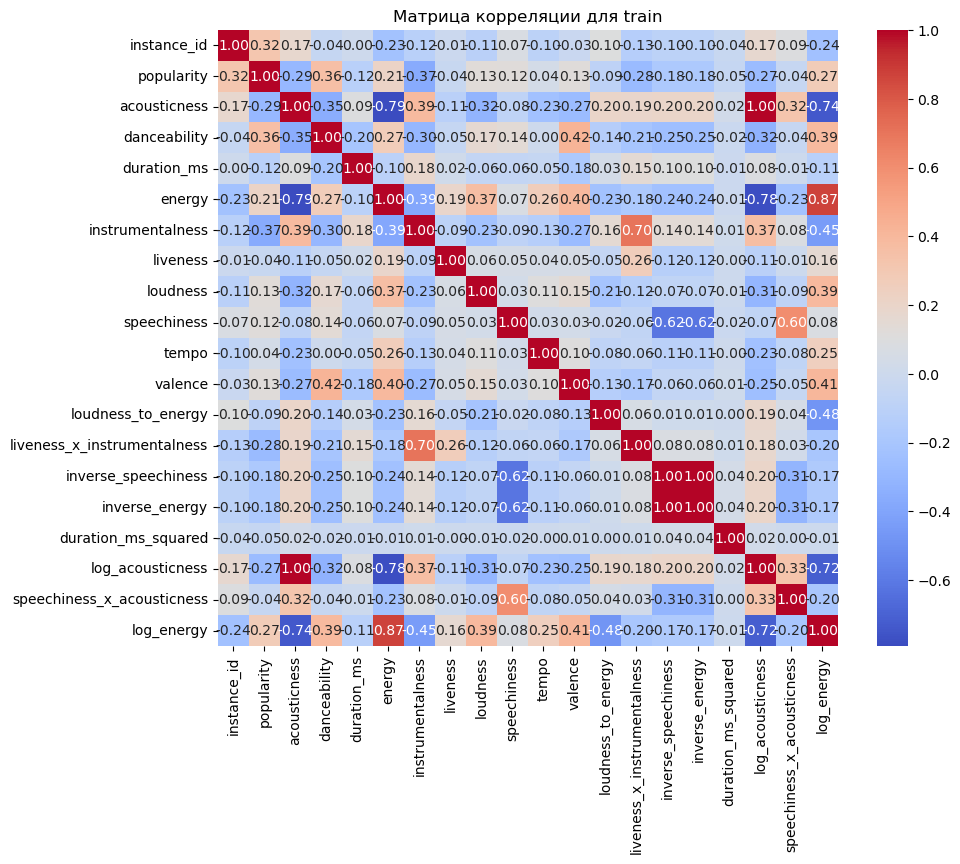

In [75]:
corr_matrix_train = train.select_dtypes([int,float]).corr()

# Визуализация матрицы корреляции для hotel_train
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_train, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции для train")
plt.show()

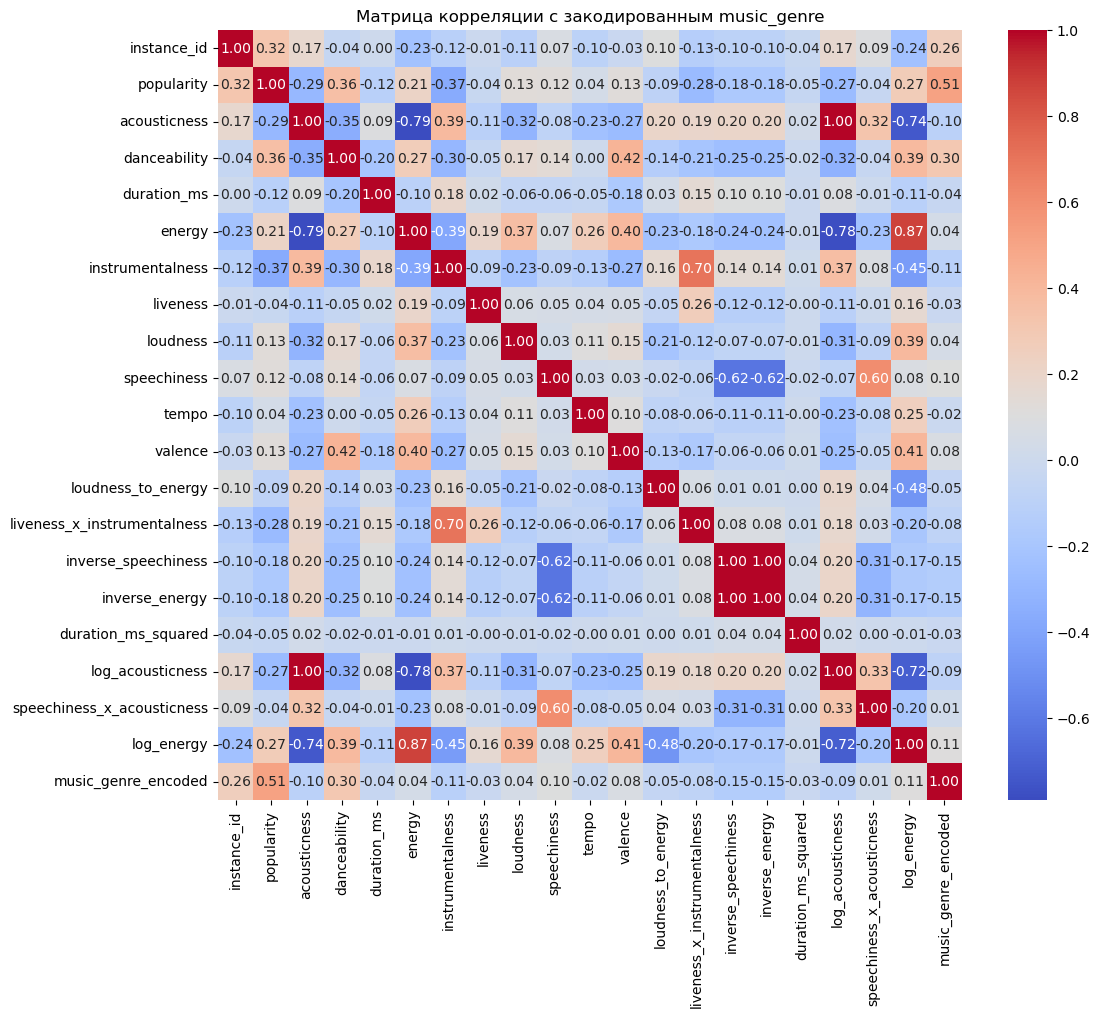

In [76]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что 'train' - это ваш DataFrame и 'music_genre' - категориальная переменная, которую нужно закодировать
label_encoder = LabelEncoder()
train['music_genre_encoded'] = label_encoder.fit_transform(train['music_genre'])

# Теперь мы можем вычислить корреляционную матрицу включая новый числовой столбец
corr_matrix = train.select_dtypes([int, float]).corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции с закодированным music_genre")
plt.show()

In [77]:
# Ограничиваем значения в столбце 'loudness_to_energy' сверху значением 15
# train['loudness_to_energy'] = train['loudness_to_energy'].clip(upper=15)

In [78]:
# Проверка и создание 'inverse_speechiness', если он отсутствует
if 'inverse_speechiness' not in train.columns:
    train['inverse_speechiness'] = 1 / train['speechiness']

# Выборка интересующих нас столбцов
features = train[['energy', 'inverse_speechiness']]

# Создание объекта PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

# Преобразование данных
poly_features = poly.fit_transform(features)

# Создание DataFrame для полиномиальных признаков
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['energy', 'inverse_speechiness']))

# Удаление исходных столбцов 'energy' и 'inverse_speechiness' из poly_df
poly_df = poly_df.drop(['energy', 'inverse_speechiness'], axis=1)

# Объединение poly_df и train
train = pd.concat([train, poly_df], axis=1)

'Описательная статистика для log_energy:'

count  mean  std    min   25%   50%   75%   max
music_genre                                                   
Alternative 3,939.00 -0.80 0.73  -6.06 -1.17 -0.58 -0.23 -0.00
Anime       4,003.00 -1.27 1.71 -13.93 -1.77 -0.51 -0.16 -0.00
Blues       3,987.00 -1.20 1.04  -9.30 -1.62 -0.93 -0.45 -0.00
Classical   4,019.00 -4.94 2.69 -14.27 -6.64 -4.61 -3.15 -0.01
Country     4,024.00 -1.04 0.81  -7.73 -1.40 -0.81 -0.44 -0.03
Electronic  4,051.00 -0.69 0.63  -7.72 -0.99 -0.51 -0.21 -0.00
Hip-Hop     3,935.00 -0.94 0.52  -4.70 -1.23 -0.86 -0.56 -0.01
Jazz        4,023.00 -1.90 1.52 -12.32 -2.48 -1.48 -0.85 -0.01
Rap         3,964.00 -0.93 0.53  -5.07 -1.23 -0.87 -0.55 -0.01
Rock        4,055.00 -0.87 0.79 -11.91 -1.20 -0.65 -0.32 -0.00

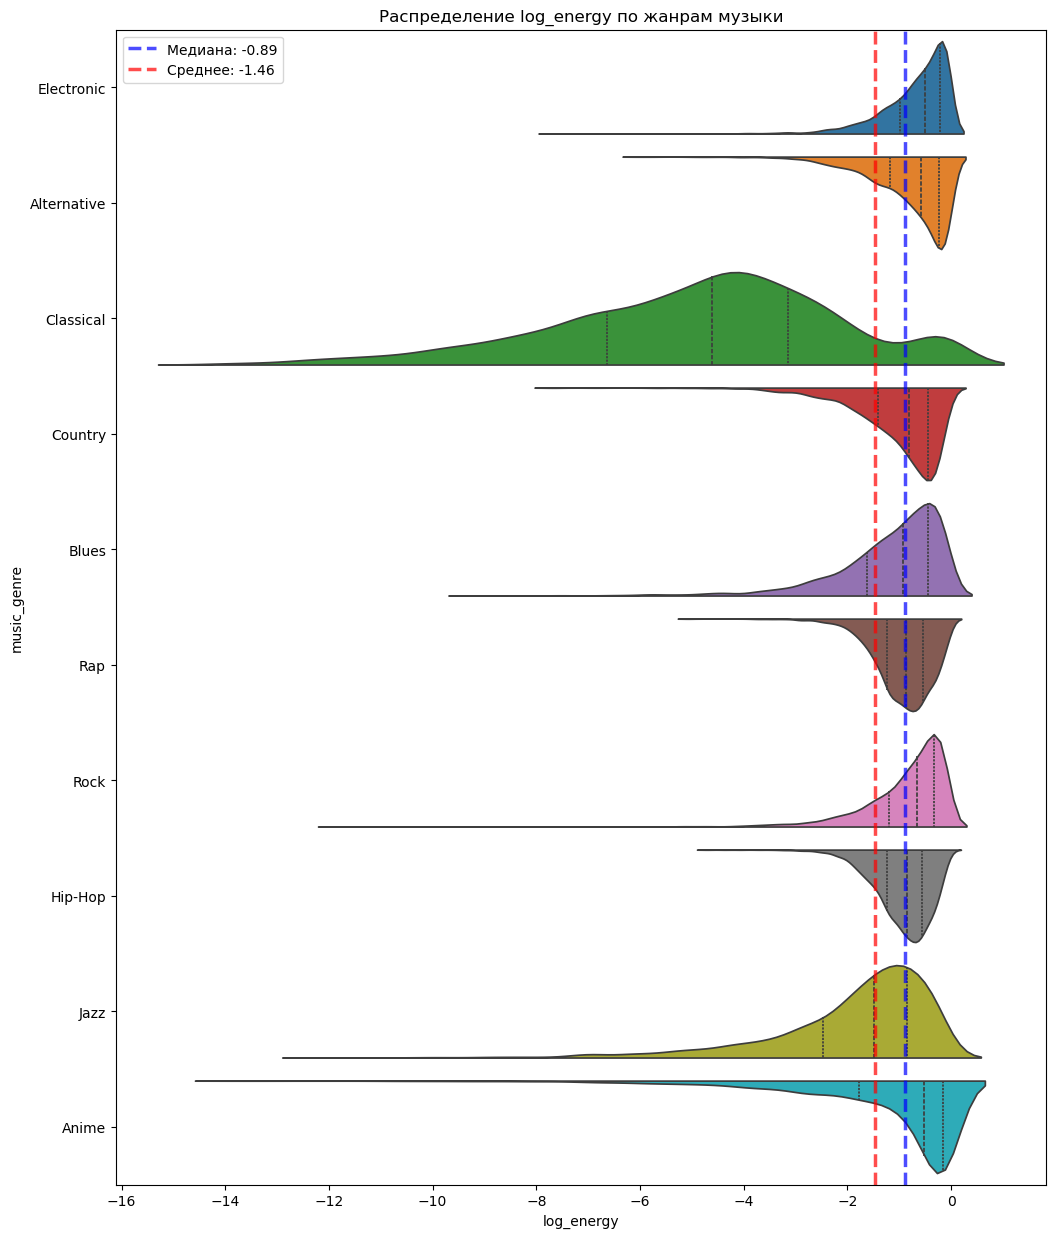

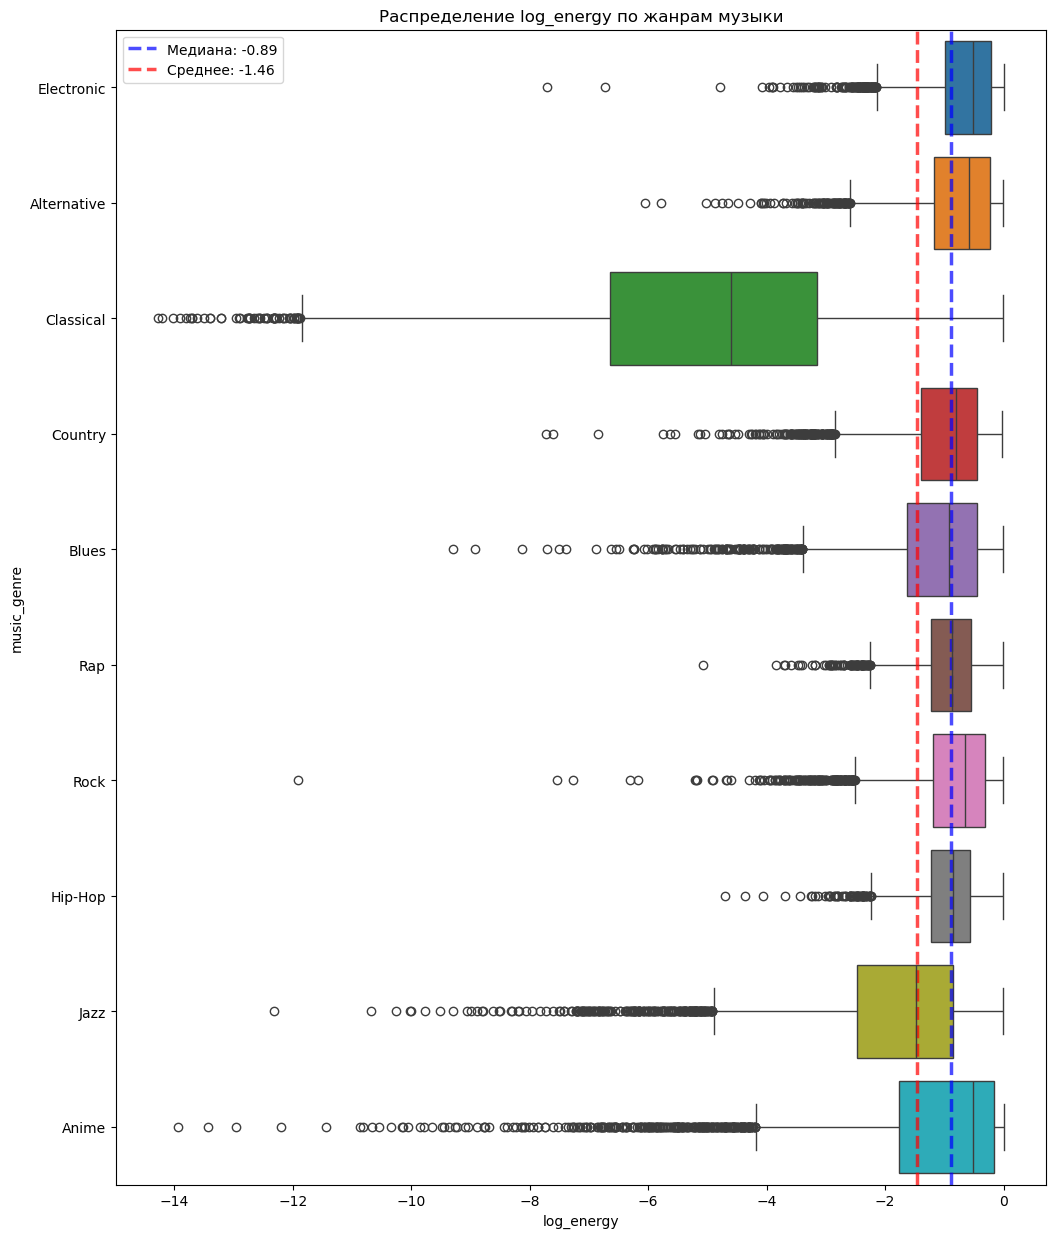

'Описательная статистика для energy:'

count  mean  std  min  25%  50%  75%  max
music_genre                                             
Alternative 3,939.00  0.71 0.21 0.05 0.56 0.75 0.89 1.00
Anime       4,003.00  0.66 0.30 0.00 0.41 0.77 0.93 1.00
Blues       3,987.00  0.61 0.23 0.01 0.44 0.63 0.80 1.00
Classical   4,019.00  0.18 0.23 0.00 0.04 0.10 0.21 0.99
Country     4,024.00  0.64 0.20 0.02 0.50 0.67 0.80 0.98
Electronic  4,051.00  0.74 0.19 0.02 0.61 0.78 0.90 1.00
Hip-Hop     3,935.00  0.65 0.15 0.10 0.54 0.65 0.76 0.99
Jazz        4,023.00  0.47 0.24 0.00 0.29 0.48 0.65 1.00
Rap         3,964.00  0.65 0.16 0.08 0.54 0.65 0.76 1.00
Rock        4,055.00  0.69 0.20 0.00 0.55 0.72 0.85 1.00

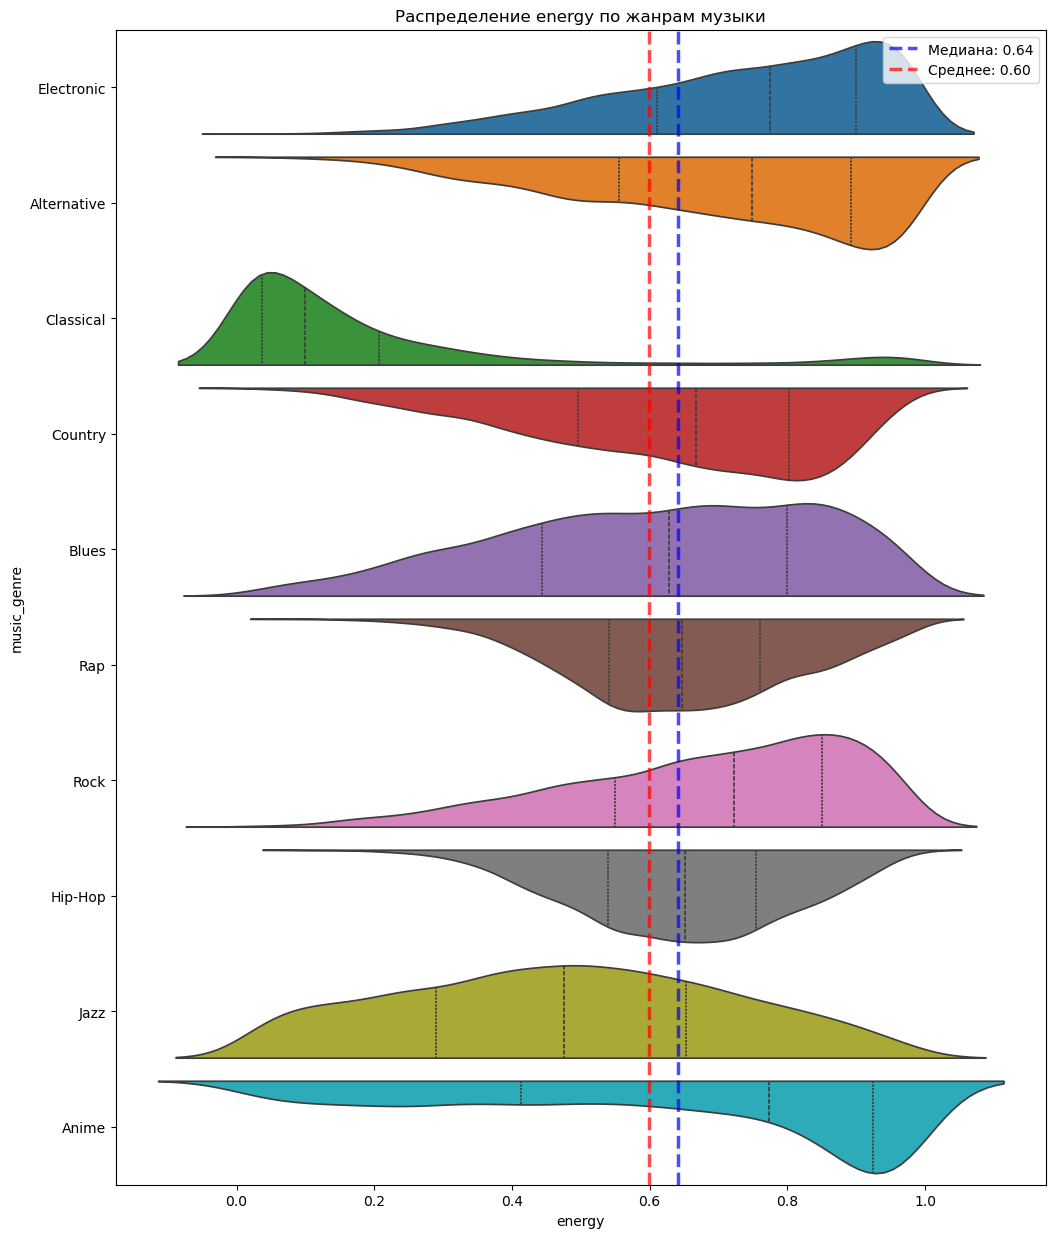

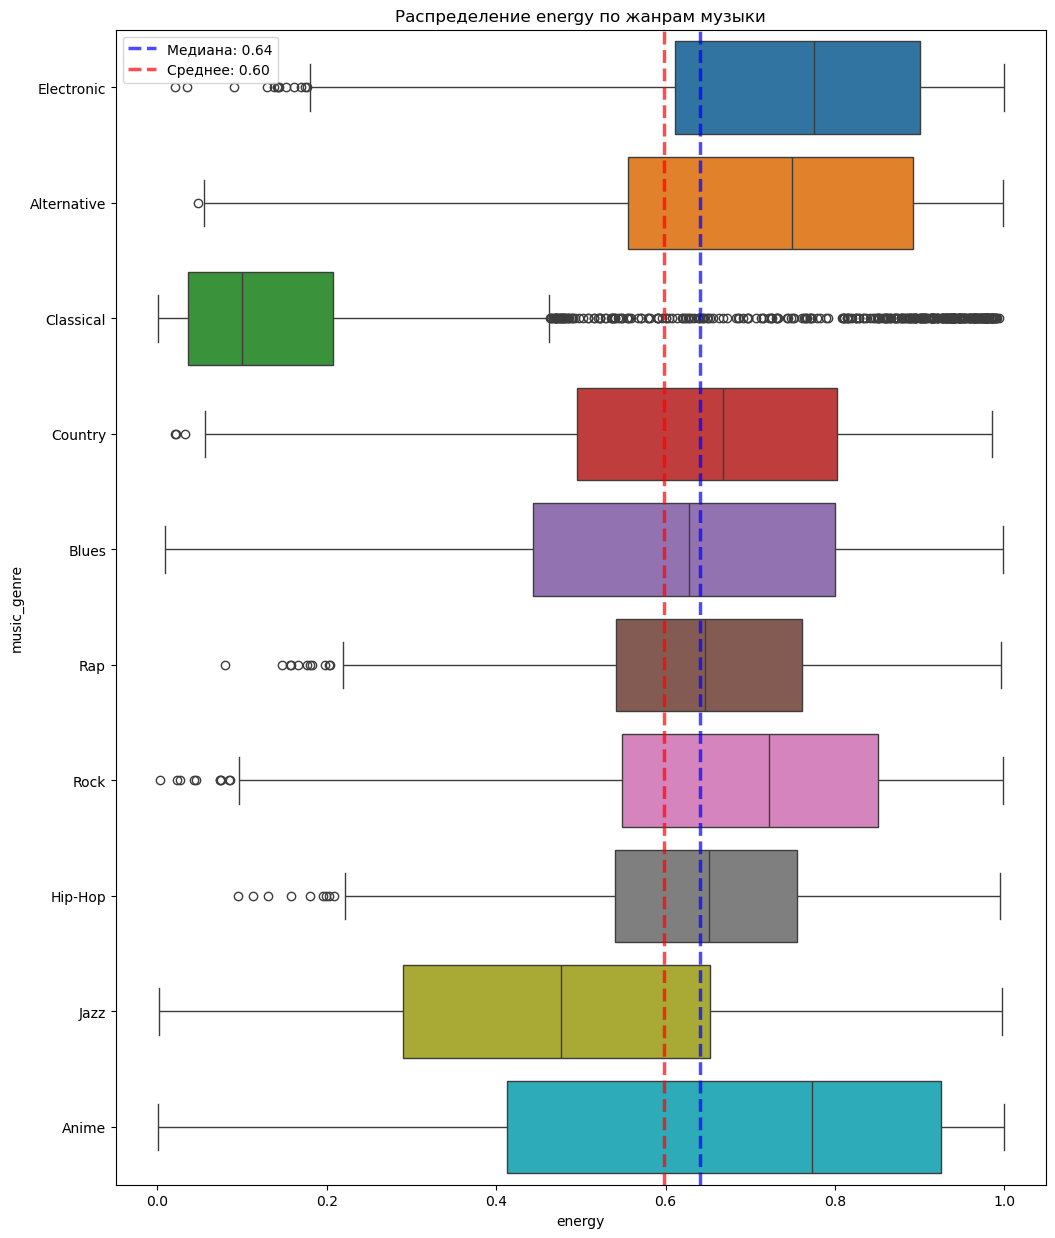

'Описательная статистика для inverse_speechiness:'

count  mean   std  min   25%   50%   75%   max
music_genre                                                  
Alternative 3,939.00 18.67 10.74 0.68  9.52 18.69 27.55 43.29
Anime       4,003.00 20.87  9.88 0.75 13.37 21.74 28.57 43.29
Blues       3,987.00 21.69  9.79 0.72 14.51 22.88 29.33 43.29
Classical   4,019.00 21.67  6.83 0.75 19.19 22.88 25.97 41.49
Country     4,024.00 26.33  9.99 0.70 21.14 28.57 33.78 44.84
Electronic  4,051.00 16.65 10.01 0.65  7.75 16.45 24.27 42.74
Hip-Hop     3,935.00  8.22  7.43 0.55  3.17  4.98 11.25 39.53
Jazz        4,023.00 20.47  9.98 0.68 13.25 22.37 28.09 43.48
Rap         3,964.00  9.54  8.17 0.56  3.44  5.97 14.01 43.67
Rock        4,055.00 23.45 10.03 0.70 16.49 25.19 31.15 44.64

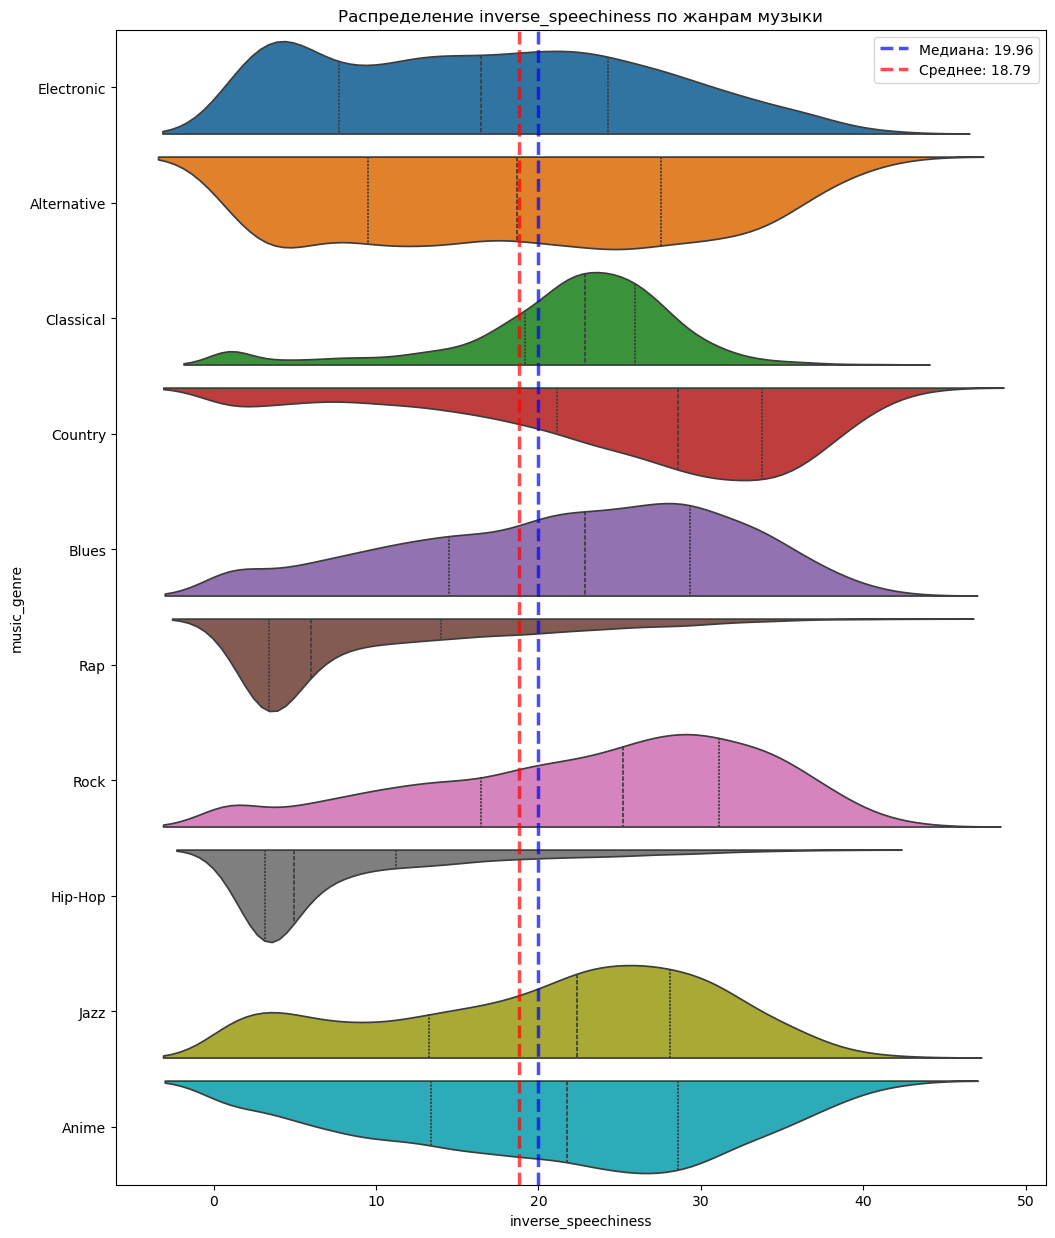

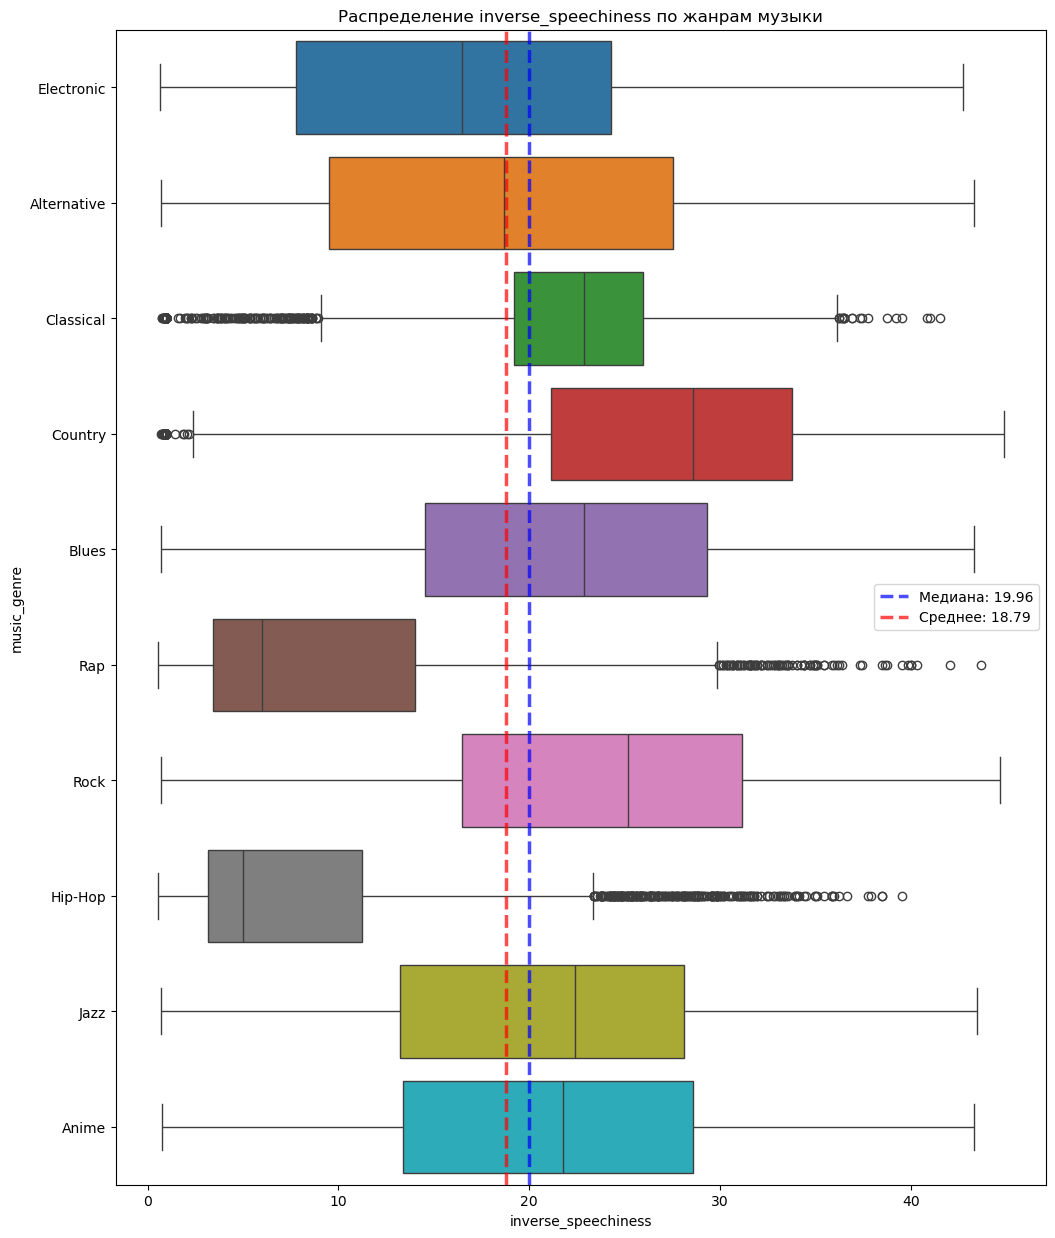

'Описательная статистика для energy^2:'

count  mean  std  min  25%  50%  75%  max
music_genre                                             
Alternative 3,939.00  0.55 0.27 0.00 0.31 0.56 0.80 1.00
Anime       4,003.00  0.53 0.34 0.00 0.17 0.60 0.86 1.00
Blues       3,987.00  0.42 0.26 0.00 0.20 0.39 0.64 1.00
Classical   4,019.00  0.08 0.20 0.00 0.00 0.01 0.04 0.99
Country     4,024.00  0.45 0.24 0.00 0.25 0.45 0.64 0.97
Electronic  4,051.00  0.58 0.26 0.00 0.37 0.60 0.81 1.00
Hip-Hop     3,935.00  0.44 0.19 0.01 0.29 0.42 0.57 0.99
Jazz        4,023.00  0.28 0.24 0.00 0.08 0.23 0.43 0.99
Rap         3,964.00  0.45 0.20 0.01 0.29 0.42 0.58 0.99
Rock        4,055.00  0.51 0.25 0.00 0.30 0.52 0.72 1.00

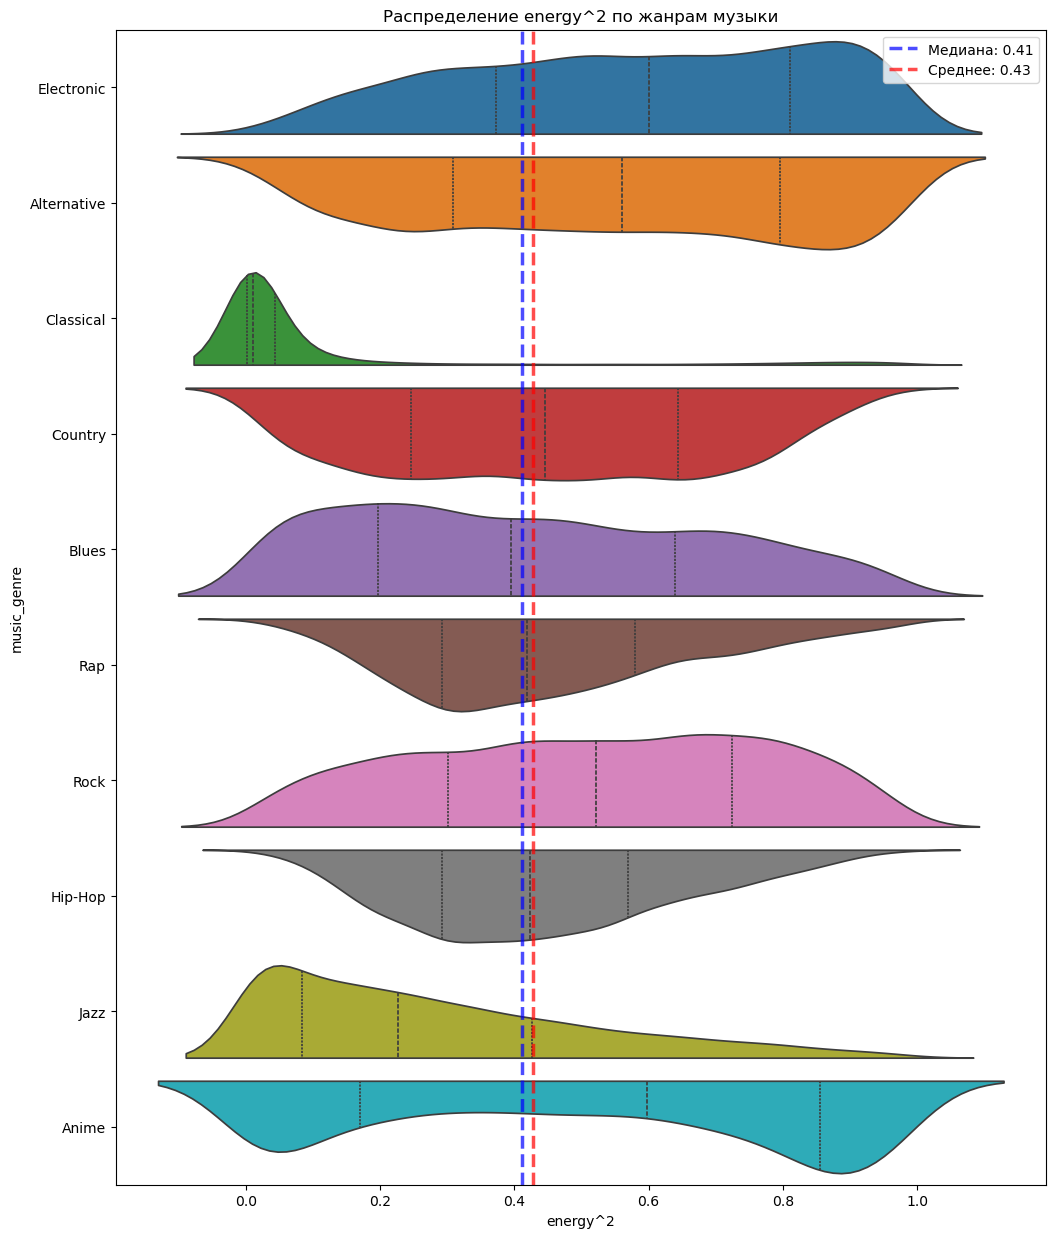

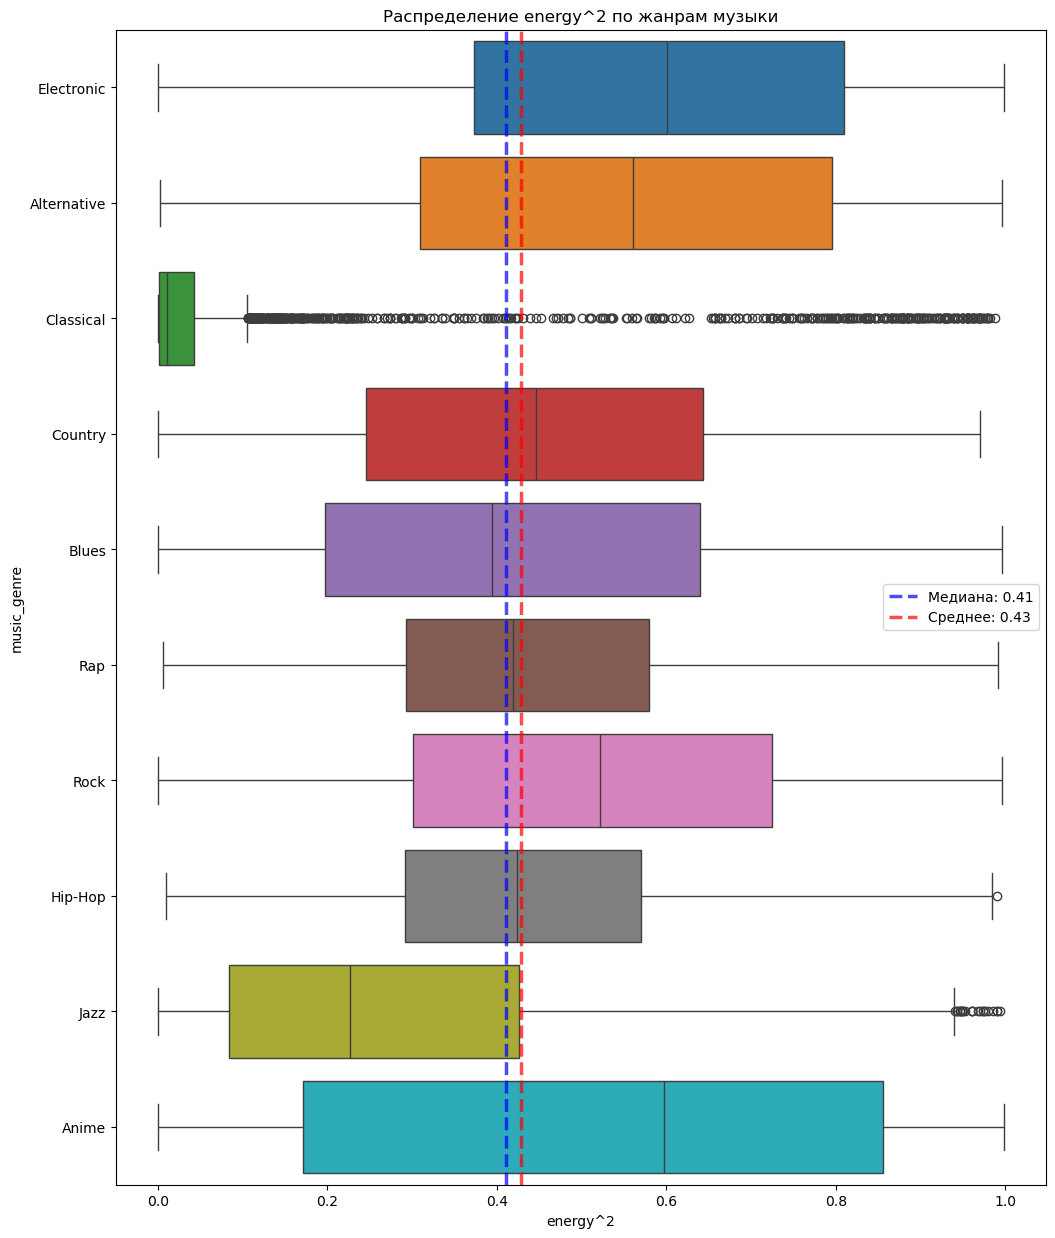

Столбец 'energy x inverse_speechiness' не найден в DataFrame.


'Описательная статистика для inverse_speechiness^2:'

count   mean    std  min    25%    50%      75%      max
music_genre                                                            
Alternative 3,939.00 463.73 422.41 0.47  90.70 349.38   758.90 1,874.03
Anime       4,003.00 533.21 408.75 0.57 178.73 472.59   816.33 1,874.03
Blues       3,987.00 566.31 405.77 0.52 210.65 523.65   859.99 1,874.03
Classical   4,019.00 516.35 249.85 0.56 368.40 523.65   674.65 1,721.73
Country     4,024.00 793.24 452.20 0.49 446.97 816.33 1,141.34 2,010.90
Electronic  4,051.00 377.45 366.75 0.43  60.09 270.52   589.12 1,826.28
Hip-Hop     3,935.00 122.76 217.17 0.30  10.08  24.75   126.53 1,562.28
Jazz        4,023.00 518.67 382.79 0.47 175.43 500.48   789.04 1,890.36
Rap         3,964.00 157.72 250.04 0.31  11.81  35.64   196.16 1,906.90
Rock        4,055.00 650.65 434.22 0.48 271.86 634.48   970.49 1,992.98

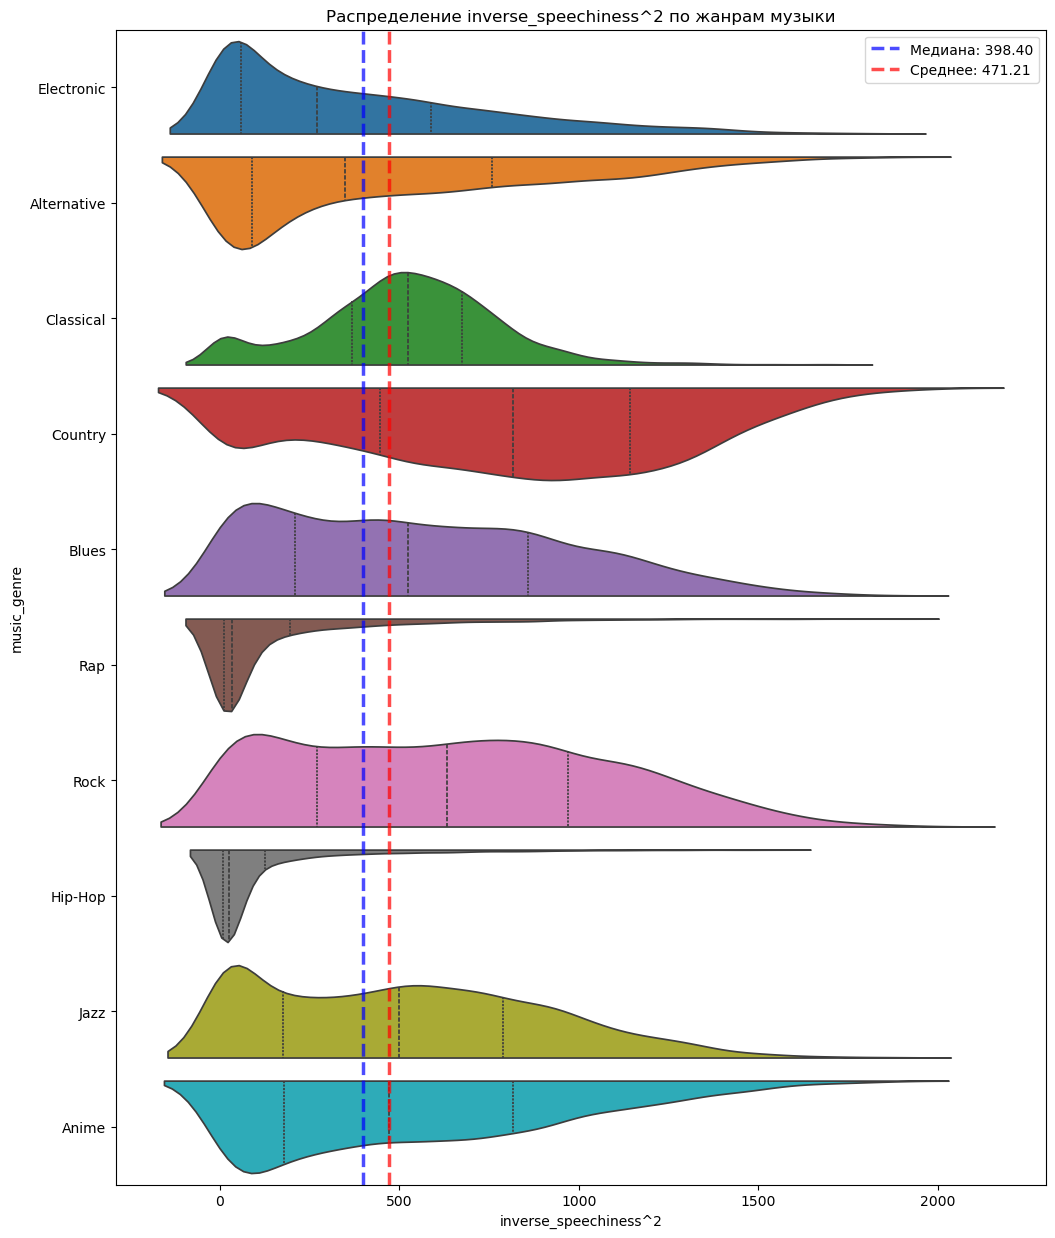

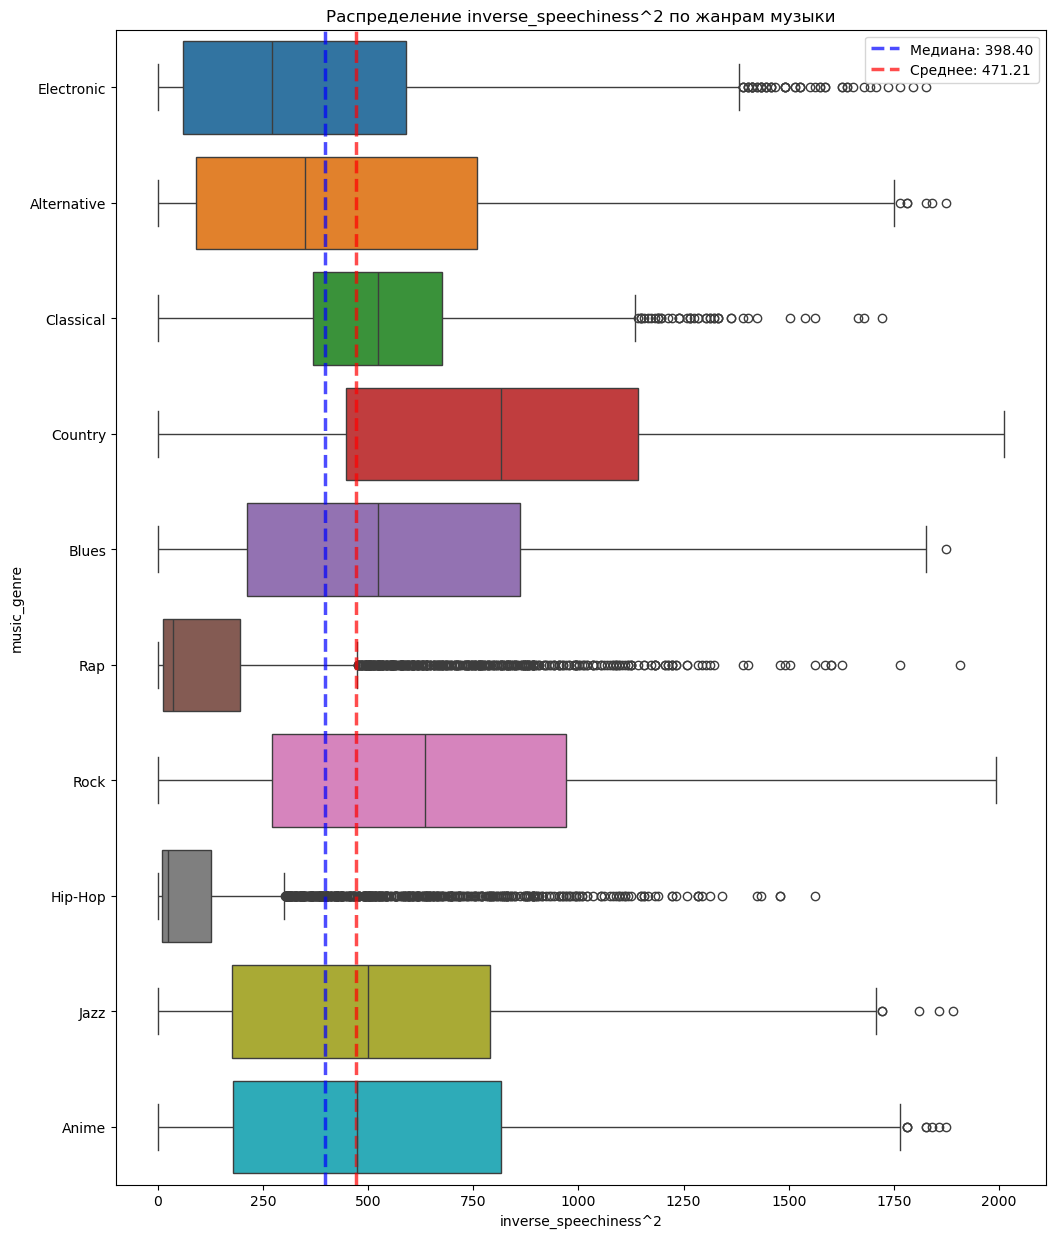

In [79]:
for i in ['log_energy','energy', 'inverse_speechiness', 'energy^2',
       'energy x inverse_speechiness', 'inverse_speechiness^2']:
       descriptive_stats_and_plot(train, i)
    

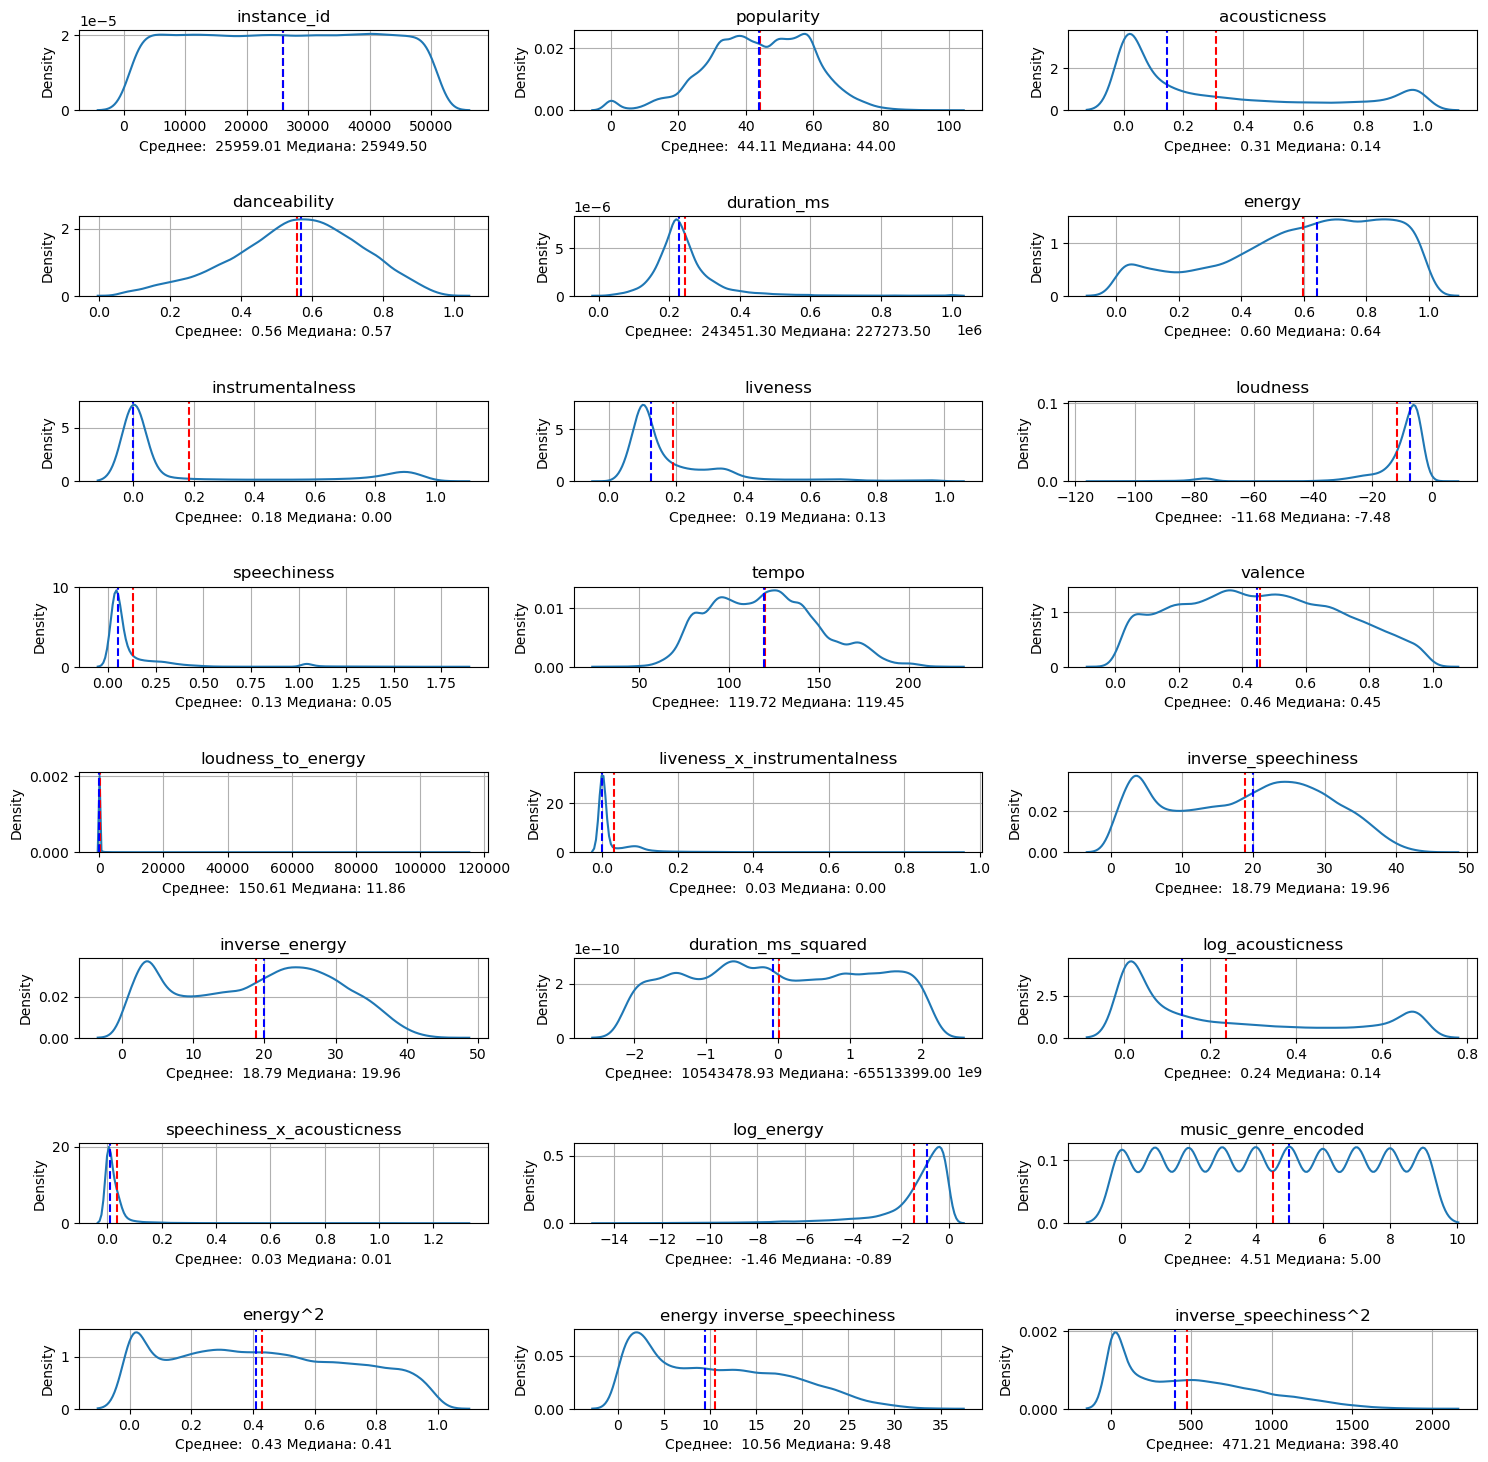

In [80]:
fig = plt.figure(figsize=(15, 18))
# Выбираем только числовые данные
df_dist = train.select_dtypes([int, float]) 


for i, column in enumerate(df_dist.columns, 1):
        ax = plt.subplot(10, 3, i) 
        sns.kdeplot(x=df_dist[column], ax=ax)
        ax.set_title(column)
        ax.grid(True)  # Добавление сетки

        # Добавление линии среднего значения
        mean_value = df_dist[column].mean()
        ax.axvline(mean_value, color='r', linestyle='--')
        ax.set_xlabel(f'Среднее:')
        
        # Добавление линии медианного значения
        median_value = df_dist[column].median()
        ax.axvline(median_value, color='b', linestyle='--')

        ax.set_xlabel(f'Среднее:  {mean_value:.2f} Медиана: {median_value:.2f}')
        
plt.tight_layout(h_pad=3)
plt.show()

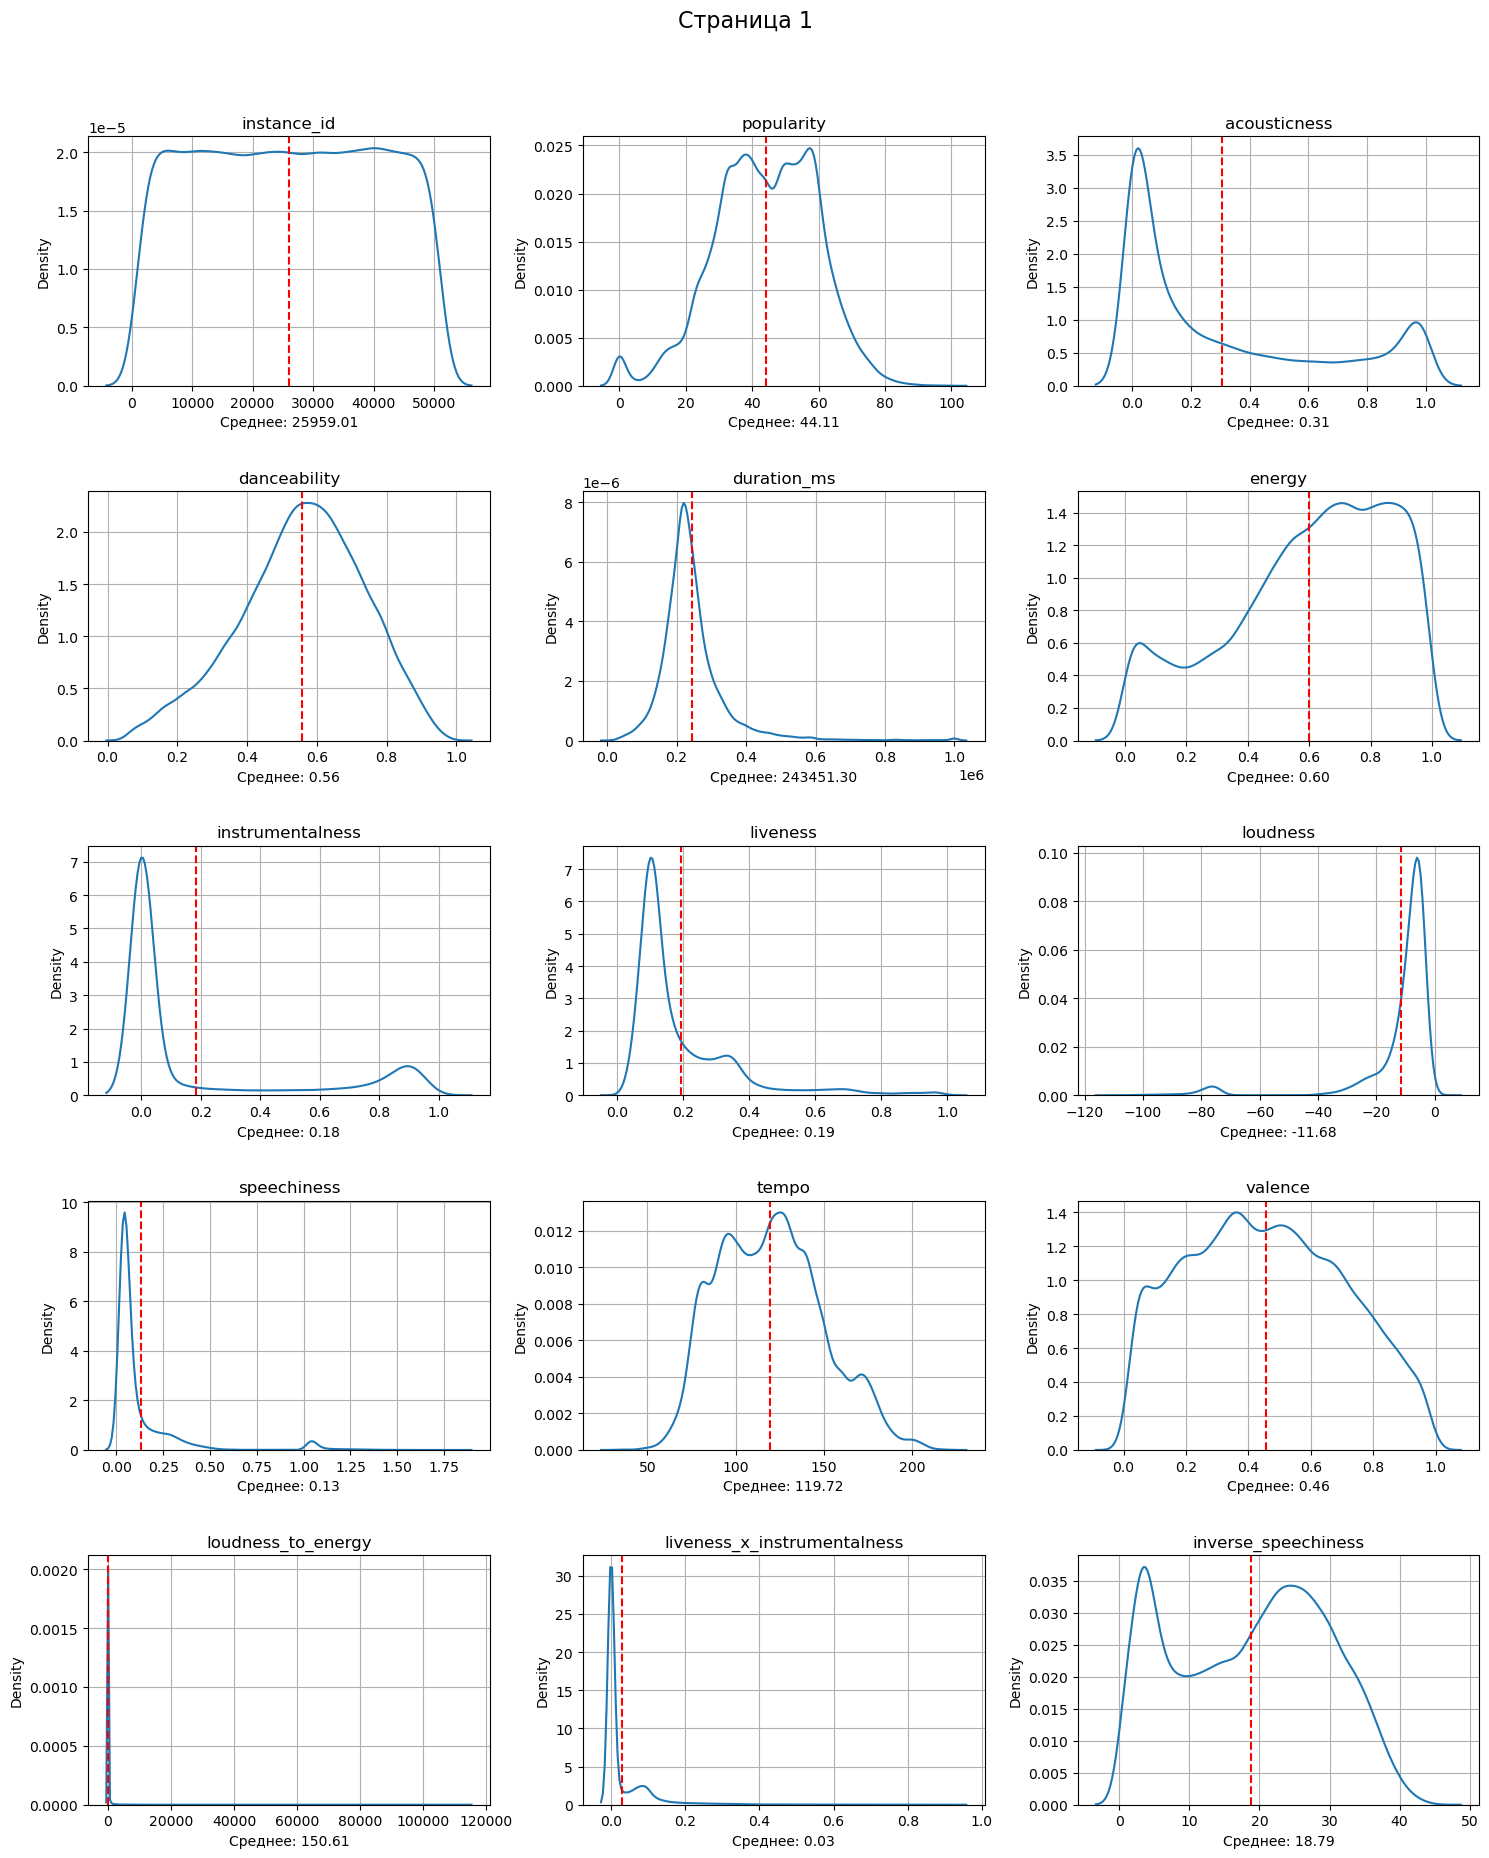

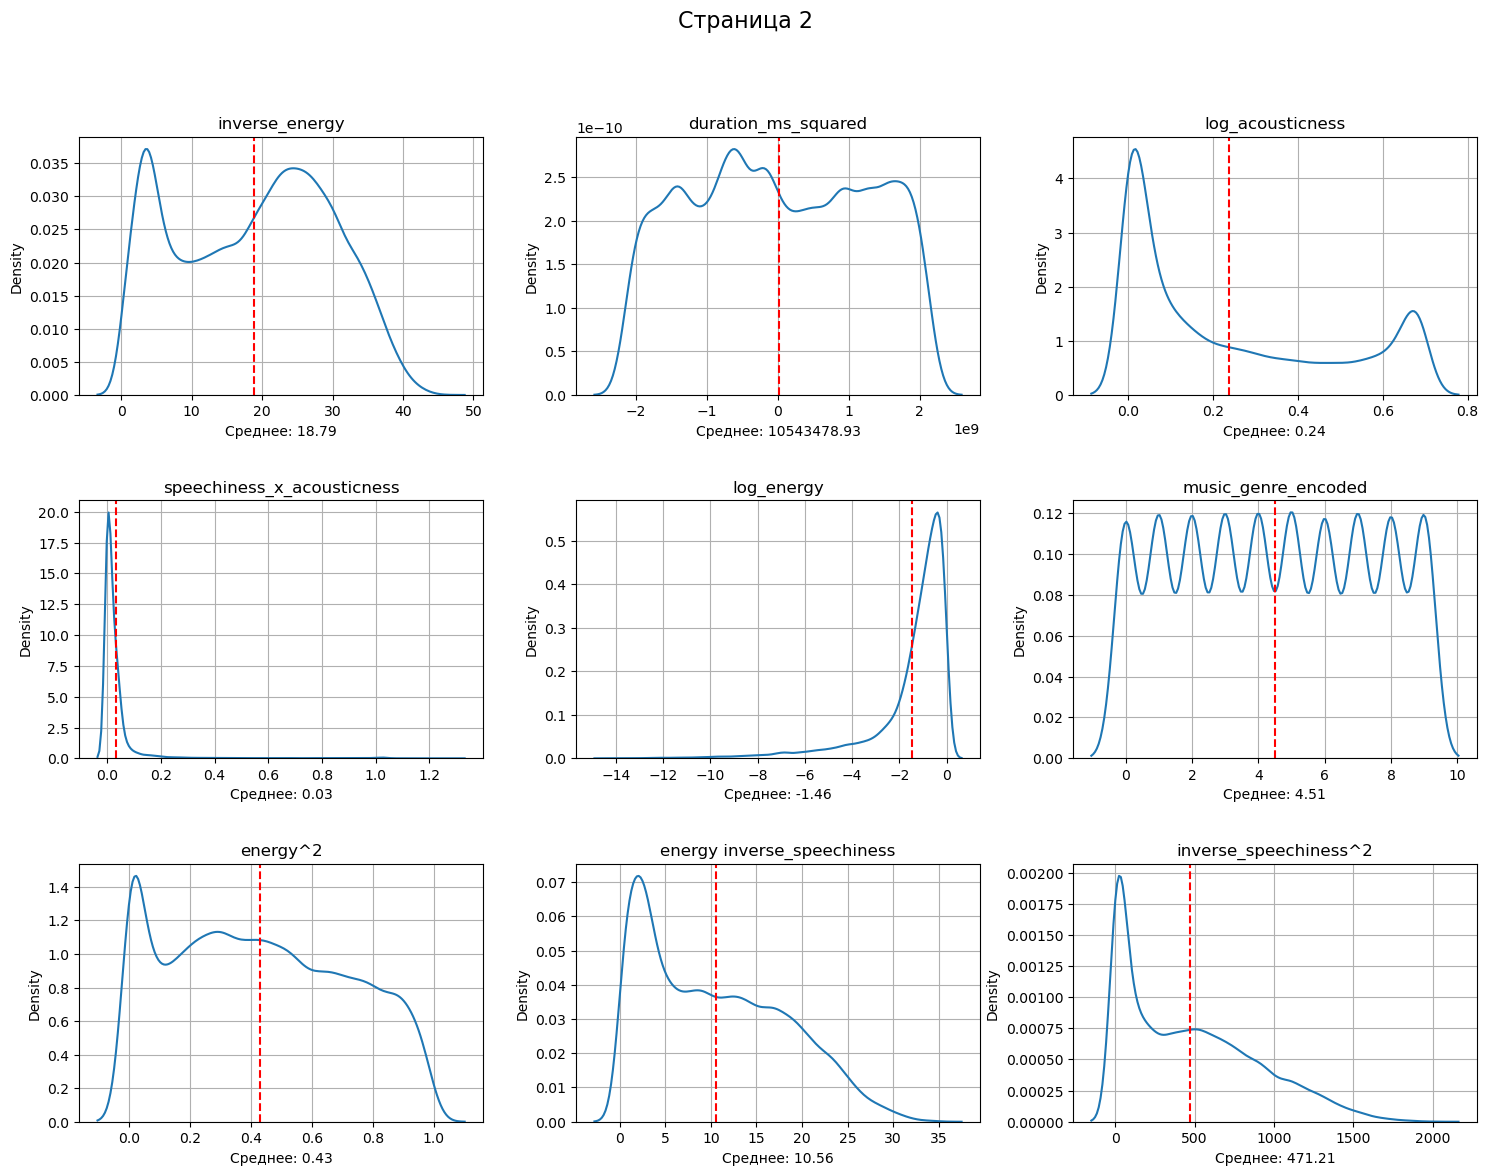

In [81]:
# Подготовка данных
df_dist = train.select_dtypes([int, float])

# Количество графиков на одной странице
n_rows, n_cols = 5, 3
max_plots_per_page = n_rows * n_cols

# Разбиваем столбцы на страницы
columns_pages = [df_dist.columns[i:i + max_plots_per_page] for i in range(0, len(df_dist.columns), max_plots_per_page)]

# Визуализация данных
for page, columns in enumerate(columns_pages, start=1):
    fig = plt.figure(figsize=(15, 18))
    fig.suptitle(f'Страница {page}', fontsize=16, y=1.03)

    for i, column in enumerate(columns, 1):
        ax = plt.subplot(n_rows, n_cols, i)
        sns.kdeplot(x=df_dist[column], ax=ax)
        ax.set_title(column)
        ax.grid(True)  # Добавление сетки

        # Добавление линии среднего значения
        mean_value = df_dist[column].mean()
        ax.axvline(mean_value, color='r', linestyle='--')
        ax.set_xlabel(f'Среднее: {mean_value:.2f}')
        
    plt.tight_layout(h_pad=3)
    plt.show()

In [82]:
for i in train.select_dtypes([int,float]).columns:
  print(f'skew для признака {i} {round(train.select_dtypes([int,float])[i].skew(),3)}')

skew для признака instance_id -0.001
skew для признака popularity -0.285
skew для признака acousticness 0.877
skew для признака danceability -0.306
skew для признака duration_ms 2.788
skew для признака energy -0.563
skew для признака instrumentalness 1.478
skew для признака liveness 2.258
skew для признака loudness -3.823
skew для признака speechiness 3.642
skew для признака tempo 0.336
skew для признака valence 0.135
skew для признака loudness_to_energy 33.226
skew для признака liveness_x_instrumentalness 4.503
skew для признака inverse_speechiness -0.053
skew для признака inverse_energy -0.053
skew для признака duration_ms_squared 0.014
skew для признака log_acousticness 0.701
skew для признака speechiness_x_acousticness 7.336
skew для признака log_energy -2.677
skew для признака music_genre_encoded 0.0
skew для признака energy^2 0.168
skew для признака energy inverse_speechiness 0.477
skew для признака inverse_speechiness^2 0.716


## Построение моделей

В данном разделе я попробую различные подходы к созданию моделей, работа которых будет осуществляться через объекты pipeline. Модели будут оценены кросс-валидацией метрикой f1-micro. 

1. Модель - Randomized Search Random Forest
2. Модель - Grid Search CatBoost

### Создание пайплайнов преобразований данных

In [83]:
def convert_tempo_to_numeric(X):
    # Преобразование столбца 'tempo' в числовой формат, ошибочные значения заменяются на NaN
    X['tempo'] = pd.to_numeric(X['tempo'], errors='coerce')
    return X

def transform_column(data):
    # Замена отрицательных значений и нулей на маленькое положительное число
    data = np.where(data <= 0, 1e-6, data)
    return np.log(data)

1 Пайплайн

In [84]:
# Пайплайн для 'tempo'
tempo_transformer = Pipeline(steps=[
    ('tempo_to_numeric', FunctionTransformer(convert_tempo_to_numeric, validate=False)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Пайплайн для числовых столбцов (кроме 'tempo')
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transform', FunctionTransformer(transform_column)),
    ('scaler', StandardScaler())
])

# Пайплайн для категориальных столбцов
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(drop='first' ,handle_unknown='ignore'))
])

# Разделение данных на features и target
target = train['music_genre']
features = train.drop(['instance_id', 'track_name', 'obtained_date', 'music_genre'], axis=1)

# Определение категориальных и числовых столбцов
numeric_features = features.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
categorical_features = features.select_dtypes(include=['object']).columns.tolist()

# Убираем 'tempo' из списка числовых столбцов для отдельной обработки
numeric_features.remove('tempo')

# Создание и применение ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('tempo', tempo_transformer, ['tempo']),
        ('cat', categorical_transformer, categorical_features)
    ])

# Обработка данных
X = preprocessor.fit_transform(features)
y = target


In [85]:
# Определение категориальных и числовых столбцов
print(numeric_features)
categorical_features

['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'loudness_to_energy', 'liveness_x_instrumentalness', 'inverse_speechiness', 'inverse_energy', 'duration_ms_squared', 'log_acousticness', 'speechiness_x_acousticness', 'log_energy', 'music_genre_encoded', 'energy^2', 'energy inverse_speechiness', 'inverse_speechiness^2']


['key', 'mode']

### 2 Пайплайн

In [87]:
def convert_tempo_to_numeric(X):
    # Преобразование столбца 'tempo' в числовой формат, ошибочные значения заменяются на NaN
    X['tempo'] = pd.to_numeric(X['tempo'], errors='coerce')
    return X

def transform_column(data):
    # Замена отрицательных значений и нулей на маленькое положительное число
    data = np.where(data <= 0, 1e-6, data)
    return np.log(data)

# Функции для создания синтетических признаков
def create_duration_ms_squared(X):
    X = X.copy()  # Избегаем изменения исходных данных
    X['duration_ms_squared'] = X['duration_ms'] ** 2
    return X

def create_log_features(X):
    X = X.copy()  # Избегаем изменения исходных данных
    X['log_energy'] = np.log(X['energy'] ** 2)
    X['log_acousticness'] = np.log(X['acousticness'] + 1)
    return X


In [88]:

# Предобработка данных
tempo_transformer = Pipeline(steps=[
    ('tempo_to_numeric', FunctionTransformer(convert_tempo_to_numeric, validate=False)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

log_transformer = Pipeline(steps=[
    ('create_log', FunctionTransformer(create_log_features, validate=False)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
duration_ms_squared_transformer = Pipeline(steps=[
    ('duration_ms_square', FunctionTransformer(create_duration_ms_squared, validate=False)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore'))
])

In [89]:
target = train_save['music_genre']

# Выбор необходимых столбцов
selected_columns = ['energy', 'acousticness', 'popularity', 'danceability', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'duration_ms', 'key', 'mode']

features = train_save[selected_columns]

numeric_features = [
    'popularity',
    'danceability',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'valence'
]
categorical_features = features.select_dtypes(include=['object']).columns.tolist()
if 'tempo' in numeric_features: numeric_features.remove('tempo')

In [90]:
# Собираем ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, ['energy', 'acousticness']),
        ('num', numeric_transformer, numeric_features),
        ('tempo', tempo_transformer, ['tempo']),
        ('duration_ms_sqr', duration_ms_squared_transformer, ['duration_ms']),
        ('cat', categorical_transformer, categorical_features)
    ])

# Собираем полный пайплайн
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])


In [92]:
# Создание метрики F1 micro-averaged
f1_micro = make_scorer(f1_score, average='micro')
# Определение словаря параметров для случайного леса
param_distributions = {
    'classifier__n_estimators': [100, 150, 200],
    'classifier__max_depth': [10, 30, 50],
    'classifier__min_samples_split': [15],
    'classifier__min_samples_leaf': [1, 2, 5]
}

# Создание объекта RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions,
    n_iter=10, 
    cv=5,  
    verbose=2,  
    random_state=42,  
    scoring=f1_micro  
)

# Применение RandomizedSearchCV к данным
# Здесь features и target - это ваши признаки и целевая переменная
random_search.fit(features, target)

# Вывод лучших параметров и оценки
print("Лучшие параметры:", random_search.best_params_)
print("Лучшая оценка:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Лучшие параметры: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 15, 'classifier__min_samples_leaf': 5, 'classifier__max_depth': 30}
Лучшая оценка: 0.599725


In [93]:
Grandom_search

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('log',
                                                                               Pipeline(steps=[('create_log',
                                                                                                FunctionTransformer(func=<function create_log_features at 0x00000199814E3E50>)),
                                                                                               ('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['energy',
                                                                                'acousticness']),
                                                                              ('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                Si...
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore'))]),
                                                                               ['key',
                                                                                'mode'])])),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'classifier__max_depth': [10, 30, 50],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         5],
                                        'classifier__min_samples_split': [15],
                                        'classifier__n_estimators': [100, 150,
                                                                     200]},
                   random_state=42,
                   scoring=make_scorer(f1_score, average=micro), verbose=2)

Параметры модели 1:
* Лучшие параметры: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 15, 'classifier__min_samples_leaf': 5, 'classifier__max_depth': 30}
* Лучшая оценка: 0.599725

In [94]:
test_features = test[selected_columns]

# Применение обученной модели для получения предсказаний
test_predictions = random_search.predict(test_features)

# Вывод списка предсказаний
print(test_predictions)

c:\Users\42\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


['Alternative' 'Alternative' 'Electronic' ... 'Rock' 'Alternative'
 'Classical']


Модель 2

In [96]:
# Определение параметров для GridSearchCV
param_grid = {
    'classifier__iterations': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__depth': [4, 6, 8]
}


# Создание метрики F1 micro-averaged
f1_micro_scorer = make_scorer(f1_score, average='micro')

# Создание пайплайна с CatBoostClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('classifier', CatBoostClassifier(silent=True))  
])

# Создание объекта GridSearchCV
grid_search = GridSearchCV(
    pipeline, 
    param_grid=param_grid,
    scoring=f1_micro_scorer,
    cv=5, 
    verbose=2,  
    n_jobs=-1  
)


grid_search.fit(features, target)

# Вывод лучших параметров и оценки
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая оценка F1 micro:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Лучшие параметры: {'classifier__depth': 6, 'classifier__iterations': 300, 'classifier__learning_rate': 0.1}
Лучшая оценка F1 micro: 0.64775


Лучшие параметры модели 2:
* Fitting 5 folds for each of 27 candidates, totalling 135 fits
* Лучшие параметры: {'classifier__depth': 6, 'classifier__iterations': 300, 'classifier__learning_rate': 0.1}
* Лучшая оценка F1 micro: 0.64775

Используем эту модель для финальных предсказаний

In [ ]:
#transformed_data = preprocessor.fit_transform(train)

In [98]:
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('log',
                                                                         Pipeline(steps=[('create_log',
                                                                                          FunctionTransformer(func=<function create_log_features at 0x00000199814E3E50>)),
                                                                                         ('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['energy',
                                                                          'acousticness']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleIm...
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['key',
                                                                          'mode'])])),
                                       ('classifier',
                                        <catboost.core.CatBoostClassifier object at 0x00000199819F26A0>)]),
             n_jobs=-1,
             param_grid={'classifier__depth': [4, 6, 8],
                         'classifier__iterations': [100, 200, 300],
                         'classifier__learning_rate': [0.01, 0.05, 0.1]},
             scoring=make_scorer(f1_score, average=micro), verbose=2)

In [99]:
best_pipeline = grid_search.best_estimator_

# Извлечение этапа предобработки из лучшего пайплайна
preprocessor = best_pipeline.named_steps['preprocessor']


In [102]:
log_feature_names = ['energy_log', 'acousticness_log']
tempo_feature_name = ['tempo_numeric']
duration_ms_squared_name = ['duration_ms_squared']
numeric_feature_names = ['popularity', 'danceability', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']

cat_transformer = best_pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = cat_transformer.named_steps['onehot'].get_feature_names_out()
# Объединяем все имена признаков
all_feature_names = log_feature_names + numeric_feature_names + tempo_feature_name + duration_ms_squared_name + list(cat_feature_names)

# Выводим список всех имен признаков
print(len(all_feature_names))




23


Зафиксируем предсказательства

In [103]:
test_features = test[selected_columns]

# Применение обученной модели для получения предсказаний
test_predictions = grid_search.predict(test_features)

# Вывод списка предсказаний
print(test_predictions)

[['Alternative']
 ['Alternative']
 ['Electronic']
 ...
 ['Rock']
 ['Alternative']
 ['Classical']]


c:\Users\42\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [104]:
# Преобразование двумерного массива предсказаний в одномерный
test_predictions_flat = test_predictions.flatten()

results_df = pd.DataFrame({
    'instance_id': test['instance_id'],
    'music_genre': test_predictions_flat
})

# Просмотр первых нескольких строк созданной таблицы
print(results_df.head())

   instance_id  music_genre
0        20514  Alternative
1        46957  Alternative
2         5488   Electronic
3        18150      Country
4        20148  Alternative


In [105]:
# Доступ к классификатору внутри лучшего пайплайна
classifier = best_pipeline.named_steps['classifier']

In [106]:
# Получение важности признаков
feature_importances = classifier.feature_importances_

Перестал выполняться блок кода с важностью признаков - самым важным был log_energy

In [ ]:
# Извлечение лучшей модели из GridSearchCV
best_model = grid_search.best_estimator_

explainer = shap.Explainer(best_model.named_steps['classifier'], best_model.named_steps['preprocessor'].transform(features))

shap_values = explainer.shap_values(best_model.named_steps['preprocessor'].transform(features))
s
shap.summary_plot(shap_values, best_model.named_steps['preprocessor'].transform(features), feature_names=all_feature_names)



## Общий вывод
* Проведен исследовательский анализ
* Заполнены пропуски, обработаны выбивающиемя значания
* Созданы новые синтетические признаки на основе анализа данных (log-energy и полиномы) 
* Создаеы 2 модели
* Лучшая метрика модели на тестовом наборе данных -  0.55 f1-micro